# Analysis of the computer games market

This project analyzes the computer games market for an online store. Historical data on game sales, user and expert evaluations, genres and platforms (e.g. Xbox or PlayStation) are available from open sources.

It is required to identify the patterns that determine the success of a game. This will allow to bet on a potentially popular product and plan advertising campaigns.

The data set includes the acronym ESRB (Entertainment Software Rating Board), which is an association that determines the age rating of computer games. The ESRB evaluates game content and assigns it an appropriate age category, such as "For Adults", "For Young Children" or "For Teens".

## Data evaluation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import scipy.stats as st

In [2]:
try:
    data = pd.read_csv('games.csv')
except:
    data = pd.read_csv('/datasets/games.csv')

In [3]:
data.head()

Name Platform  Year_of_Release         Genre  NA_sales  \
0                Wii Sports      Wii           2006.0        Sports     41.36   
1         Super Mario Bros.      NES           1985.0      Platform     29.08   
2            Mario Kart Wii      Wii           2008.0        Racing     15.68   
3         Wii Sports Resort      Wii           2009.0        Sports     15.61   
4  Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing     11.27   

   EU_sales  JP_sales  Other_sales  Critic_Score User_Score Rating  
0     28.96      3.77         8.45          76.0          8      E  
1      3.58      6.81         0.77           NaN        NaN    NaN  
2     12.76      3.79         3.29          82.0        8.3      E  
3     10.93      3.28         2.95          80.0          8      E  
4      8.89     10.22         1.00           NaN        NaN    NaN

- Name — game name
- Platform — name of the platform
- Year_of_Release — year of release
- Genre — game genre
- NA_sales — sales in North America (millions of copies sold)
- EU_sales — sales in Europe (millions of copies sold)
- JP_sales — sales in Japan (millions of copies sold)
- Other_sales — sales in other countries (millions of copies sold)
- Critic_Score — critics' score (maximum 100)
- User_Score — user rating (maximum 10).
- Rating — rating from the organization ESRB (Entertainment Software Rating Board). This association determines the rating of computer games and assigns them a suitable age category.

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [5]:
data.describe()

Year_of_Release      NA_sales      EU_sales      JP_sales  \
count     16446.000000  16715.000000  16715.000000  16715.000000   
mean       2006.484616      0.263377      0.145060      0.077617   
std           5.877050      0.813604      0.503339      0.308853   
min        1980.000000      0.000000      0.000000      0.000000   
25%        2003.000000      0.000000      0.000000      0.000000   
50%        2007.000000      0.080000      0.020000      0.000000   
75%        2010.000000      0.240000      0.110000      0.040000   
max        2016.000000     41.360000     28.960000     10.220000   

        Other_sales  Critic_Score  
count  16715.000000   8137.000000  
mean       0.047342     68.967679  
std        0.186731     13.938165  
min        0.000000     13.000000  
25%        0.000000     60.000000  
50%        0.010000     71.000000  
75%        0.030000     79.000000  
max       10.570000     98.000000

- The data seems to cover the period from 1980 to 2016.
- The main categories for comparison are genres and platforms, as well as a breakdown by region.
- There are many games with zero sales.
- There are missing values in scores and age rating.

## Data preprocessing

In [6]:
data.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')

In [7]:
data.rename(columns={'Name': 'name', 
            'Platform': 'platform', 
            'Year_of_Release': 'year', 
            'Genre': 'genre', 
            'NA_sales': 'NA_sales', 
            'EU_sales': 'EU_sales', 
            'JP_sales': 'JP_sales', 
            'Other_sales': 'other_sales', 
            'Critic_Score': 'critic_score', 
            'User_Score': 'user_score', 
            'Rating': 'rating'}, inplace=True)

### Missing values

In [8]:
data.isna().sum()

name               2
platform           0
year             269
genre              2
NA_sales           0
EU_sales           0
JP_sales           0
other_sales        0
critic_score    8578
user_score      6701
rating          6766
dtype: int64

In [9]:
data[data['name'].isna()]

name platform    year genre  NA_sales  EU_sales  JP_sales  other_sales  \
659    NaN      GEN  1993.0   NaN      1.78      0.53      0.00         0.08   
14244  NaN      GEN  1993.0   NaN      0.00      0.00      0.03         0.00   

       critic_score user_score rating  
659             NaN        NaN    NaN  
14244           NaN        NaN    NaN

Two lines without data in the genre column can be sacrificed.

In [10]:
data = data.dropna(subset=['name'])

In [11]:
data[data['year'].isna()]

name platform  year         genre  \
183                      Madden NFL 2004      PS2   NaN        Sports   
377                     FIFA Soccer 2004      PS2   NaN        Sports   
456           LEGO Batman: The Videogame      Wii   NaN        Action   
475           wwe Smackdown vs. Raw 2006      PS2   NaN      Fighting   
609                       Space Invaders     2600   NaN       Shooter   
...                                  ...      ...   ...           ...   
16373  PDC World Championship Darts 2008      PSP   NaN        Sports   
16405                      Freaky Flyers       GC   NaN        Racing   
16448                          Inversion       PC   NaN       Shooter   
16458        Hakuouki: Shinsengumi Kitan      PS3   NaN     Adventure   
16522                       Virtua Quest       GC   NaN  Role-Playing   

       NA_sales  EU_sales  JP_sales  other_sales  critic_score user_score  \
183        4.26      0.26      0.01         0.71          94.0        8.5   
377        0.59      2.36      0.04         0.51          84.0        6.4   
456        1.80      0.97      0.00         0.29          74.0        7.9   
475        1.57      1.02      0.00         0.41           NaN        NaN   
609        2.36      0.14      0.00         0.03           NaN        NaN   
...         ...       ...       ...          ...           ...        ...   
16373      0.01      0.00      0.00         0.00          43.0        tbd   
16405      0.01      0.00      0.00         0.00          69.0        6.5   
16448      0.01      0.00      0.00         0.00          59.0        6.7   
16458      0.01      0.00      0.00         0.00           NaN        NaN   
16522      0.01      0.00      0.00         0.00          55.0        5.5   

      rating  
183        E  
377        E  
456     E10+  
475      NaN  
609      NaN  
...      ...  
16373   E10+  
16405      T  
16448      M  
16458    NaN  
16522      T  

[269 rows x 11 columns]

In [12]:
print(sorted(data['year'].unique()))

[1980.0, 1981.0, 1982.0, 1983.0, 1984.0, 1985.0, 1986.0, 1987.0, 1988.0, 1989.0, 1990.0, 1991.0, 1992.0, 1993.0, 1994.0, 1995.0, 1996.0, 1997.0, 1998.0, 1999.0, 2000.0, 2001.0, 2002.0, 2003.0, 2004.0, 2005.0, 2006.0, 2007.0, 2008.0, 2009.0, 2010.0, 2011.0, 2012.0, 2013.0, 2014.0, 2015.0, 2016.0, nan]


These gaps cannot be replaced by zeros or a measure of central tendency. They do not represent a significant portion of the data either. Let's move them into a separate dataset.

In [13]:
years_na = data[data['year'].isna()]

In [14]:
data = data.dropna(subset=['year'])

In [15]:
data.describe()

year      NA_sales      EU_sales      JP_sales   other_sales  \
count  16444.000000  16444.000000  16444.000000  16444.000000  16444.000000   
mean    2006.486256      0.264012      0.145930      0.078487      0.047594   
std        5.875525      0.818378      0.506716      0.311100      0.188005   
min     1980.000000      0.000000      0.000000      0.000000      0.000000   
25%     2003.000000      0.000000      0.000000      0.000000      0.000000   
50%     2007.000000      0.080000      0.020000      0.000000      0.010000   
75%     2010.000000      0.240000      0.110000      0.040000      0.030000   
max     2016.000000     41.360000     28.960000     10.220000     10.570000   

       critic_score  
count   7983.000000  
mean      68.994363  
std       13.920060  
min       13.000000  
25%       60.000000  
50%       71.000000  
75%       79.000000  
max       98.000000

The missing values in expert and user ratings could be replaced by an arithmetic mean, but that would throw off the statistics. It is difficult to predict what the game will be rated in the future.

In [16]:
data['user_score'].value_counts().sort_index()

0         1
0.2       2
0.3       2
0.5       2
0.6       2
       ... 
9.4      11
9.5       5
9.6       2
9.7       1
tbd    2376
Name: user_score, Length: 96, dtype: int64

In [17]:
data['year'] = data['year'].astype(int)

Here "tbd" stands for "to be determined", meaning the score for these games has not yet been calculated.

Let's see if there are patterns in the tbd distribution.

In [18]:
data.query('user_score == "tbd"')

name platform  year       genre  NA_sales  \
119                     Zumba Fitness      Wii  2010      Sports      3.45   
301    Namco Museum: 50th Anniversary      PS2  2005        Misc      2.08   
520                   Zumba Fitness 2      Wii  2011      Sports      1.51   
645                      uDraw Studio      Wii  2010        Misc      1.65   
718                   Just Dance Kids      Wii  2010        Misc      1.52   
...                               ...      ...   ...         ...       ...   
16695                 Planet Monsters      GBA  2001      Action      0.01   
16697                Bust-A-Move 3000       GC  2003      Puzzle      0.01   
16698                Mega Brain Boost       DS  2008      Puzzle      0.01   
16704                        Plushees       DS  2008  Simulation      0.01   
16706   Men in Black II: Alien Escape       GC  2003     Shooter      0.01   

       EU_sales  JP_sales  other_sales  critic_score user_score rating  
119        2.59       0.0         0.66           NaN        tbd      E  
301        1.35       0.0         0.54          61.0        tbd   E10+  
520        1.03       0.0         0.27           NaN        tbd      T  
645        0.57       0.0         0.20          71.0        tbd      E  
718        0.54       0.0         0.18           NaN        tbd      E  
...         ...       ...          ...           ...        ...    ...  
16695      0.00       0.0         0.00          67.0        tbd      E  
16697      0.00       0.0         0.00          53.0        tbd      E  
16698      0.00       0.0         0.00          48.0        tbd      E  
16704      0.00       0.0         0.00           NaN        tbd      E  
16706      0.00       0.0         0.00           NaN        tbd      T  

[2376 rows x 11 columns]

<a id='tbd'></a>

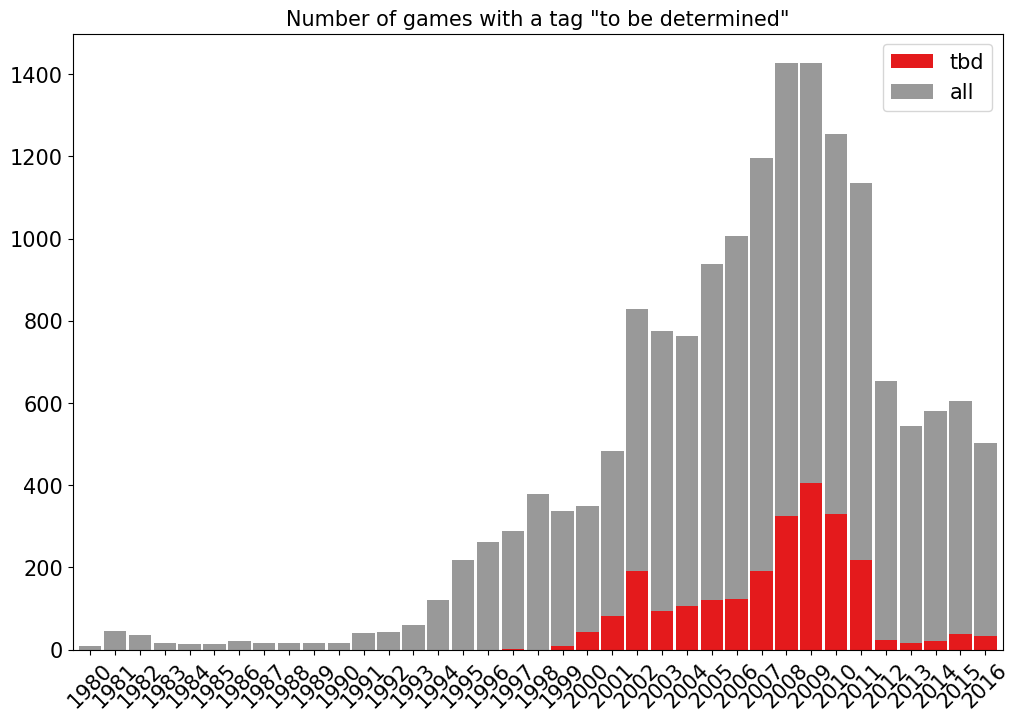

In [19]:
year_stat = (data.query('user_score != "tbd"')['year']
             .value_counts().to_frame('all')
             .join(data.query('user_score == "tbd"')['year']
                   .value_counts().to_frame('tbd'))).sort_index()
# year_stat.index = year_stat.index.year
year_stat.iloc[:, [1, 0]].plot(kind='bar', 
                               stacked=True, 
                               cmap='Set1', 
                               figsize=(12, 8), 
                               width=0.9)
plt.legend(fontsize=15)
plt.xticks(fontsize=15, rotation=45)
plt.yticks(fontsize=15)
plt.title('Number of games with a tag "to be determined"', fontsize=15)
plt.show()

Apparently the year of release affects whether the user rating is determined.

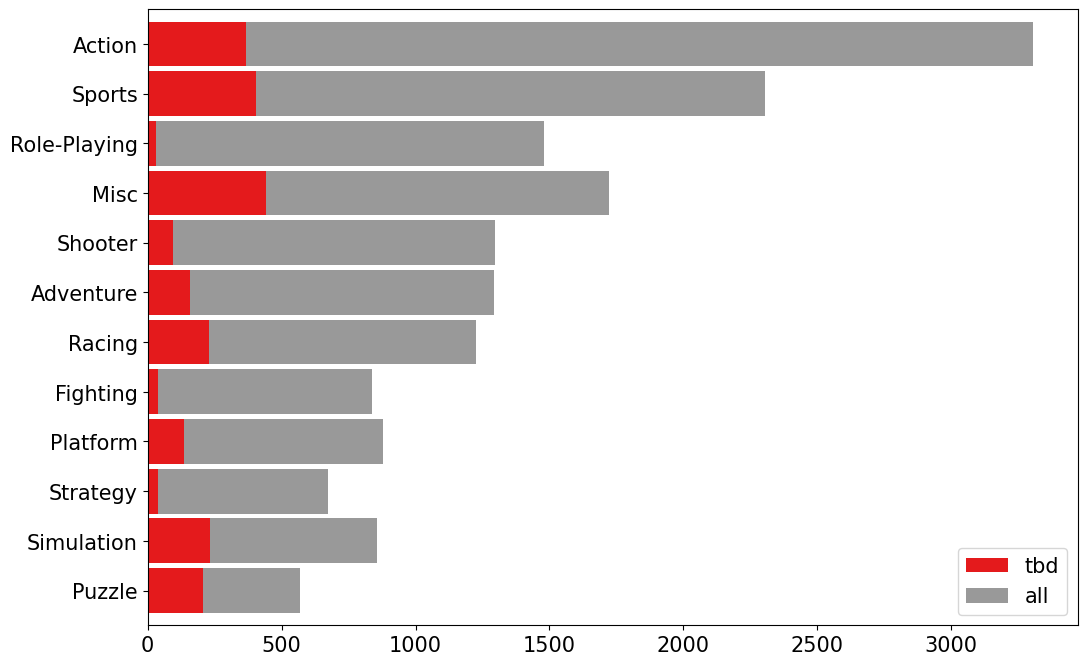

In [20]:
genre_stat = (data.query('user_score != "tbd"')['genre']
             .value_counts().to_frame('all')
             .join(data.query('user_score == "tbd"')['genre']
                   .value_counts().to_frame('tbd'))).sort_values(by='all')
genre_stat.iloc[:, [1, 0]].plot(kind='barh', 
                               stacked=True, 
                               cmap='Set1', 
                               figsize=(12, 8), 
                               width=0.9)
plt.legend(fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

Genre doesn't seem to matter.

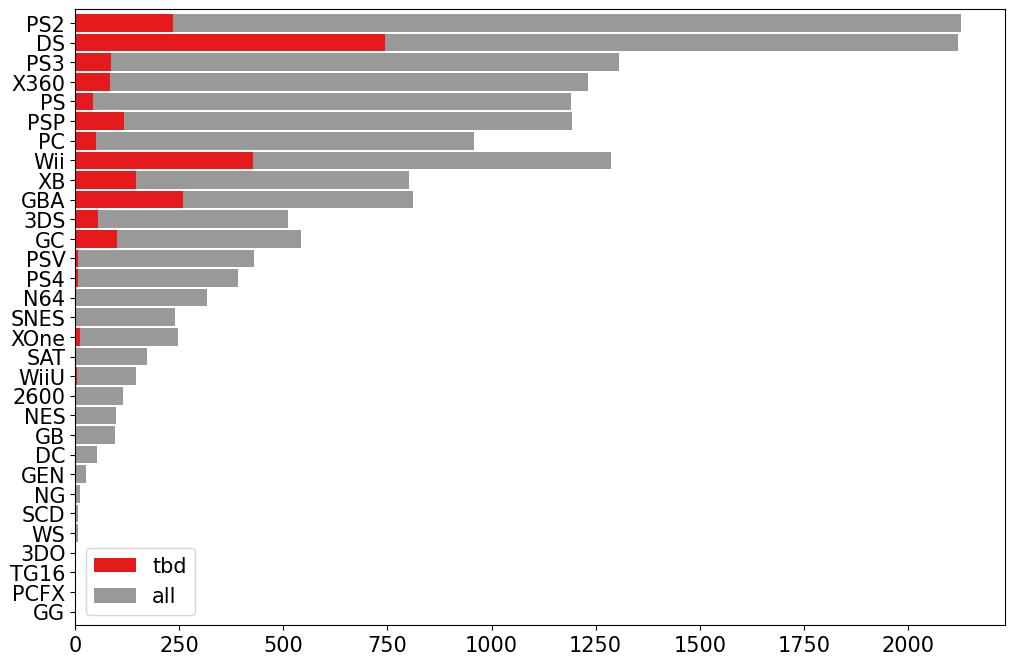

In [21]:
platform_stat = (data.query('user_score != "tbd"')['platform']
             .value_counts().to_frame('all')
             .join(data.query('user_score == "tbd"')['platform']
                   .value_counts().to_frame('tbd'))).sort_values(by='all')
platform_stat.iloc[:, [1, 0]].plot(kind='barh', 
                               stacked=True, 
                               cmap='Set1', 
                               figsize=(12, 8), 
                               width=0.9)
plt.legend(fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

There are regularities, but it is hard to draw conclusions from them.

Essentially, "To Be Determined" is no different than a `NaN`. Let's substitute.

In [22]:
data = data.replace('tbd', np.NaN)

In [23]:
data['user_score'] = data['user_score'].astype(float)

In [24]:
data.isna().sum()

name               0
platform           0
year               0
genre              0
NA_sales           0
EU_sales           0
JP_sales           0
other_sales        0
critic_score    8461
user_score      8981
rating          6676
dtype: int64

In [25]:
data.tail()

name platform  year       genre  NA_sales  \
16710  Samurai Warriors: Sanada Maru      PS3  2016      Action      0.00   
16711               LMA Manager 2007     X360  2006      Sports      0.00   
16712        Haitaka no Psychedelica      PSV  2016   Adventure      0.00   
16713               Spirits & Spells      GBA  2003    Platform      0.01   
16714            Winning Post 8 2016      PSV  2016  Simulation      0.00   

       EU_sales  JP_sales  other_sales  critic_score  user_score rating  
16710      0.00      0.01          0.0           NaN         NaN    NaN  
16711      0.01      0.00          0.0           NaN         NaN    NaN  
16712      0.00      0.01          0.0           NaN         NaN    NaN  
16713      0.00      0.00          0.0           NaN         NaN    NaN  
16714      0.00      0.01          0.0           NaN         NaN    NaN

In [26]:
data['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

In [27]:
data['rating'] = data['rating'].fillna('unknown')

Given that there are 16715 rows in the data:
- 279 rows with missing values in release year or genre have been removed from the data
- Gaps in rating values remained unchanged
- The "to be determined" values for user ratings have been replaced by a standard `NaN`.
- Gaps in age rating values have been replaced with a generalized "unknown" category.

### Total sales

In [28]:
data['sales'] = data['NA_sales'] + data['EU_sales'] + data['JP_sales'] + data['other_sales']

In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          16444 non-null  object 
 1   platform      16444 non-null  object 
 2   year          16444 non-null  int64  
 3   genre         16444 non-null  object 
 4   NA_sales      16444 non-null  float64
 5   EU_sales      16444 non-null  float64
 6   JP_sales      16444 non-null  float64
 7   other_sales   16444 non-null  float64
 8   critic_score  7983 non-null   float64
 9   user_score    7463 non-null   float64
 10  rating        16444 non-null  object 
 11  sales         16444 non-null  float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.6+ MB


### Check for duplicates

In [30]:
data.duplicated().sum()

0

In [31]:
data = data.reset_index(drop=True)

## Exploratory data analysis

In [32]:
data

name platform  year         genre  NA_sales  \
0                         Wii Sports      Wii  2006        Sports     41.36   
1                  Super Mario Bros.      NES  1985      Platform     29.08   
2                     Mario Kart Wii      Wii  2008        Racing     15.68   
3                  Wii Sports Resort      Wii  2009        Sports     15.61   
4           Pokemon Red/Pokemon Blue       GB  1996  Role-Playing     11.27   
...                              ...      ...   ...           ...       ...   
16439  Samurai Warriors: Sanada Maru      PS3  2016        Action      0.00   
16440               LMA Manager 2007     X360  2006        Sports      0.00   
16441        Haitaka no Psychedelica      PSV  2016     Adventure      0.00   
16442               Spirits & Spells      GBA  2003      Platform      0.01   
16443            Winning Post 8 2016      PSV  2016    Simulation      0.00   

       EU_sales  JP_sales  other_sales  critic_score  user_score   rating  \
0         28.96      3.77         8.45          76.0         8.0        E   
1          3.58      6.81         0.77           NaN         NaN  unknown   
2         12.76      3.79         3.29          82.0         8.3        E   
3         10.93      3.28         2.95          80.0         8.0        E   
4          8.89     10.22         1.00           NaN         NaN  unknown   
...         ...       ...          ...           ...         ...      ...   
16439      0.00      0.01         0.00           NaN         NaN  unknown   
16440      0.01      0.00         0.00           NaN         NaN  unknown   
16441      0.00      0.01         0.00           NaN         NaN  unknown   
16442      0.00      0.00         0.00           NaN         NaN  unknown   
16443      0.00      0.01         0.00           NaN         NaN  unknown   

       sales  
0      82.54  
1      40.24  
2      35.52  
3      32.77  
4      31.38  
...      ...  
16439   0.01  
16440   0.01  
16441   0.01  
16442   0.01  
16443   0.01  

[16444 rows x 12 columns]

### Games by year

In [33]:
data['year'].value_counts().sort_index().index

Int64Index([1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990,
            1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001,
            2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012,
            2013, 2014, 2015, 2016],
           dtype='int64')

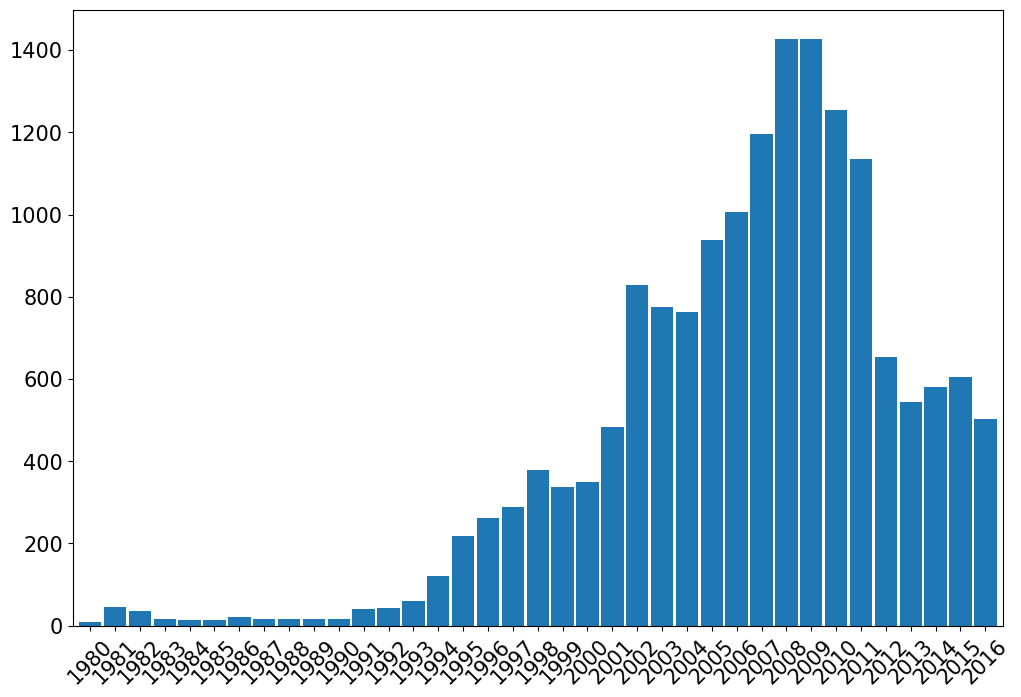

In [34]:
# fig, ax = plt.subplots()
fig = (data['year']
       .value_counts()
       .sort_index()
       .plot(kind='bar', figsize=(12, 8), width=0.9, fontsize=15, rot=45))
# ax.set_xticklabels(data['year'].value_counts().sort_index().index.year)
plt.show()

Since the 90's more games have been released.

### Games by platform

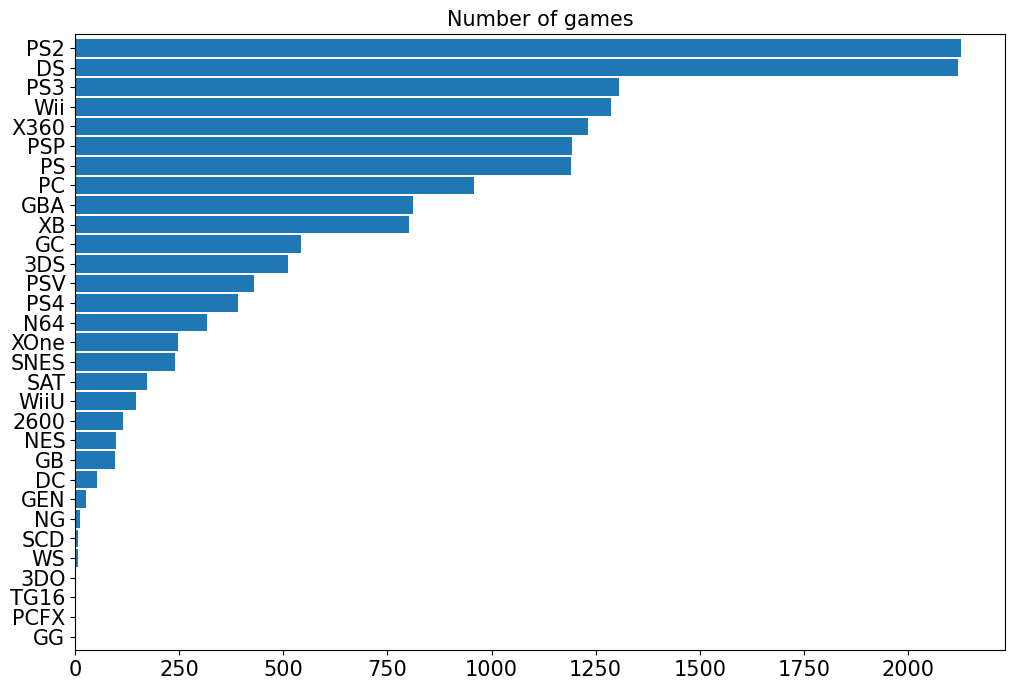

In [35]:
fig = (data['platform']
       .value_counts()
       .sort_values()
       .plot(kind='barh', figsize=(12, 8), width=0.9, fontsize=15))
plt.title('Number of games', fontsize=15)
plt.show()

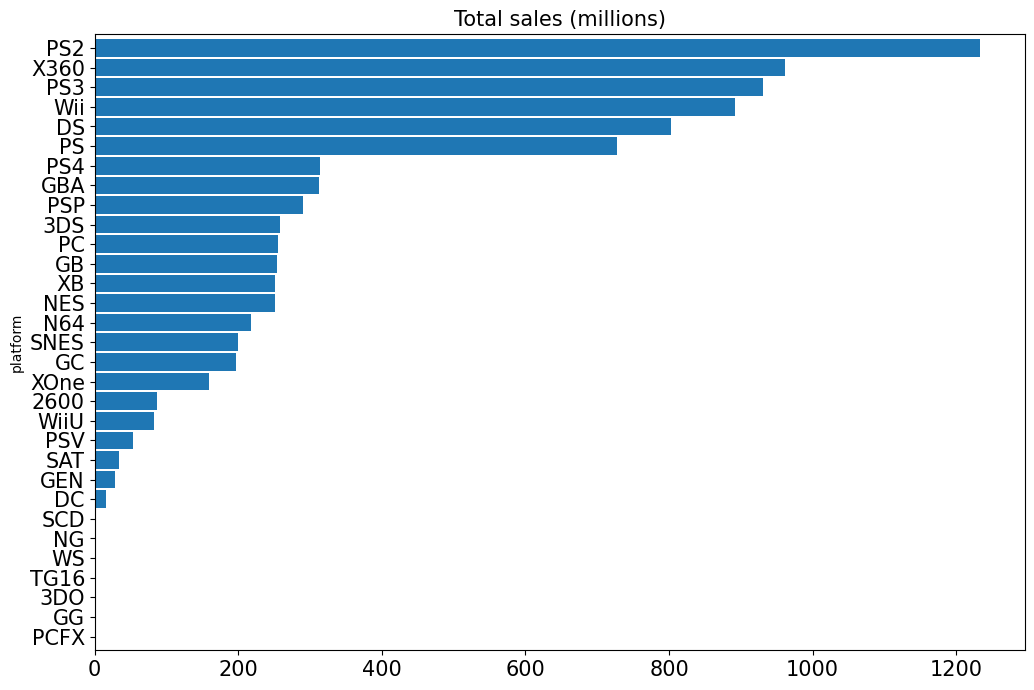

In [36]:
fig = (data
       .groupby('platform')['sales']
       .agg('sum')
       .sort_values()
       .plot(kind='barh', figsize=(12, 8), width=0.9, fontsize=15))
plt.title('Total sales (millions)', fontsize=15)
plt.show()

It's far easier to identify favorites here.

In [37]:
stat_by_platform = data.groupby(['platform', 'year']).agg({'name': 'count', 'sales': 'sum'})
stat_by_platform

name  sales
platform year             
2600     1980     9  11.38
         1981    46  35.68
         1982    36  28.88
         1983    11   5.84
         1984     1   0.27
...             ...    ...
XB       2008     1   0.18
XOne     2013    19  18.96
         2014    61  54.07
         2015    80  60.14
         2016    87  26.15

[238 rows x 2 columns]

In [38]:
(data.groupby('platform')['sales'].sum().sort_values(ascending=False).head(6).index)

Index(['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS'], dtype='object', name='platform')

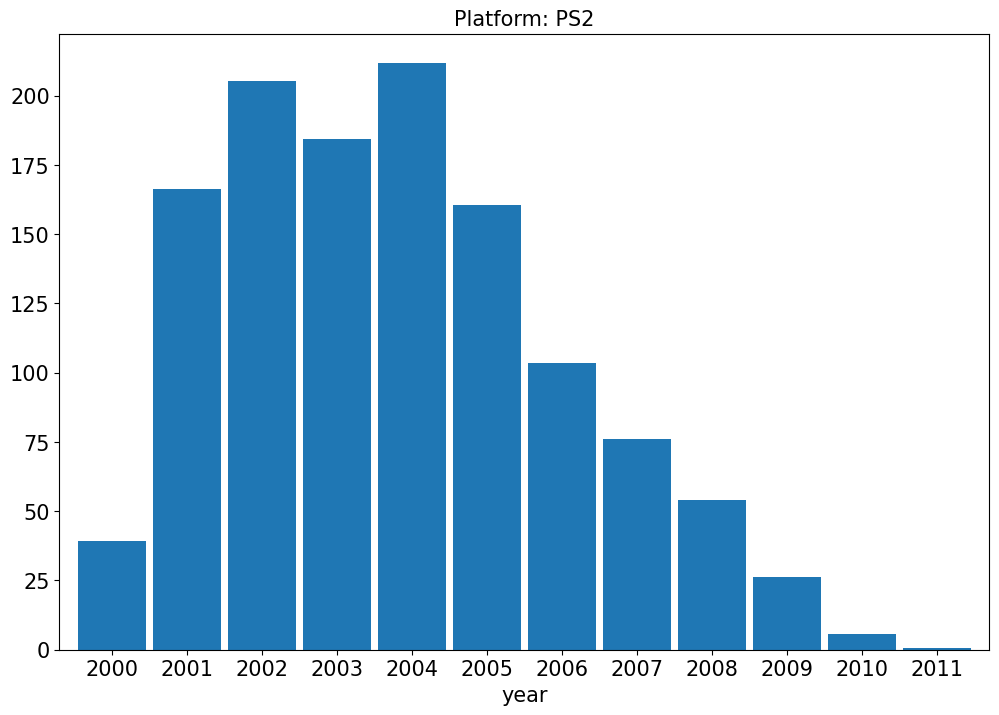

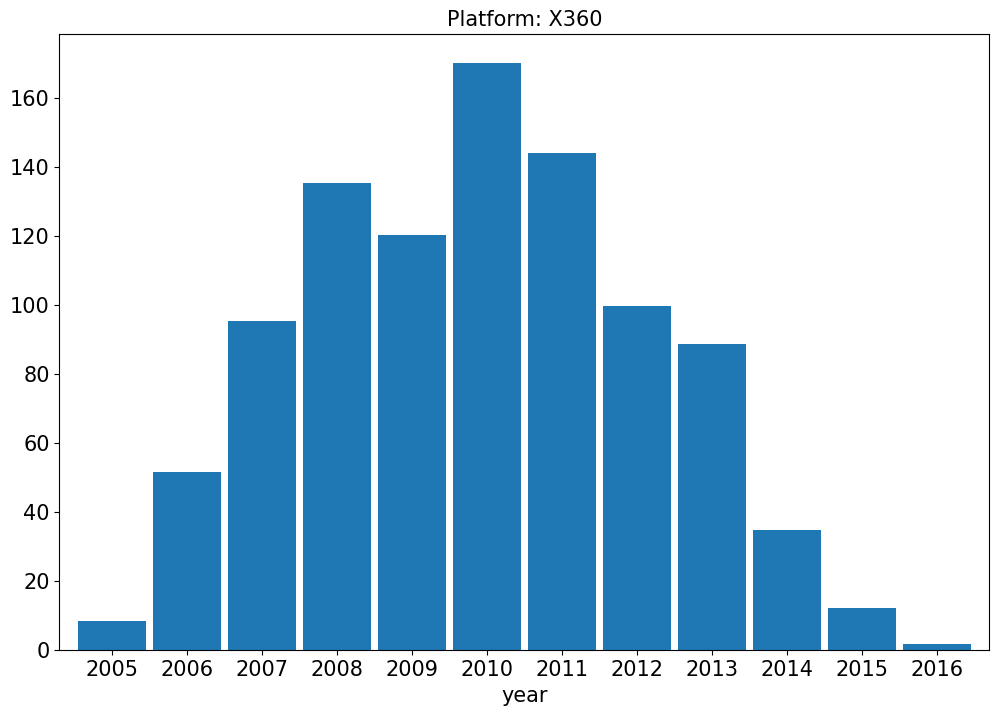

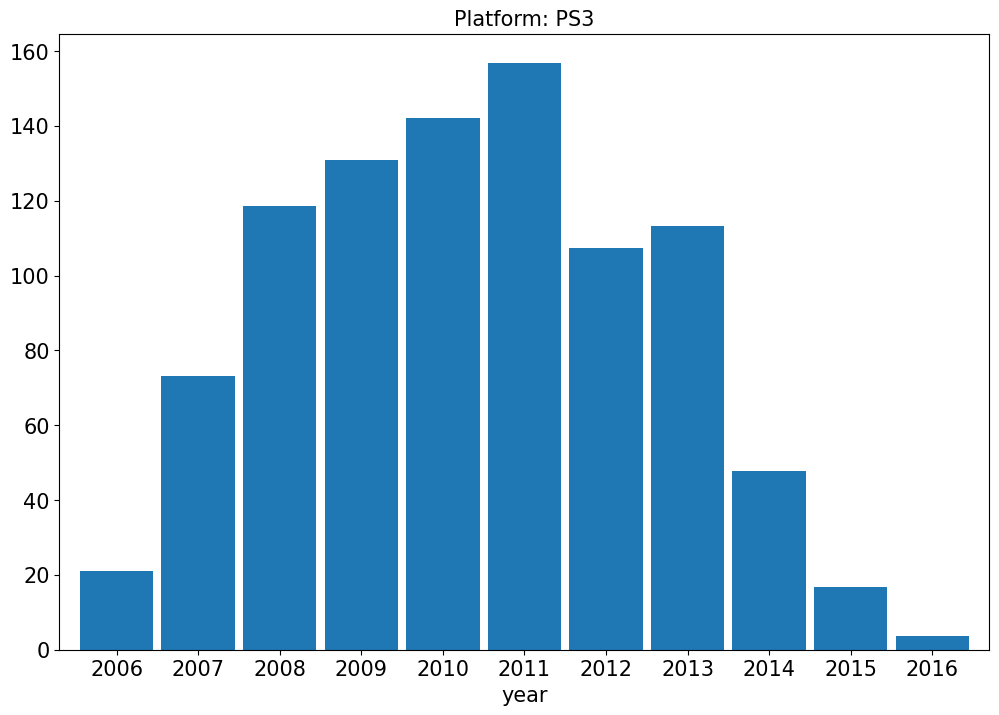

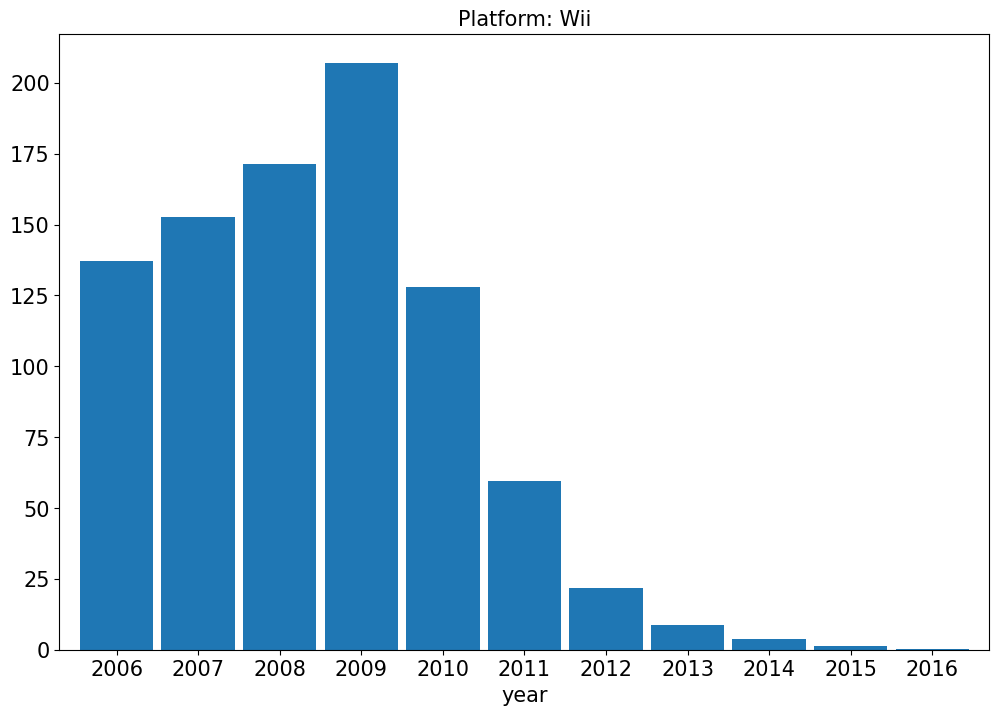

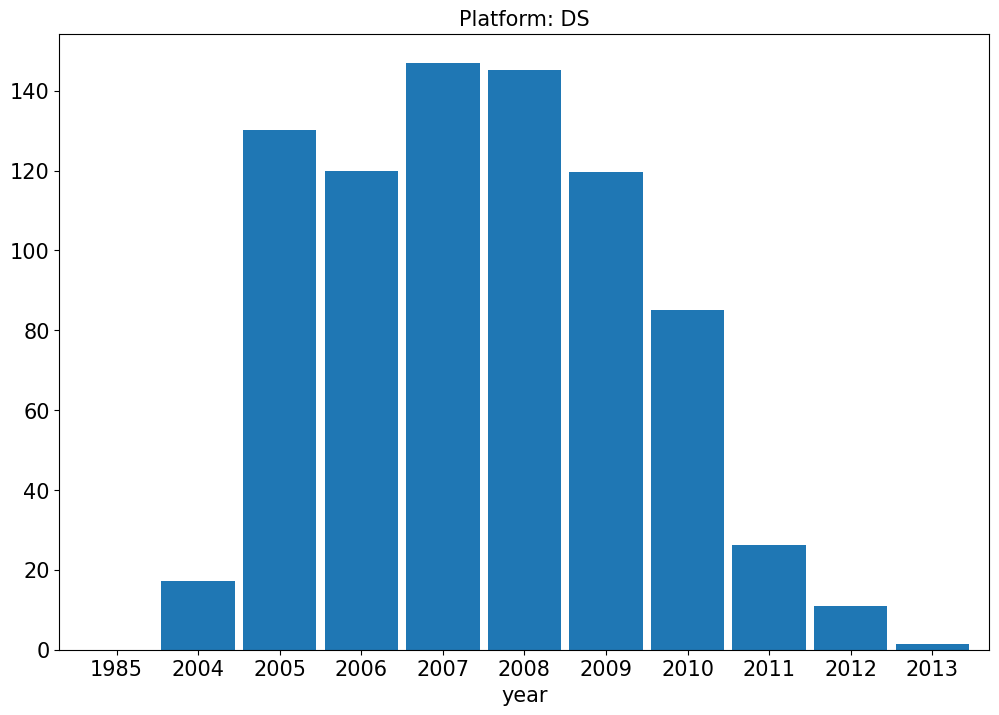

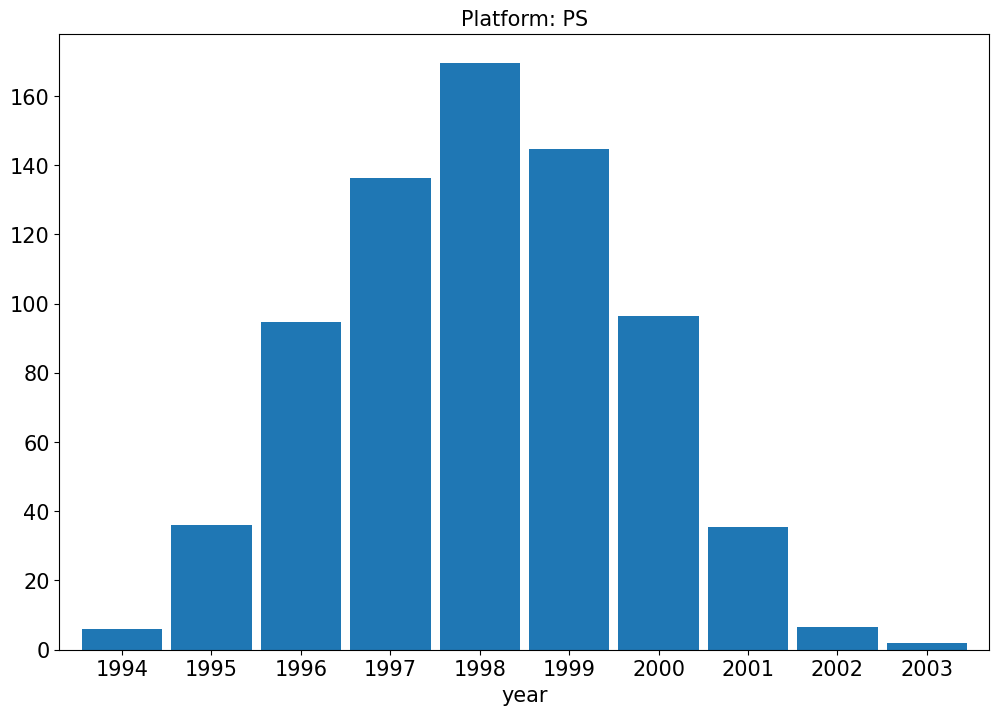

In [39]:
for platform in (data
                 .groupby('platform')['sales']
                 .sum().sort_values(ascending=False)
                 .head(6).index):
    # fig, ax = plt.subplots()
    stat_by_platform.loc[platform]['sales'].plot(kind='bar', 
                                                 figsize=(12, 8), 
                                                 width=0.9, 
                                                 fontsize=15, 
                                                 rot=0)
    # ax.set_xticklabels(stat_by_platform.loc[platform].index.year)
    plt.title('Platform: {}'.format(platform), fontsize=15)
    plt.xlabel('year', fontsize=15)
    plt.show()

Or on the same chart: <a id='platfroms'></a>

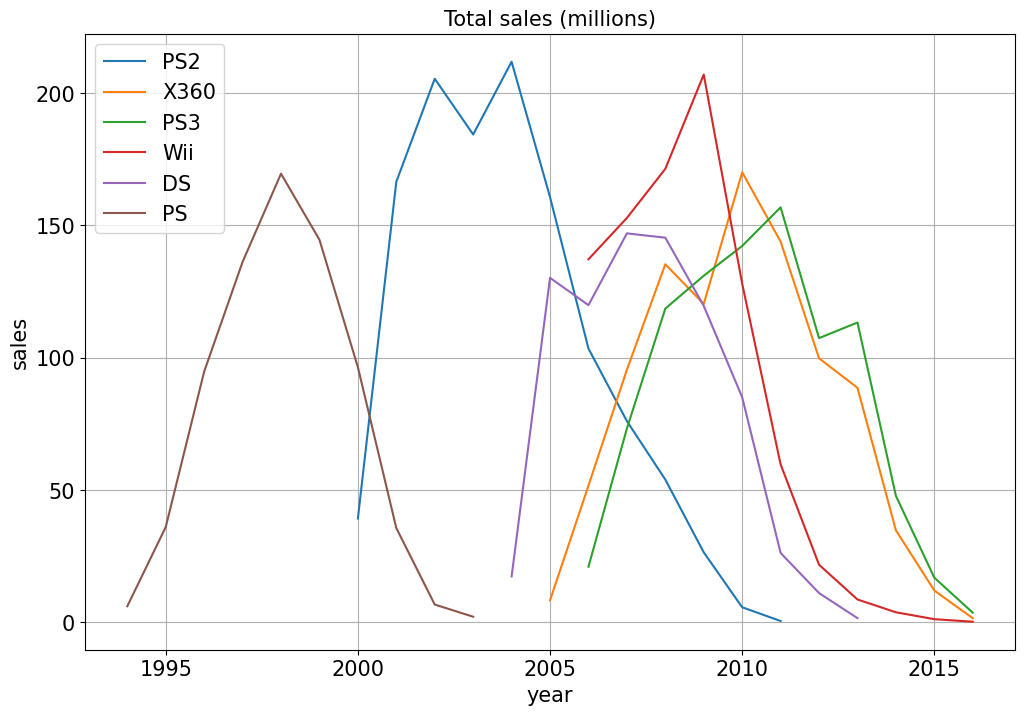

In [40]:
for platform in (data
                 .groupby('platform')['sales']
                 .sum().sort_values(ascending=False)
                 .head(6).index):
    (stat_by_platform
     .query('year >= 1994')
     .loc[platform]['sales']
     .plot(kind='line', 
           figsize=(12, 8), 
           fontsize=15, 
           rot=0, 
           grid=True, 
           label=platform))
plt.title('Total sales (millions)', fontsize=15)
plt.xlabel('year', fontsize=15)
plt.ylabel('sales', fontsize=15)
plt.legend(loc='upper left', fontsize=15)
plt.show()

Most platforms stay popular for 6 years. Some are valid for up to 8 years.

### Sales for the current period

Based on the number of games with uncertain ratings shown in [graph](#tbd), let's choose the current period.

There is a downturn in the data after 2011, although it is unlikely that fewer games have been released. It seems more plausible that they haven't made it to our online store yet.

On the other hand, before 2002 the industry was different and fewer games were released, which is confirmed by the distribution by platforms.

It would be reasonable to split the graph into 1980-2001, 2002-2011 and 2012-2016, taking the actual period **from 2012 to 2016**. The data is likely incomplete and not necessarily representative, but it should reflect market trends.

In order to choose this segment more precisely, let's look at all platforms and select the newest ones. Let's take a cutoff for them, so that the comparison is equal and relevant.

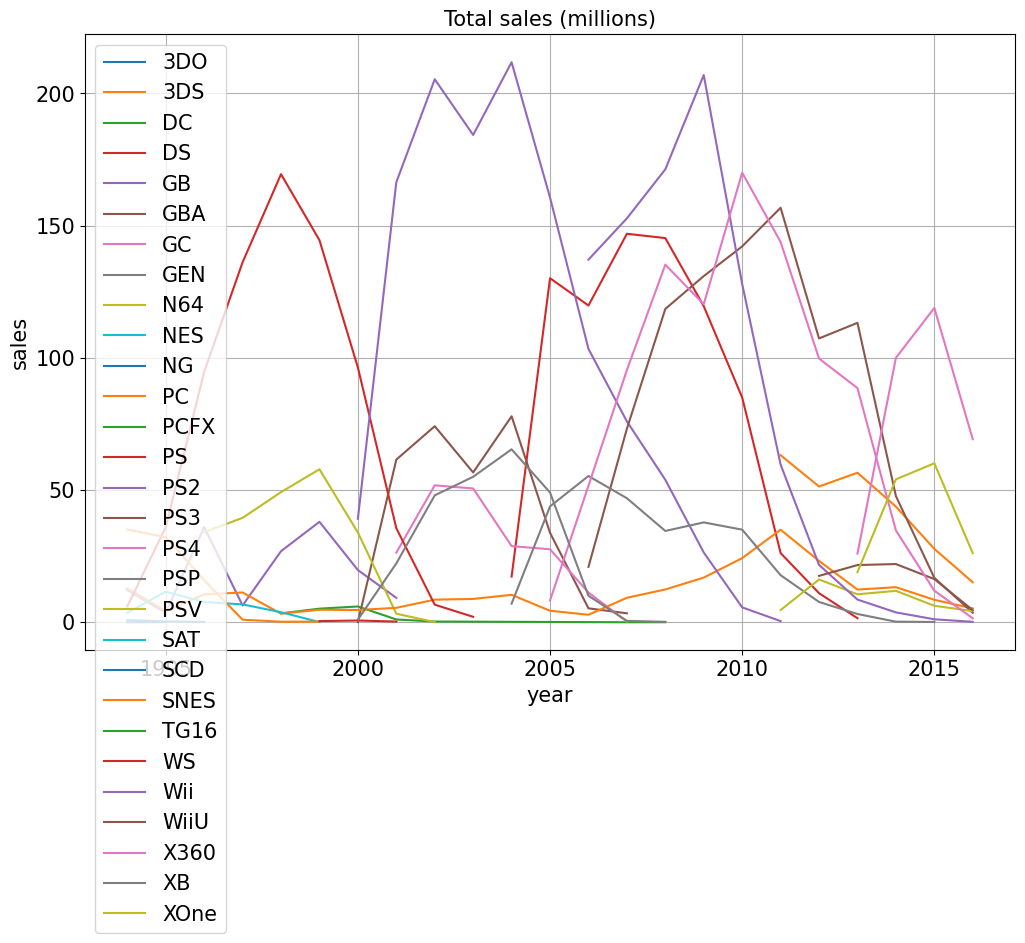

In [41]:
for platform in (stat_by_platform
                 .query('year >= 1994')
                 .index.unique(level='platform')):
    (stat_by_platform
     .query('year >= 1994')
     .loc[platform]['sales']
     .plot(kind='line', 
           figsize=(12, 8), 
           fontsize=15, 
           rot=0, 
           grid=True, 
           label=platform))
plt.title('Total sales (millions)', fontsize=15)
plt.xlabel('year', fontsize=15)
plt.ylabel('sales', fontsize=15)
plt.legend(loc='upper left', fontsize=15)
plt.show()

It is now evident that new platforms have emerged.

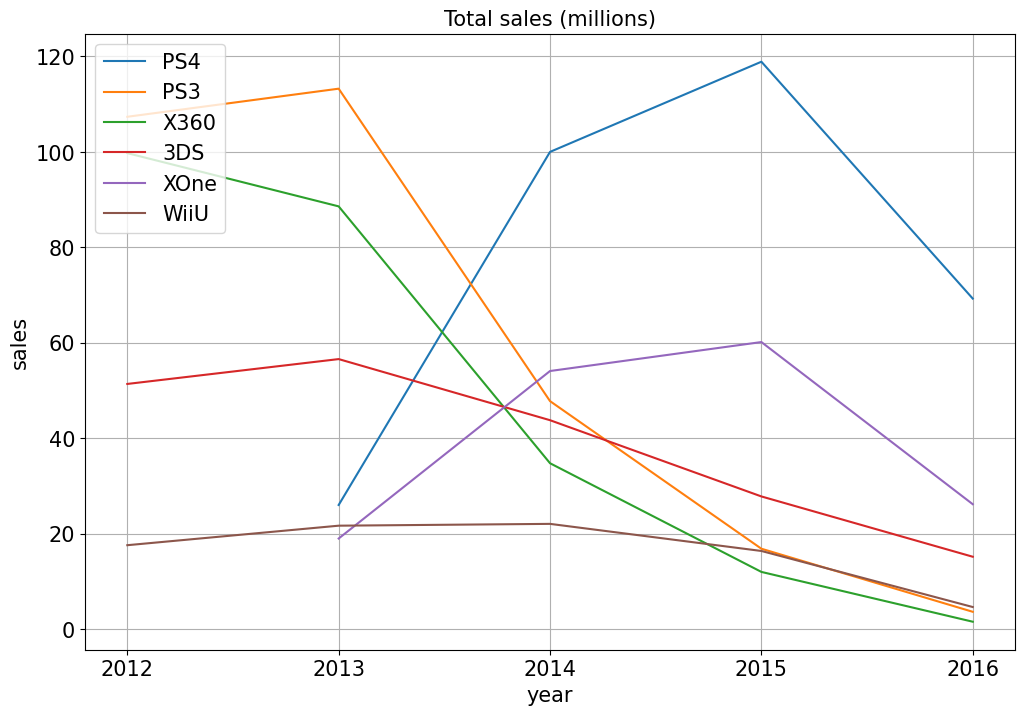

In [42]:
# plt.style.use('default')
fig, ax = plt.subplots()
for platform in (stat_by_platform
                 .query('year >= 2012')
                 .groupby('platform').sum()
                 .sort_values(by='sales', ascending=False)
                 .head(6).index):  
    (stat_by_platform
     .query('year >= 2012')
     .loc[platform]['sales']
     .plot(kind='line', 
           figsize=(12, 8), 
           fontsize=15, 
           rot=0, 
           grid=True, 
           label=platform))
    ax.locator_params(integer=True)
plt.title('Total sales (millions)', fontsize=15)
plt.xlabel('year', fontsize=15)
plt.ylabel('sales', fontsize=15)
plt.legend(loc='upper left', fontsize=15)
plt.show()

Now we can even see which ones.

In [43]:
data_new = data.query('year >= 2013')

In [44]:
new_stat_by_platform = data_new\
.groupby(['platform', 'year'])\
.agg({'name': 'count', 'sales': 'sum'})

In [45]:
new_stat_by_platform.head()

name  sales
platform year             
3DS      2013    91  56.57
         2014    80  43.76
         2015    86  27.78
         2016    46  15.14
DS       2013     8   1.54

<a id='future_platfroms'></a>

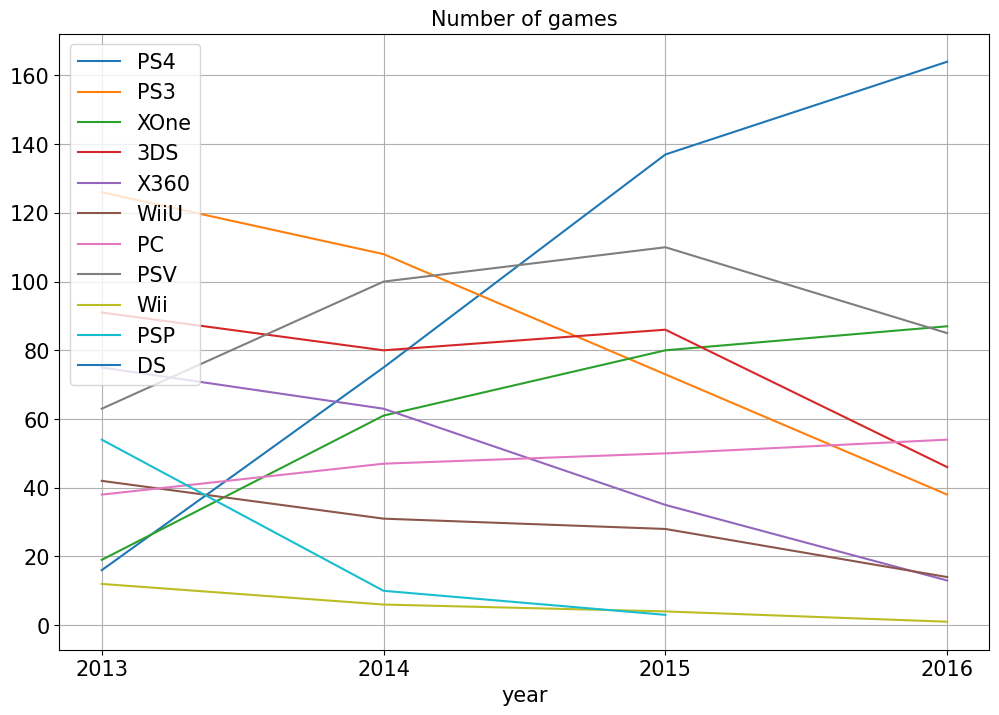

In [46]:
fig, ax = plt.subplots()
for platform in (data_new
                 .groupby('platform')['sales']
                 .sum()
                 .sort_values(ascending=False)
                 .index):
    (new_stat_by_platform
     .loc[platform]['name']
     .plot(kind='line', 
           figsize=(12, 8), 
           fontsize=15, 
           rot=0, 
           grid=True, 
           label=platform))
    ax.locator_params(integer=True)
plt.title('Number of games', fontsize=15)
plt.xlabel('year', fontsize=15)
plt.legend(loc='upper left', fontsize=15)
plt.show()

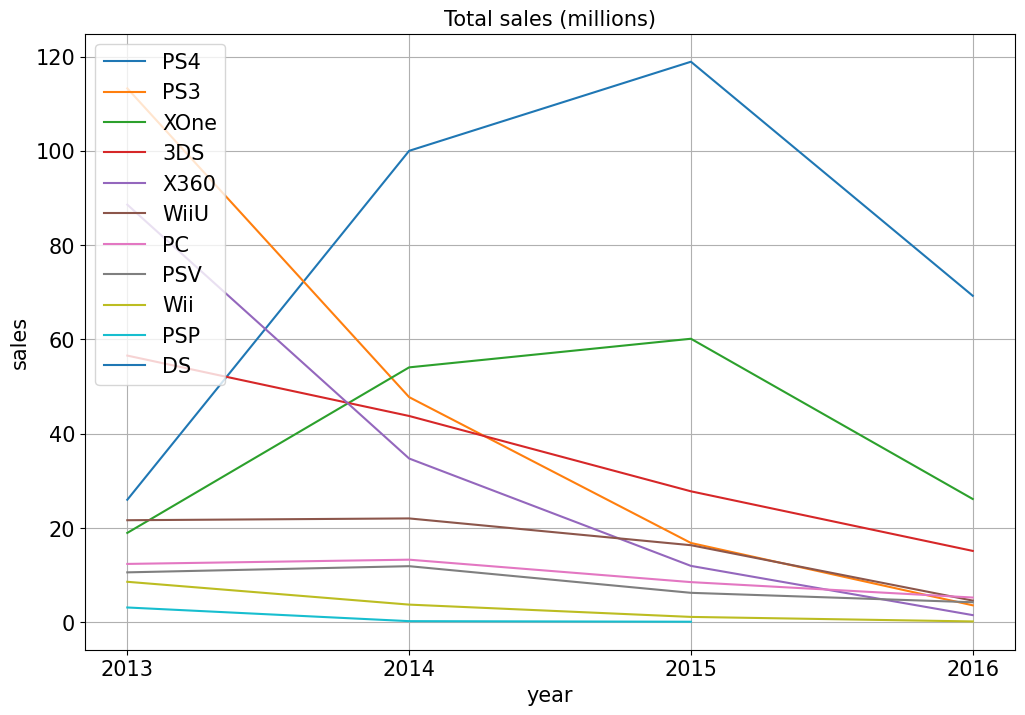

In [47]:
fig, ax = plt.subplots()
for platform in (data_new
                 .groupby('platform')['sales']
                 .sum()
                 .sort_values(ascending=False)
                 .index):
    (new_stat_by_platform
     .loc[platform]['sales']
     .plot(kind='line', 
           figsize=(12, 8), 
           fontsize=15, 
           rot=0, 
           grid=True, 
           label=platform))
    ax.locator_params(integer=True)
plt.title('Total sales (millions)', fontsize=15)
plt.xlabel('year', fontsize=15)
plt.ylabel('sales', fontsize=15)
plt.legend(loc='upper left', fontsize=15)
plt.show()

It may be more accurate to reflect shares. Let's look at the number of sales for the current period.

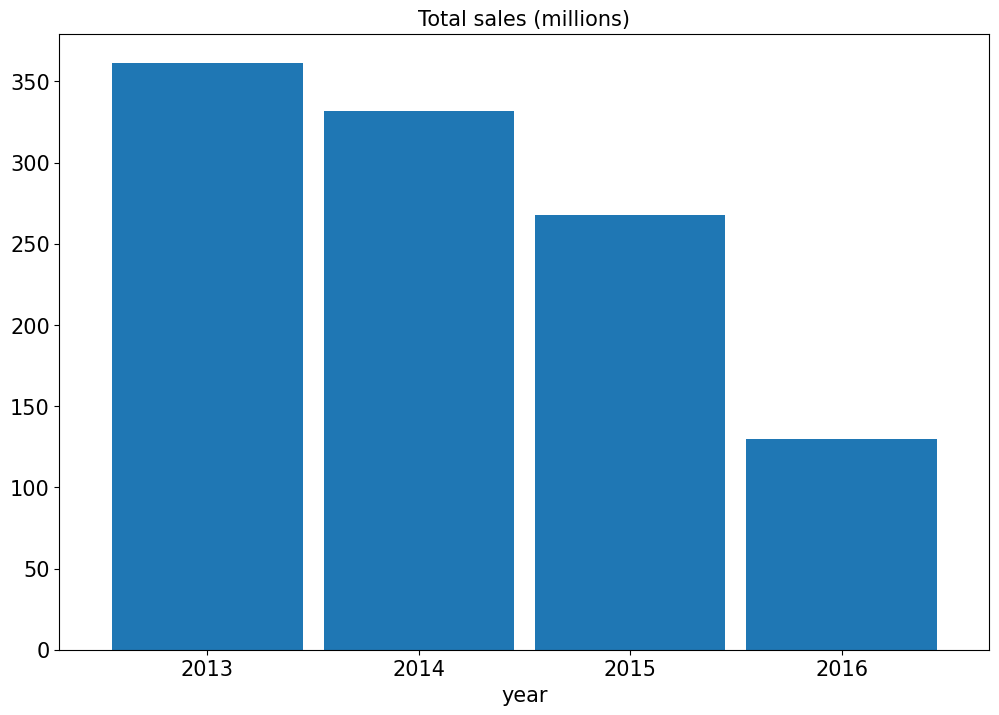

In [48]:
# fig, ax = plt.subplots()
fig = (data_new
       .groupby('year')['sales']
       .agg('sum')
       .sort_index()
       .plot(kind='bar', figsize=(12, 8), width=0.9, fontsize=15, rot=0))
# ax.set_xticklabels(np.sort(data_new['year'].apply(lambda x: x.year).unique()))
plt.title('Total sales (millions)', fontsize=15)
plt.xlabel('year', fontsize=15)
plt.show()

Yes, let's try through shares in sales for each platform.

In [49]:
for index, row in new_stat_by_platform.iterrows():
    new_stat_by_platform.loc[index, 'part'] = (row['sales'] / 
    sum(new_stat_by_platform.loc[pd.IndexSlice[:, index[1]], :]['sales']))

In [50]:
new_stat_by_platform.head(10)

name   sales      part
platform year                        
3DS      2013    91   56.57  0.156599
         2014    80   43.76  0.131994
         2015    86   27.78  0.103664
         2016    46   15.14  0.116515
DS       2013     8    1.54  0.004263
PC       2013    38   12.38  0.034271
         2014    47   13.28  0.040057
         2015    50    8.52  0.031793
         2016    54    5.25  0.040403
PS3      2013   126  113.25  0.313503

In [51]:
new_stat_by_platform['part'].sum()

4.0

<a id='platfrom_sales'></a>

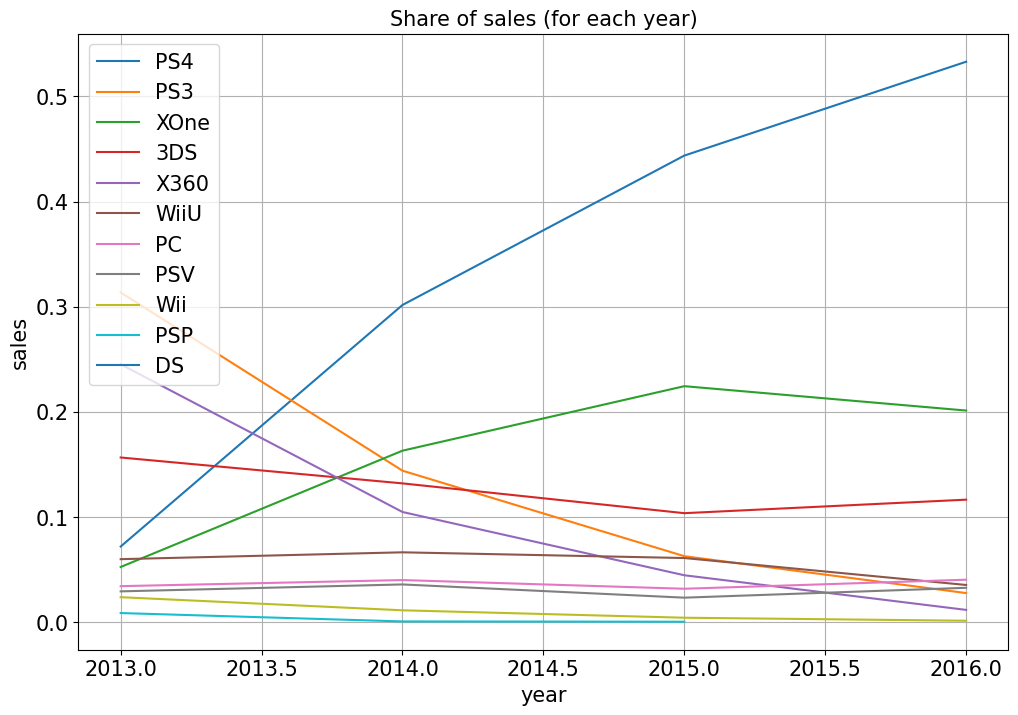

In [52]:
for platform in (data_new
                 .groupby('platform')['sales']
                 .sum()
                 .sort_values(ascending=False)
                 .index):
    (new_stat_by_platform
     .loc[platform]['part']
     .plot(kind='line', 
           figsize=(12, 8), 
           fontsize=15, 
           rot=0, 
           grid=True, 
           label=platform))
plt.title('Share of sales (for each year)', fontsize=15)
plt.xlabel('year', fontsize=15)
plt.ylabel('sales', fontsize=15)
plt.legend(loc='upper left', fontsize=15)
plt.show()

What we can see is:
- PS4 and XOne are gaining momentum
- 3DS is holding steady
- PS3 and X360 are falling rapidly

Old models are being replaced by the new ones pretty quickly.

### Sales spread by platform

Let's take a look at sales of different games by platform.

<Axes: xlabel='platform', ylabel='sales'>

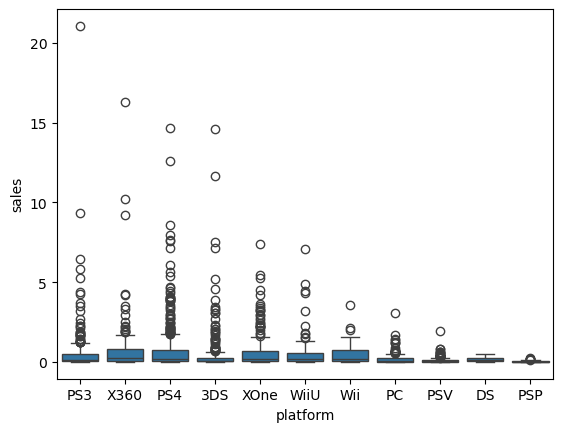

In [53]:
sb.boxplot(data=data_new, x='platform', y='sales')

Let's trim the best sellers: <a id='new_platforms'></a>

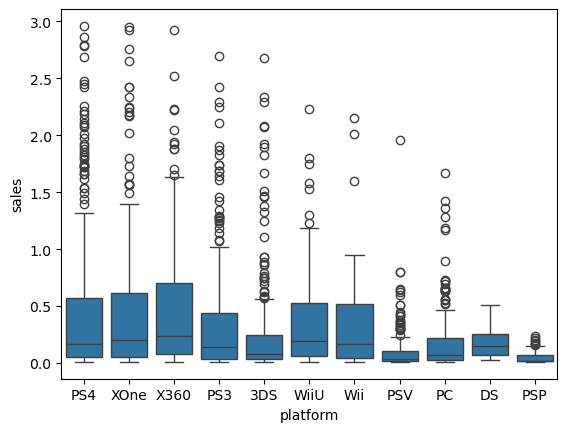

In [54]:
sb.boxplot(data=data_new.query('sales <= 3'), x='platform', y='sales');

Positive skewness is evident.

In [55]:
data_new['sales'].describe()

count    2233.000000
mean        0.488442
std         1.235226
min         0.010000
25%         0.030000
50%         0.110000
75%         0.400000
max        21.050000
Name: sales, dtype: float64

Lots of poorly selling games and a few popular ones that skew average. Genre classics.

### Correlation between scores and sales

The PS4 is the most actively developing. Let's explore it.

In [56]:
data_new.query('platform == "PS4"').info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 31 to 16314
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          392 non-null    object 
 1   platform      392 non-null    object 
 2   year          392 non-null    int64  
 3   genre         392 non-null    object 
 4   NA_sales      392 non-null    float64
 5   EU_sales      392 non-null    float64
 6   JP_sales      392 non-null    float64
 7   other_sales   392 non-null    float64
 8   critic_score  252 non-null    float64
 9   user_score    257 non-null    float64
 10  rating        392 non-null    object 
 11  sales         392 non-null    float64
dtypes: float64(7), int64(1), object(4)
memory usage: 39.8+ KB


There are quite a few gaps in the scores. Let's see how many there are for other platforms.

In [57]:
(data_new['platform'].value_counts().to_frame('all')
 .join(data_new['user_score'].isna().groupby(data_new['platform']).sum()))

all  user_score
PS4   392         135
PSV   358         259
PS3   345         159
3DS   303         223
XOne  247          65
PC    189          34
X360  186          43
WiiU  115          35
PSP    67          65
Wii    23          16
DS      8           7

Let's study the correlation between critics' scores and sales. We will assume that if the Pearson correlation modulo is less than 0.25, there is no correlation. If between 0.25 and 0.5, the correlation is weak. If more, the correlation is strong.

/home/leonid/anaconda3/envs/practicum/lib/python3.9/site-packages/pandas/plotting/_matplotlib/core.py:1041: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


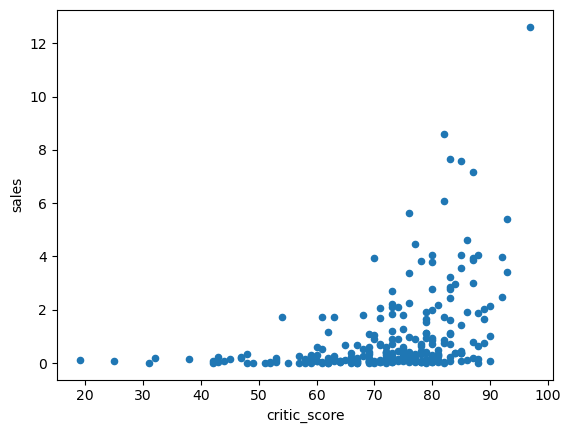

In [58]:
fig = (data_new
 .query('platform == "PS4"')
 .plot(kind='scatter', 
       x='critic_score', 
       y='sales'))

In [59]:
data_new['critic_score'].corr(data_new['sales']) # Pearson correlation

0.3136995151027368

In general, there is a correlation, but a weak one. Perhaps if we look at a sample of the data, it will become more clear, but it is difficult to find a border beyond which it becomes a distortion of reality.

<a id='success'></a>

Let's take a look at user ratings as well.

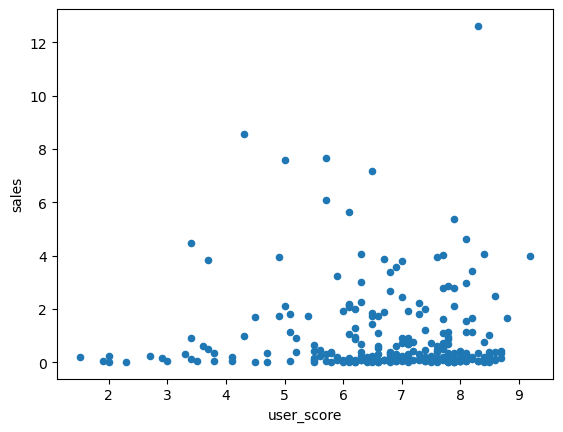

In [60]:
fig = (data_new
 .query('platform == "PS4"')
 .plot(kind='scatter', 
       x='user_score', 
       y='sales'))

It's a similar situation.

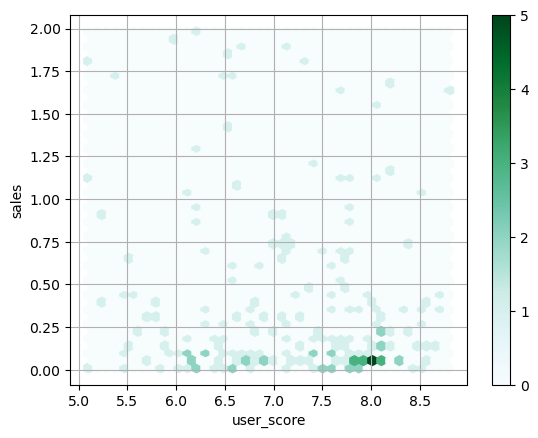

In [61]:
fig = (data_new
       .query('platform == "PS4"')
       .query('user_score >= 5')
       .query('sales <= 2')
       .plot(kind='hexbin', 
             x='user_score', 
             y='sales', 
             gridsize=40, 
             sharex=False, 
             grid=True))

In [62]:
data_new['user_score'].corr(data_new['sales'])

-0.002607813354598235

There is no correlation. It looks as if a game with any score can sell well. It would even be more accurate to say that a high score does not guarantee sales.

Across all platforms:

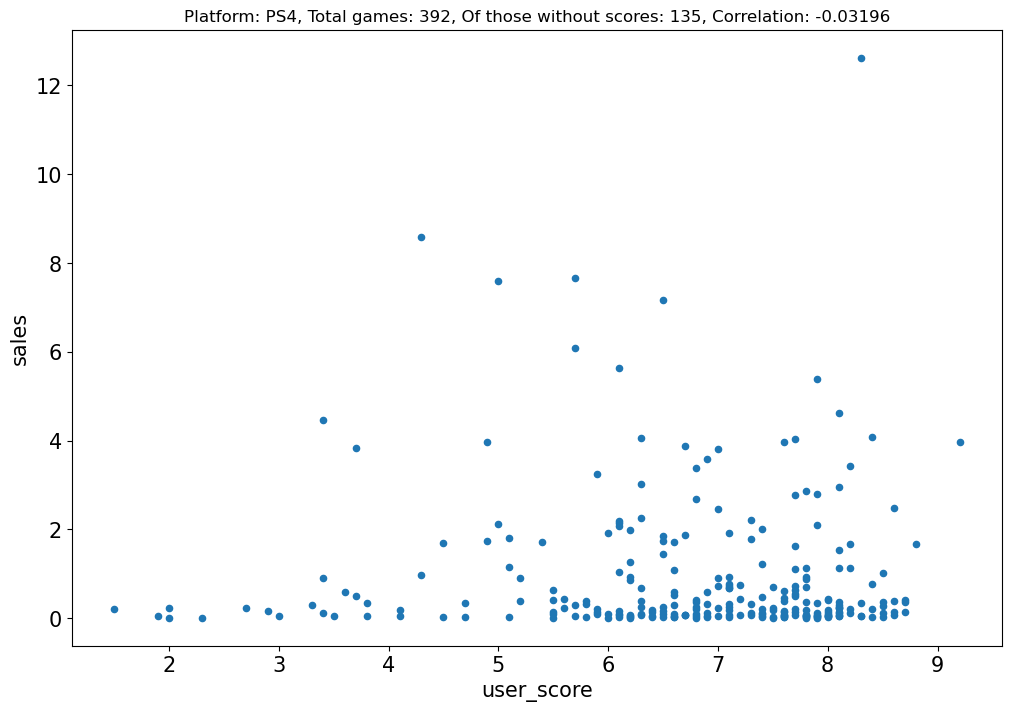

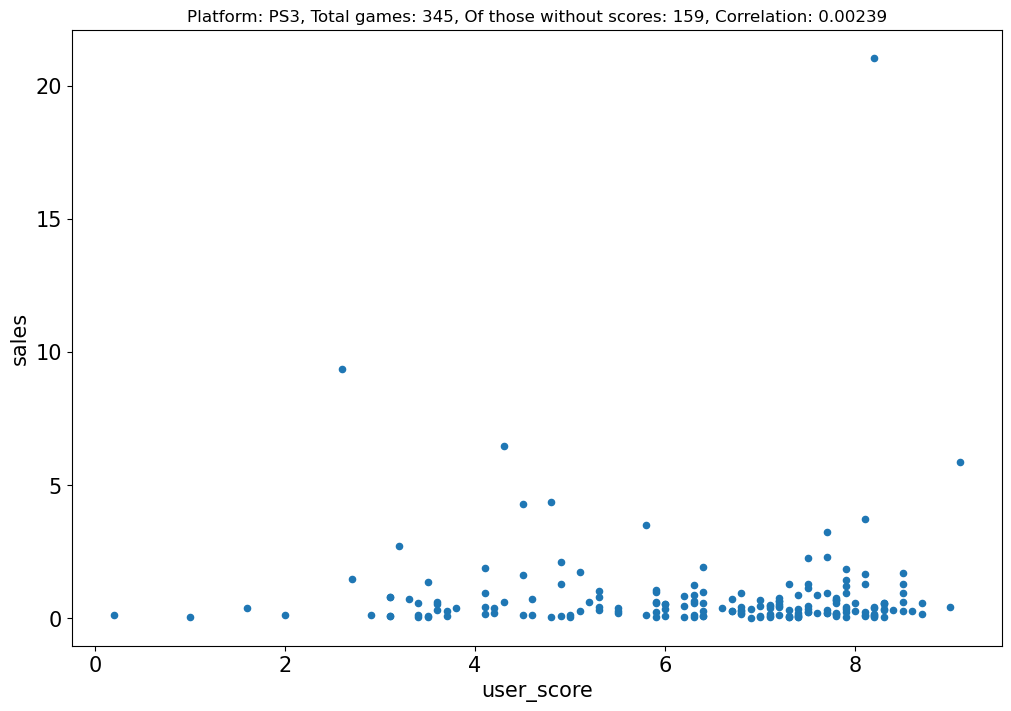

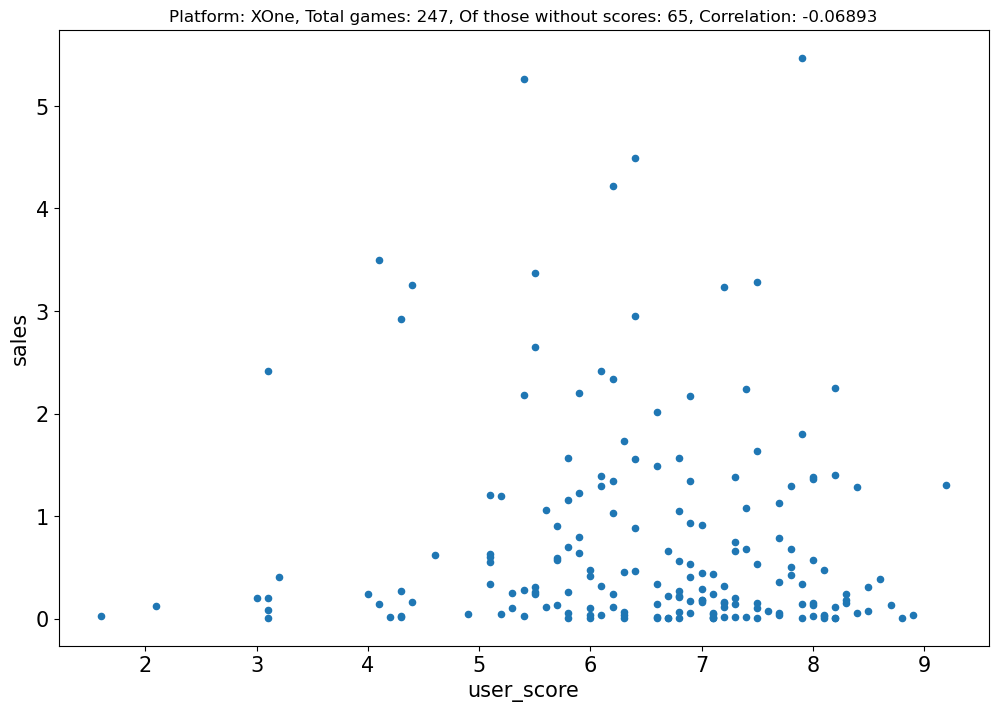

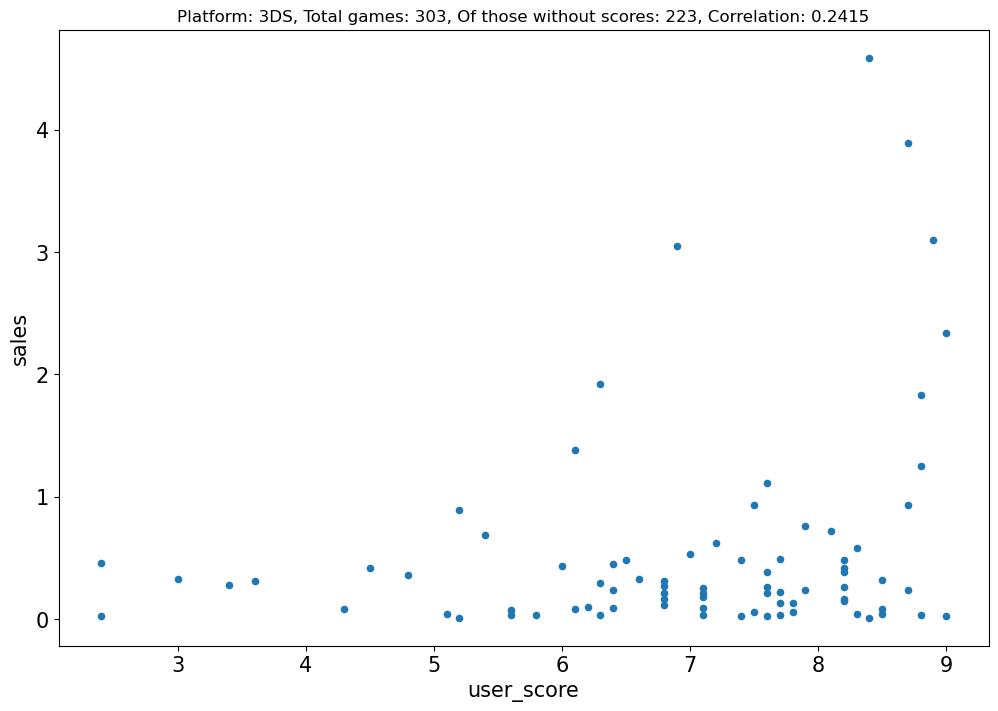

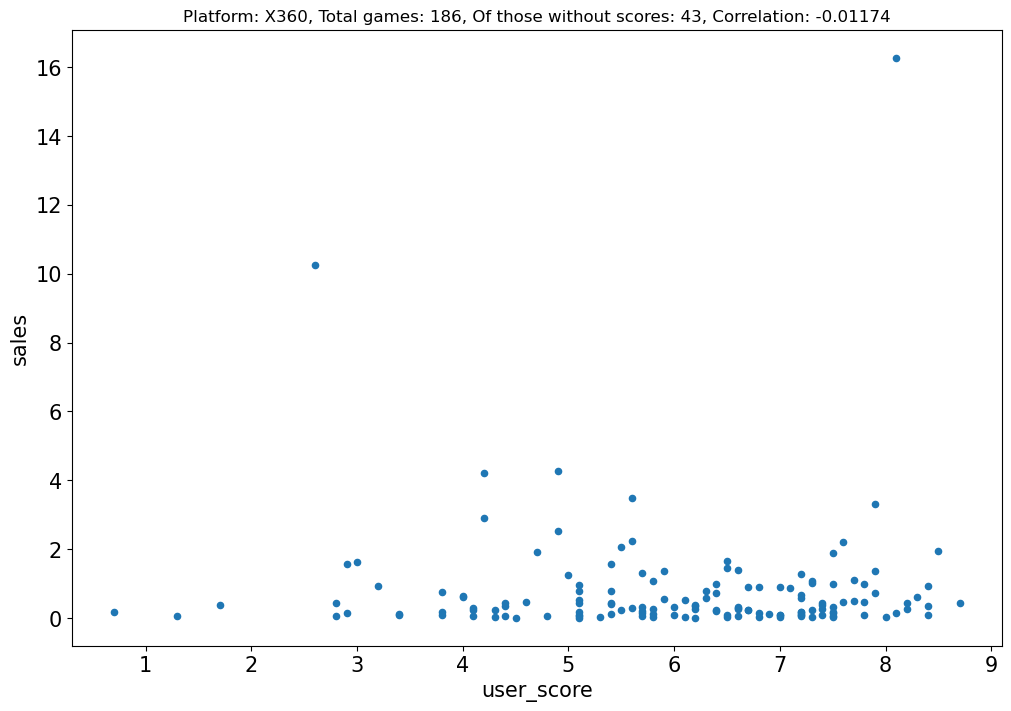

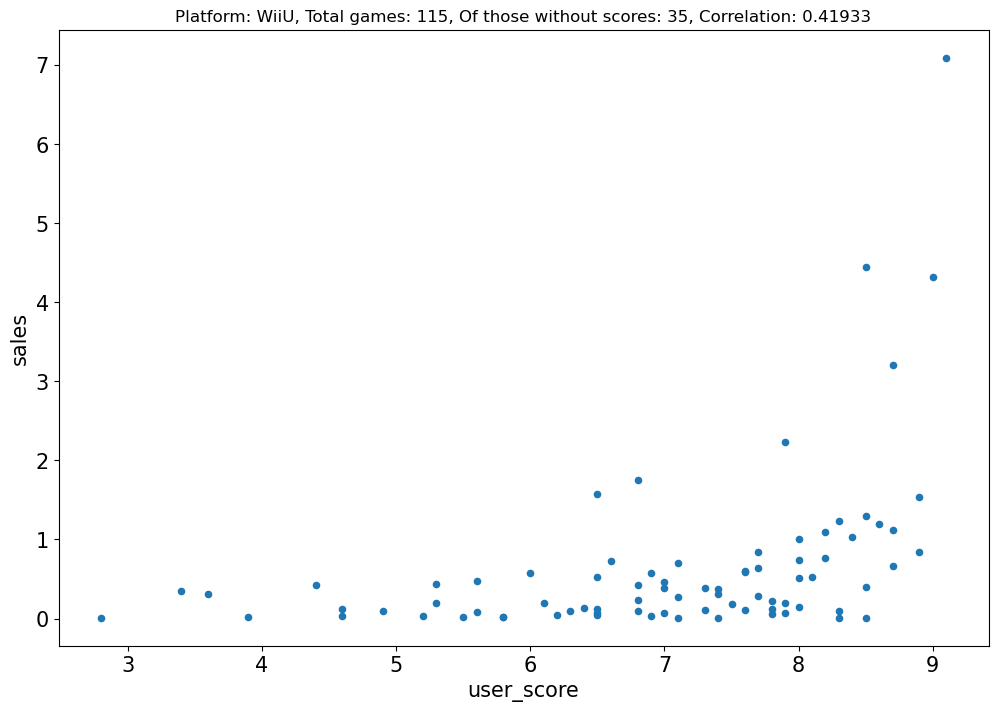

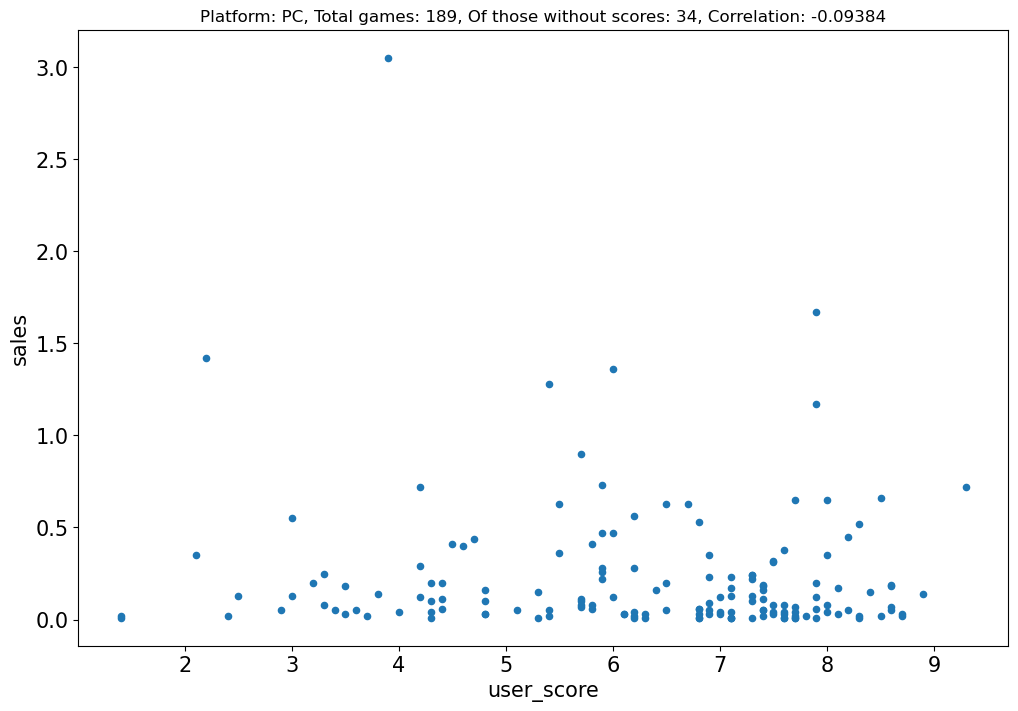

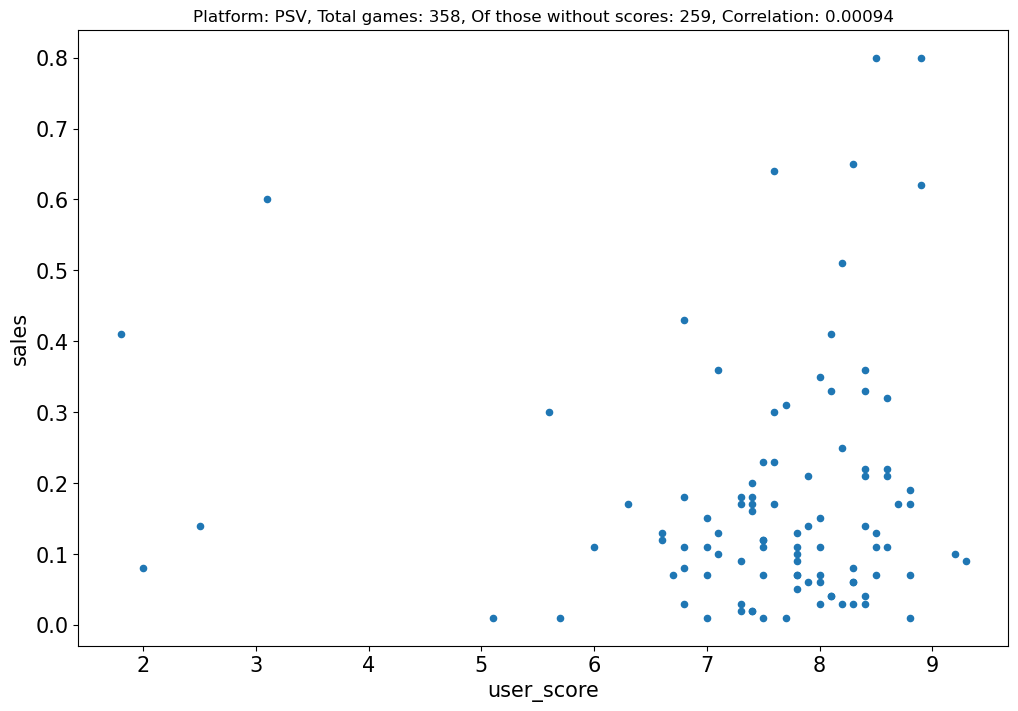

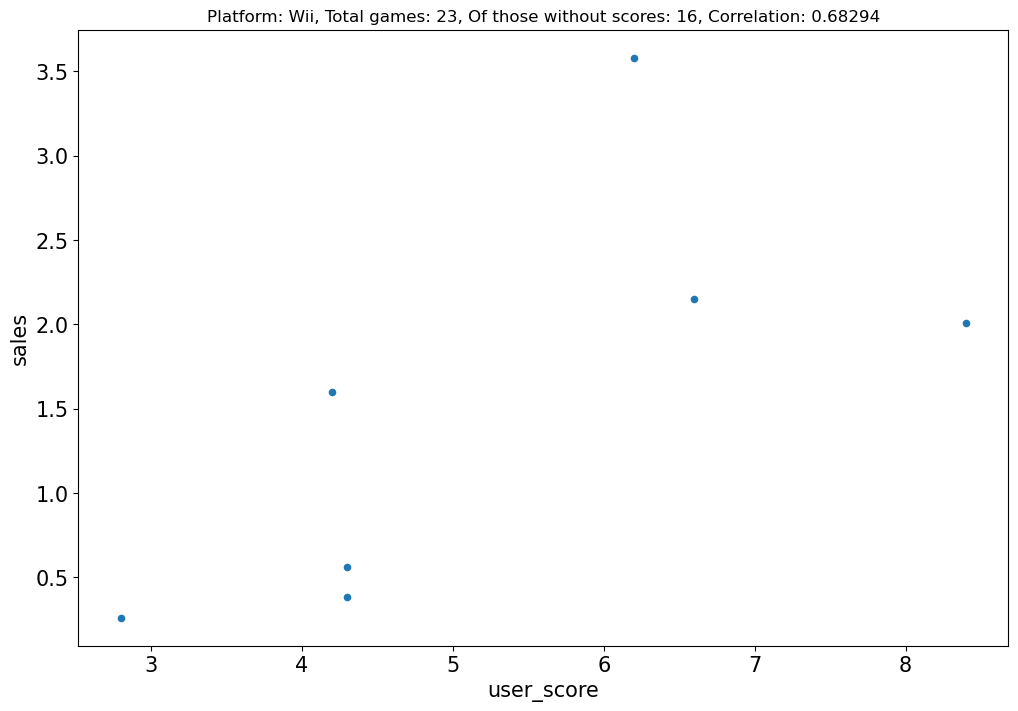

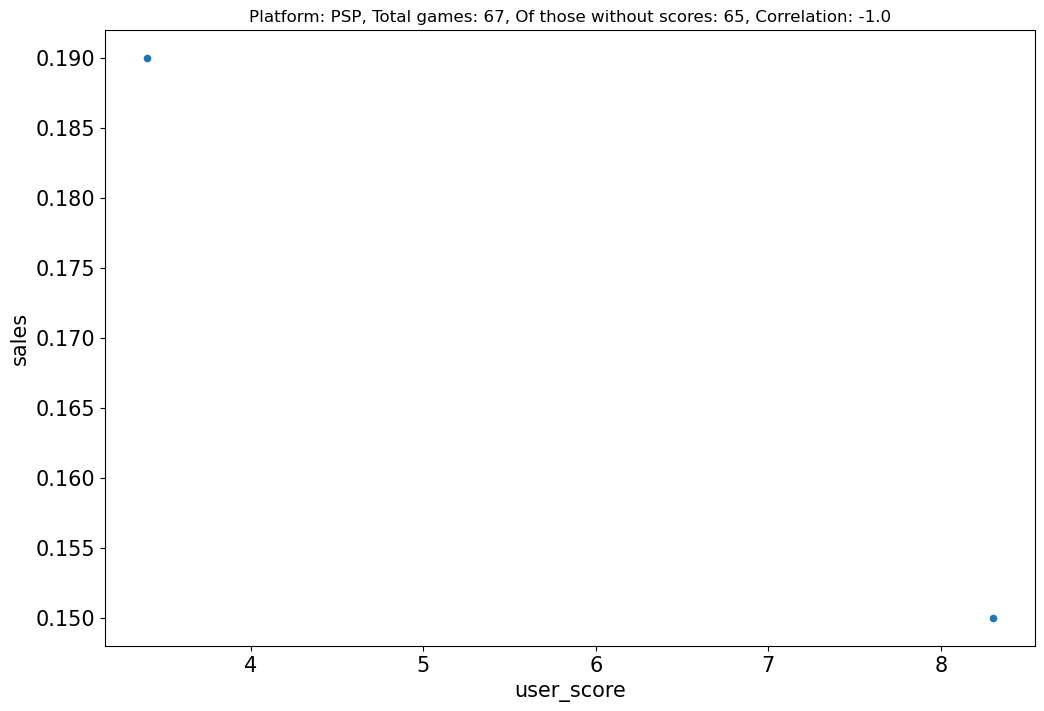

/home/leonid/anaconda3/envs/practicum/lib/python3.9/site-packages/numpy/lib/function_base.py:2845: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/home/leonid/anaconda3/envs/practicum/lib/python3.9/site-packages/numpy/lib/function_base.py:2704: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


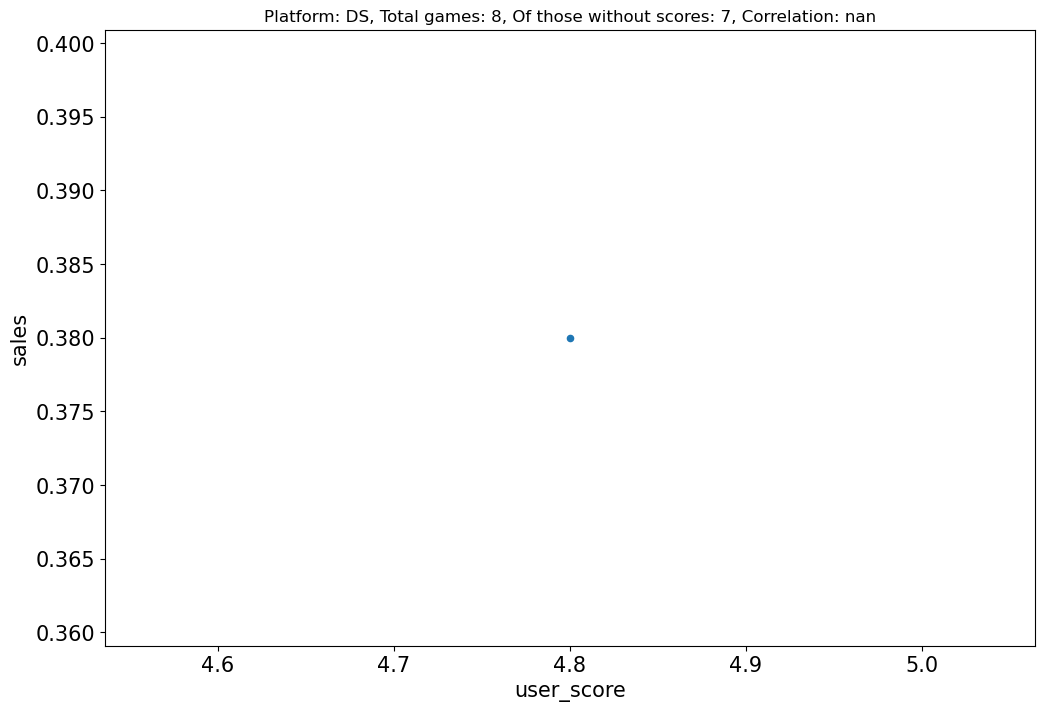

In [63]:
for platform in (data_new
                 .groupby('platform')['sales']
                 .sum()
                 .sort_values(ascending=False)
                 .index):
    current_data = data_new.query('platform == @platform')
    fig = (current_data
           .plot(kind='scatter', 
                 x='user_score', 
                 y='sales', 
                 figsize=(12, 8), 
                 fontsize=15))
    plt.title('Platform: {}, Total games: {}, Of those without scores: {}, Correlation: {}'.format(
        platform, 
        len(current_data), 
        current_data['user_score'].isna().sum(), 
        round(current_data['user_score'].corr(current_data['sales']), 5), 
        fontsize=15))
    plt.xlabel('user_score', fontsize=15)
    plt.ylabel('sales', fontsize=15)
    plt.show()

It can be seen that there is no correlation anywhere. Only with WiiU there is a mild correlation (0.42).

Similarly on the critics:

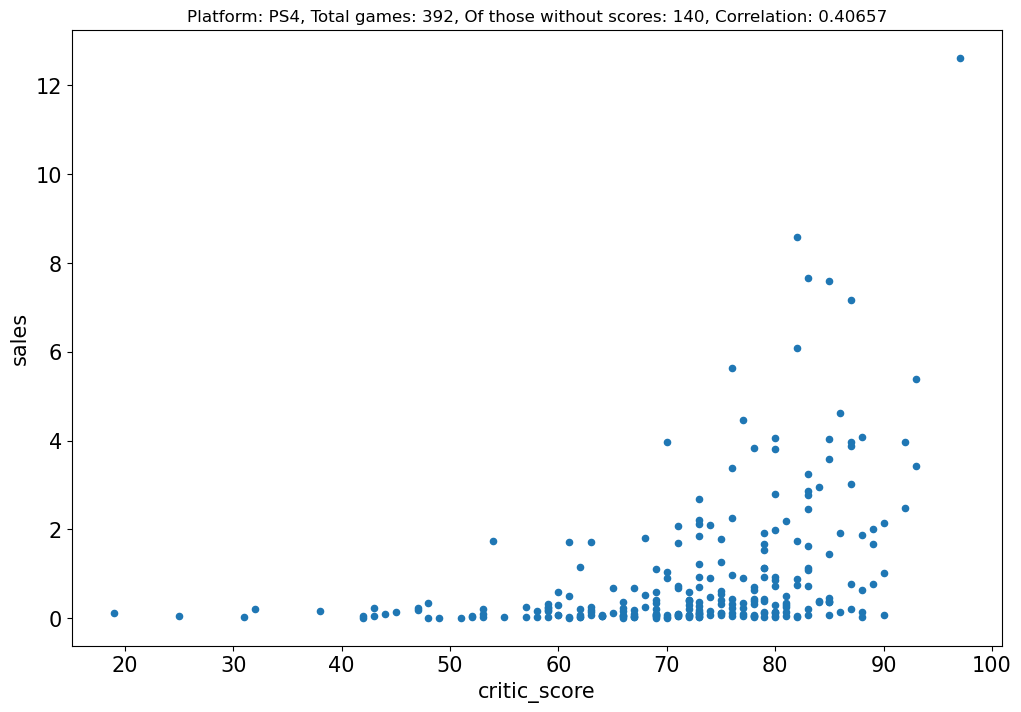

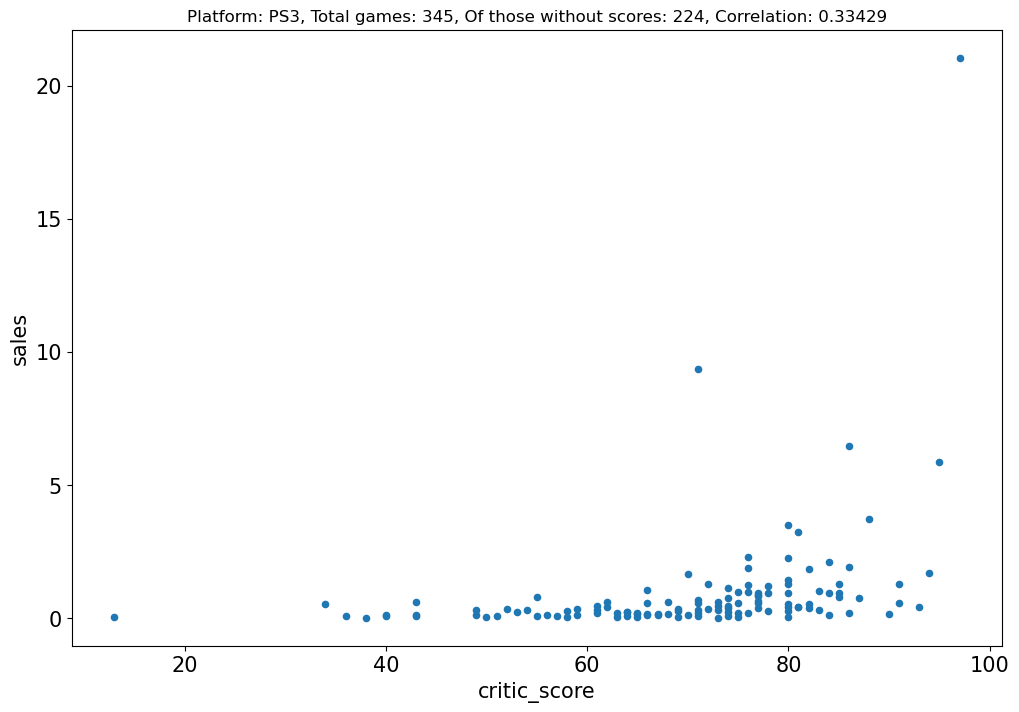

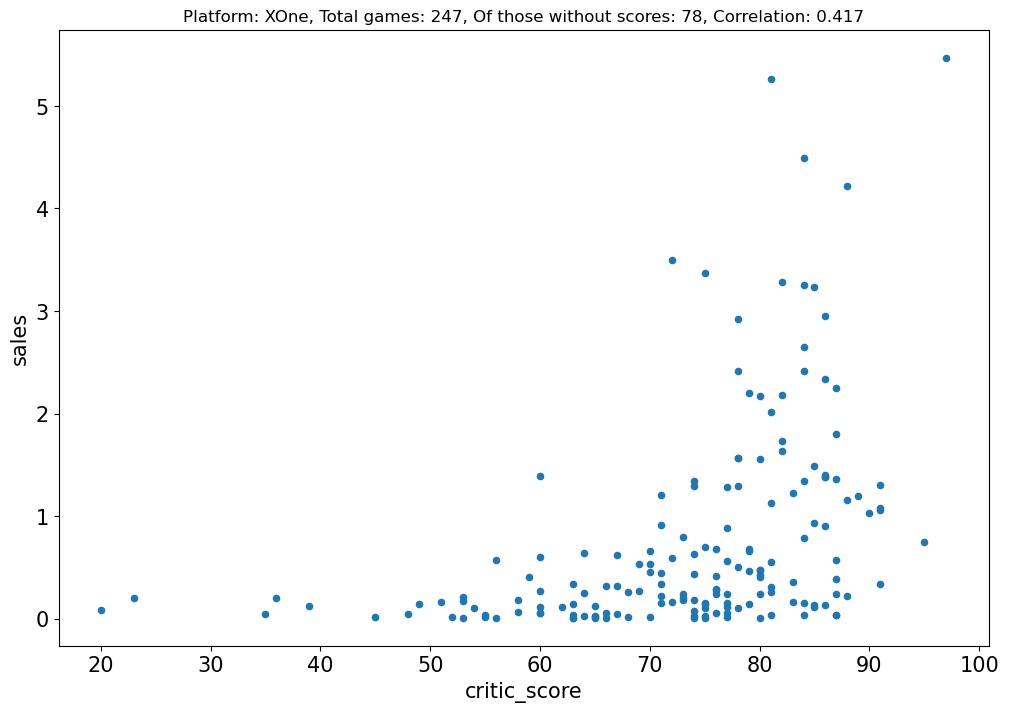

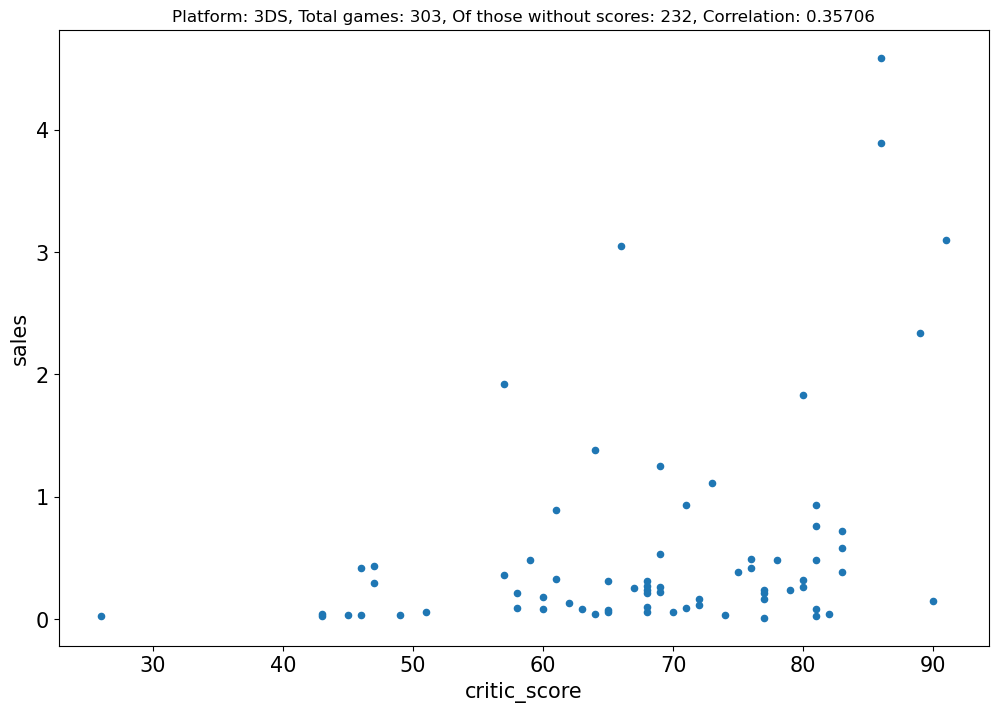

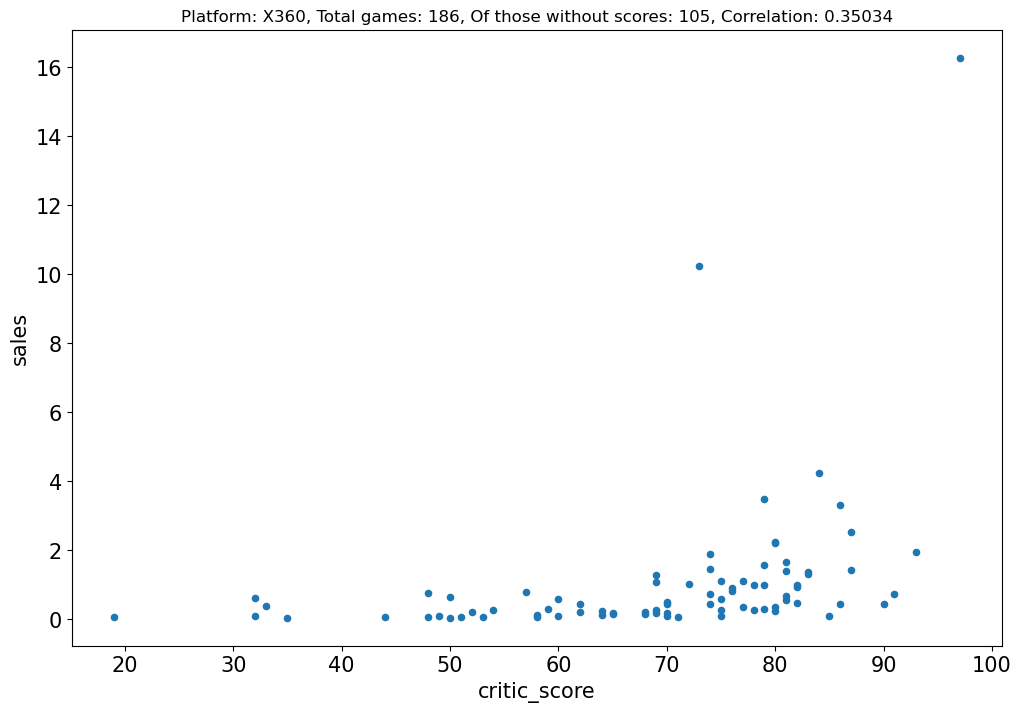

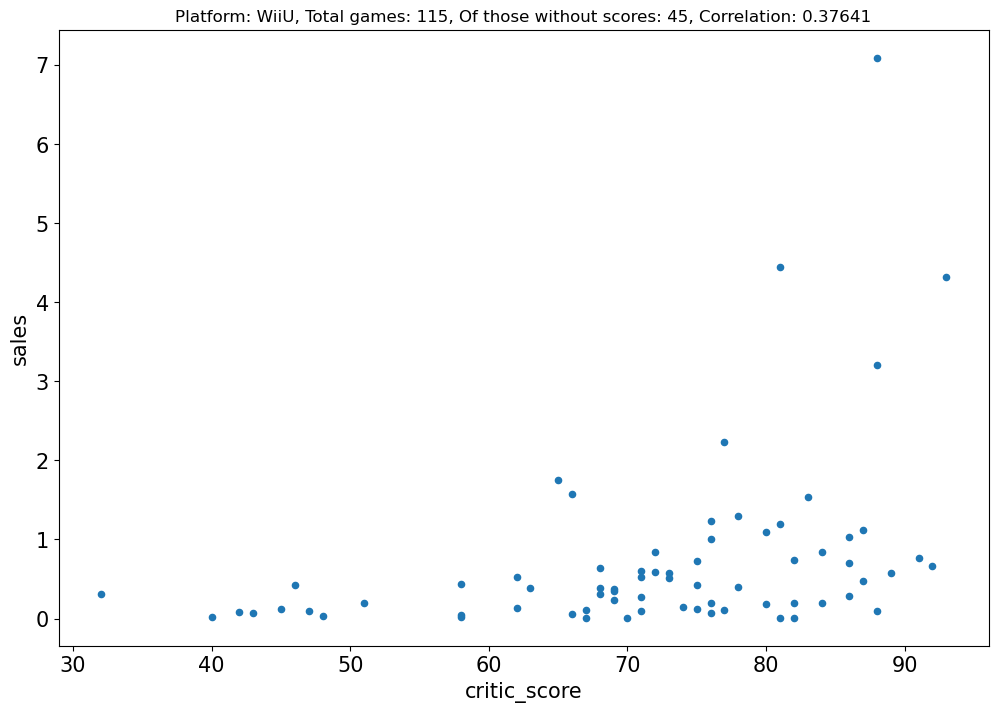

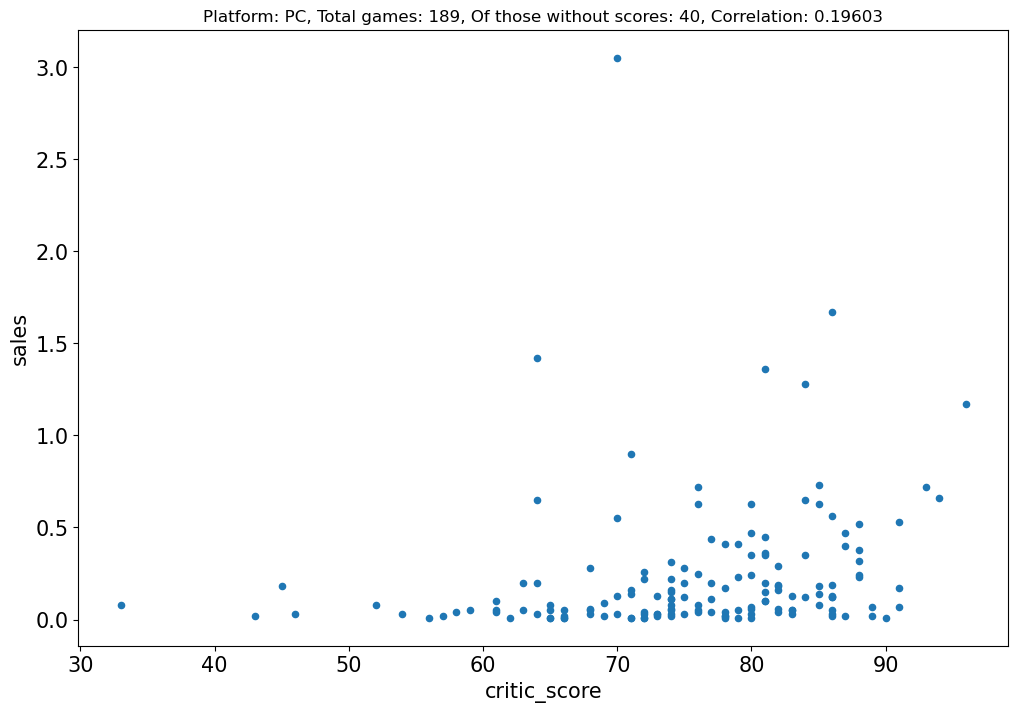

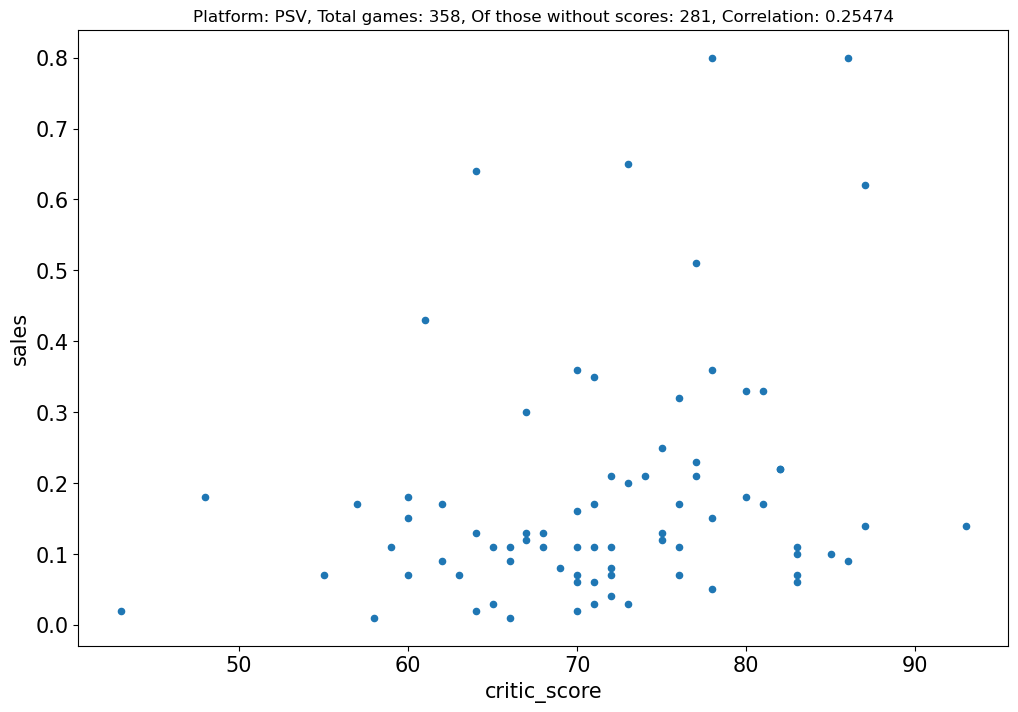

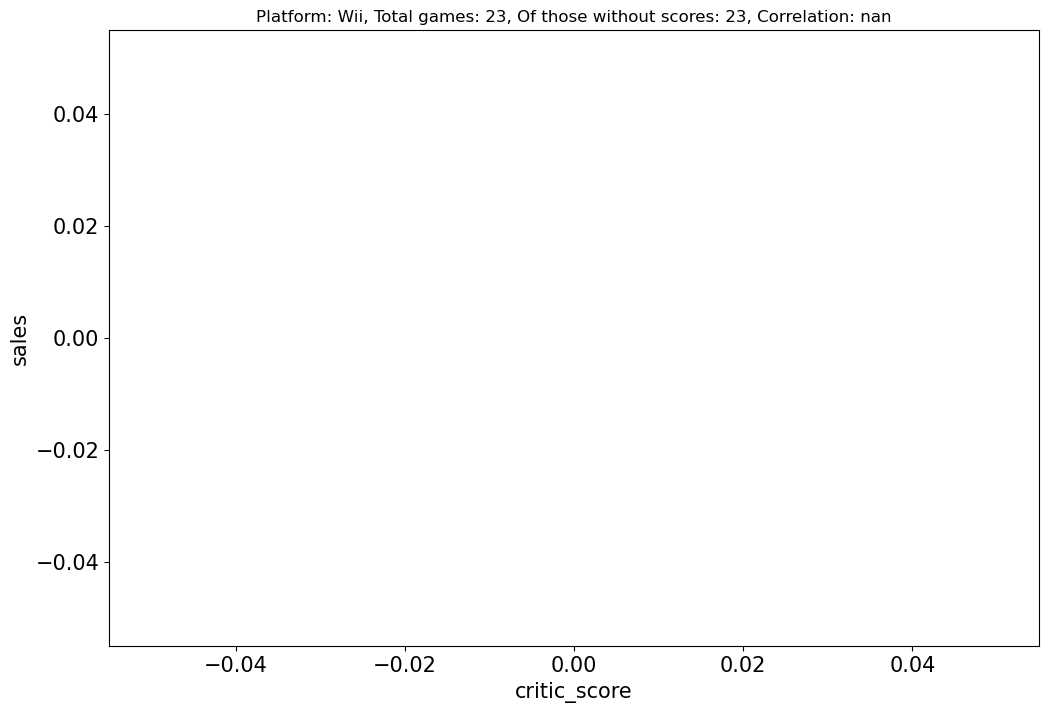

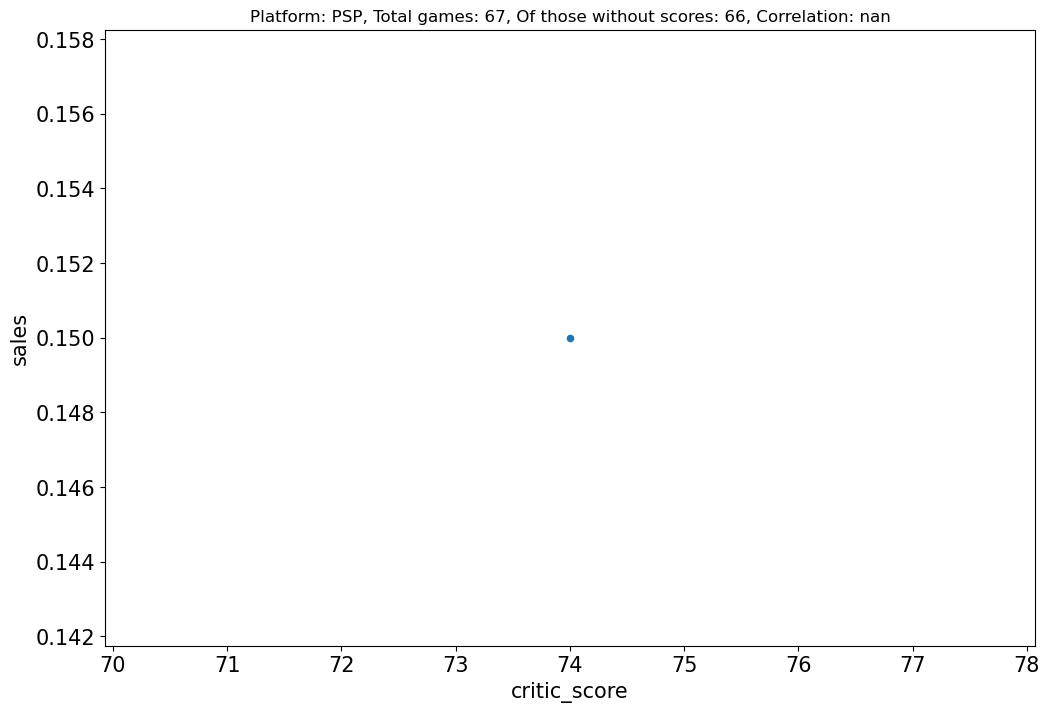

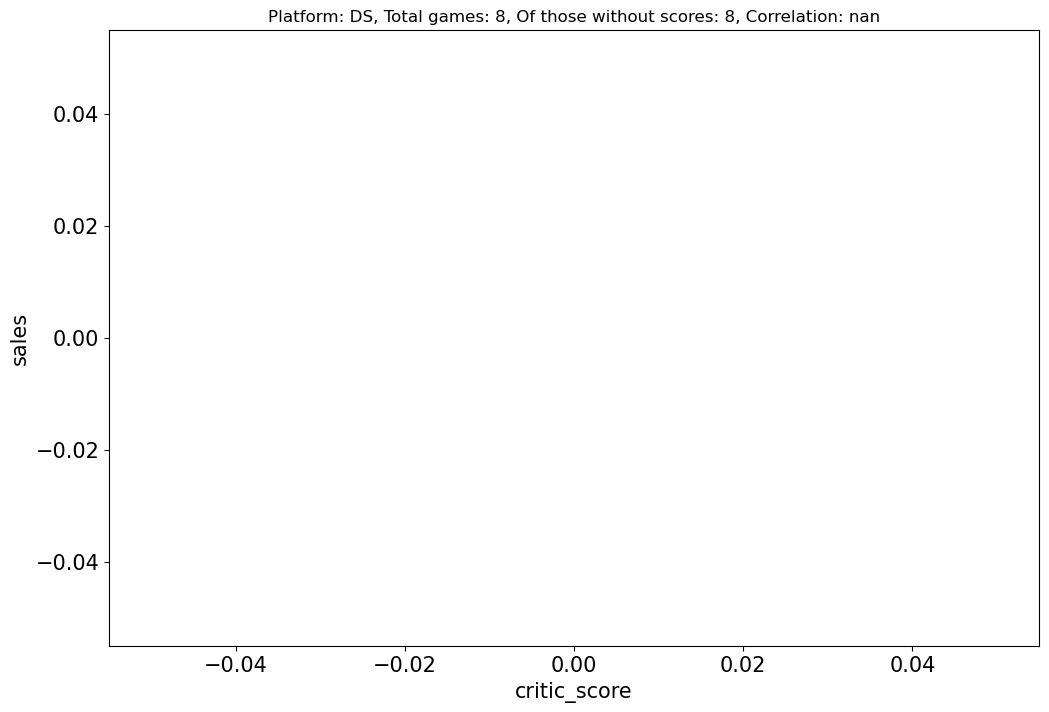

In [64]:
for platform in (data_new
                 .groupby('platform')['sales']
                 .sum()
                 .sort_values(ascending=False)
                 .index):
    current_data = data_new.query('platform == @platform')
    fig = (current_data
           .plot(kind='scatter', 
                 x='critic_score', 
                 y='sales', 
                 figsize=(12, 8), 
                 fontsize=15))
    plt.title('Platform: {}, Total games: {}, Of those without scores: {}, Correlation: {}'.format(
        platform, 
        len(current_data), 
        current_data['critic_score'].isna().sum(), 
        round(current_data['critic_score'].corr(current_data['sales']), 5), 
        fontsize=15))
    plt.xlabel('critic_score', fontsize=15)
    plt.ylabel('sales', fontsize=15)
    plt.show()

In 6 cases out of 11 the correlation is weak, i.e. the score cannot be the only parameter on which sales depend. This is proved by a significant part of poorly selling but highly rated games. Critics' scores, however, predict slightly better than users.

Perhaps the picture would be different on data for the known period 2002-2011.

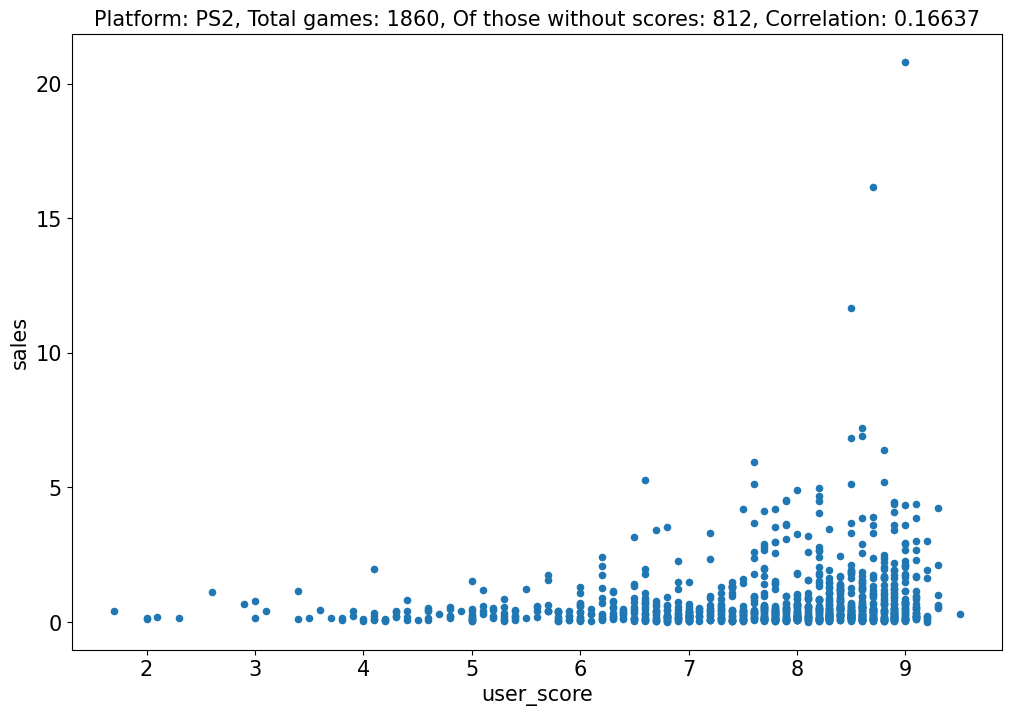

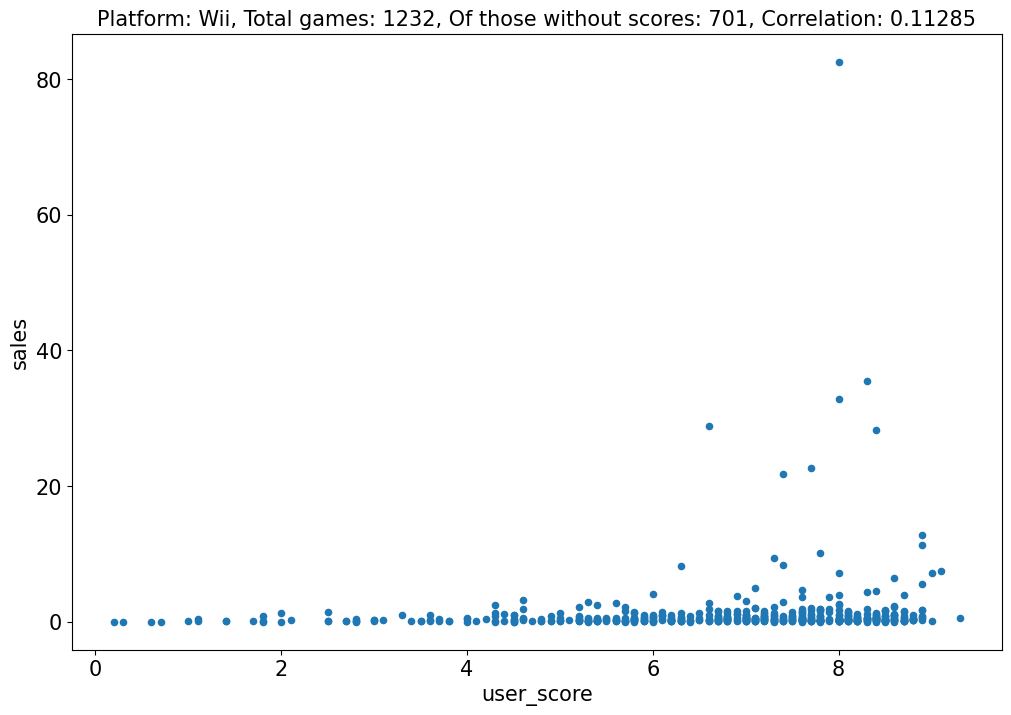

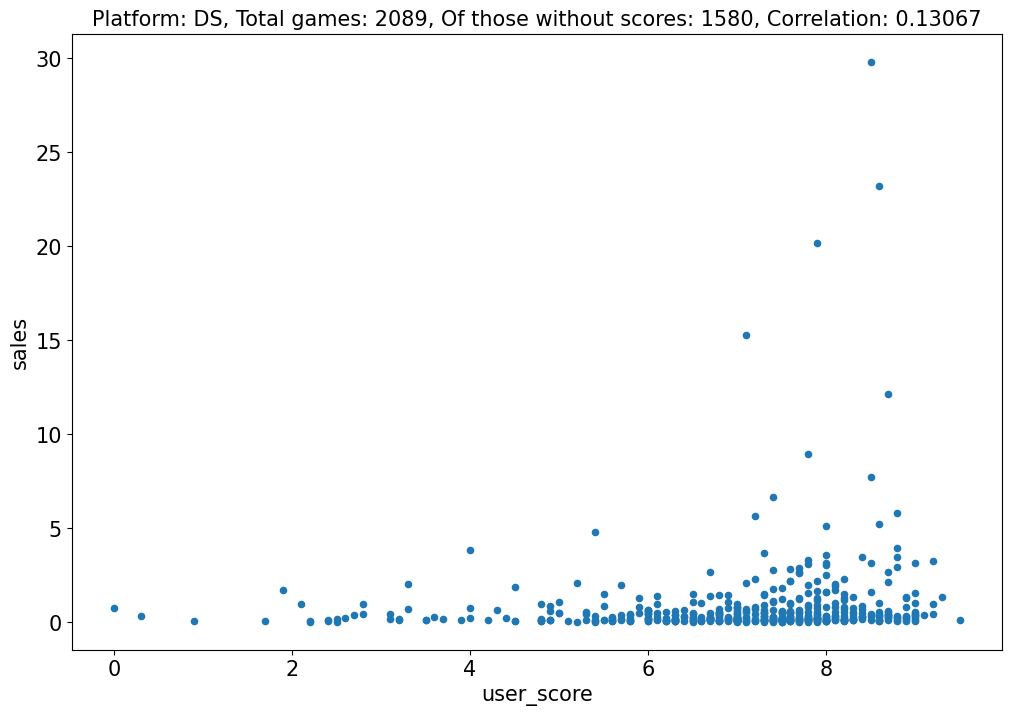

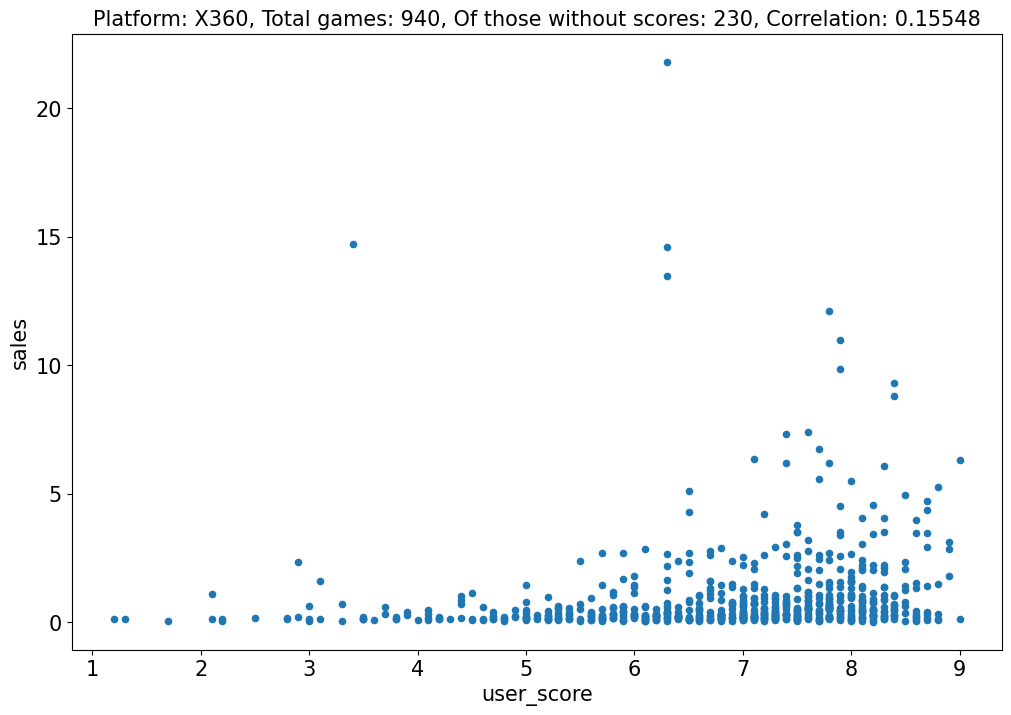

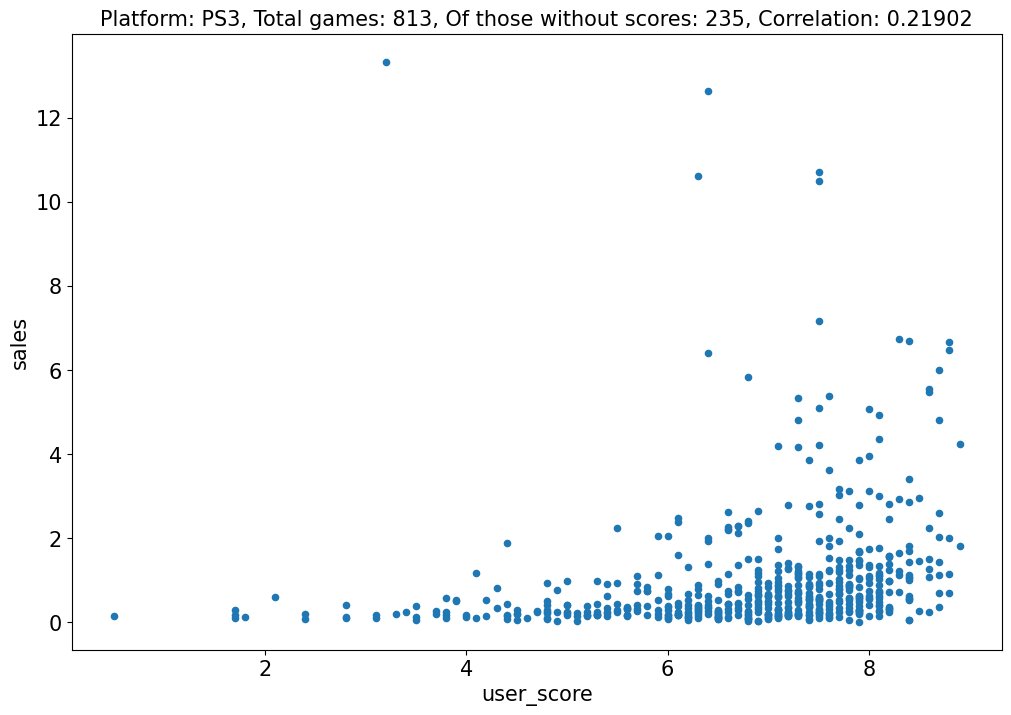

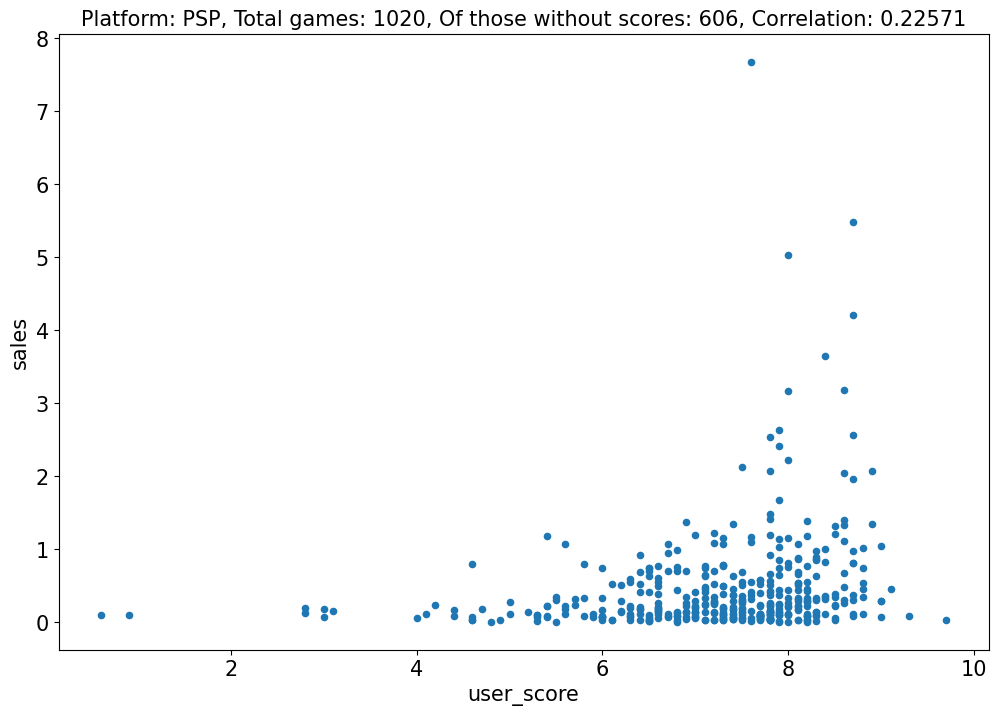

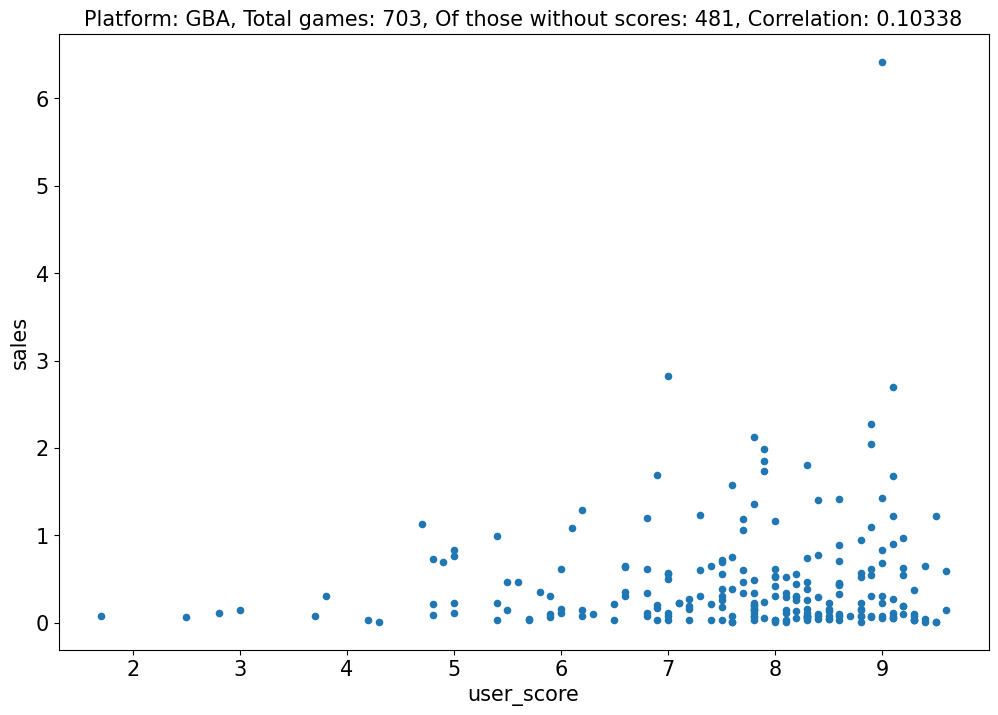

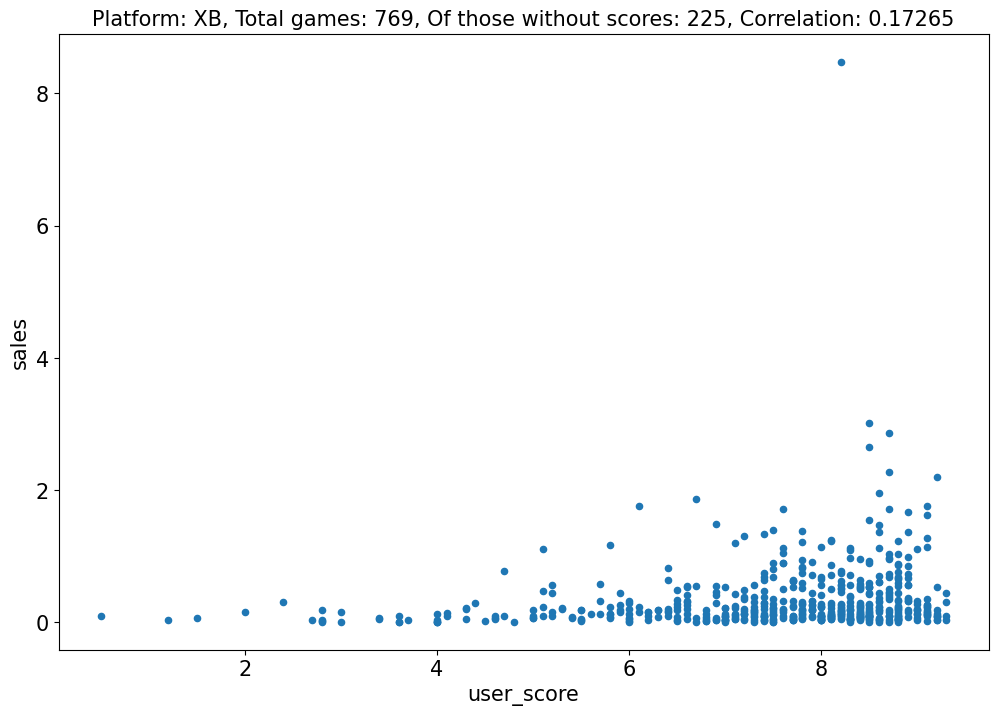

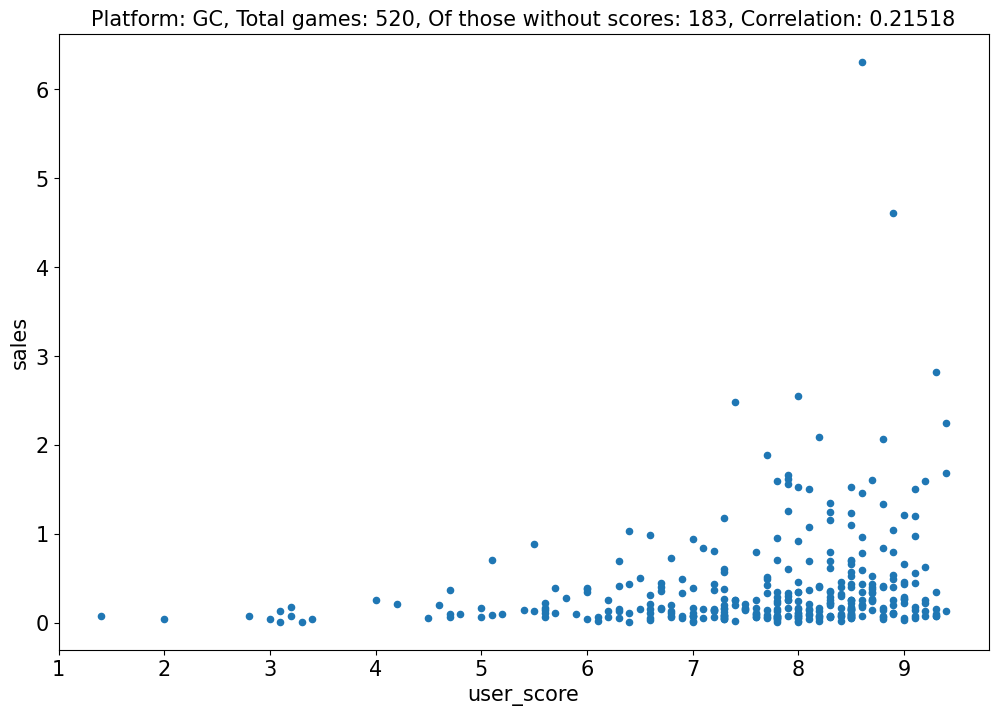

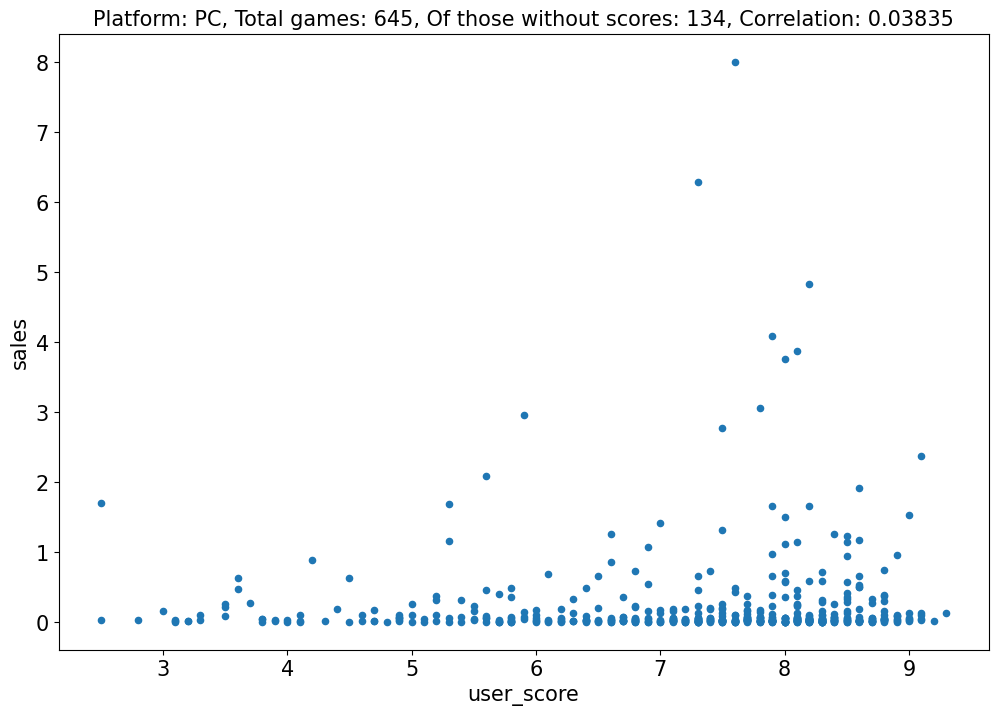

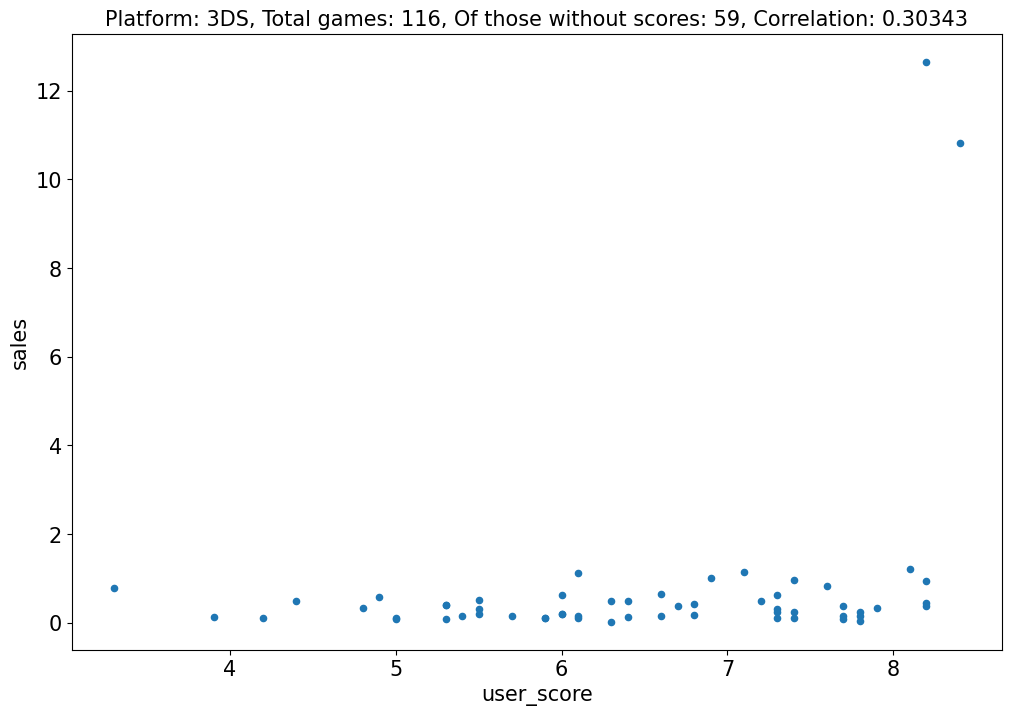

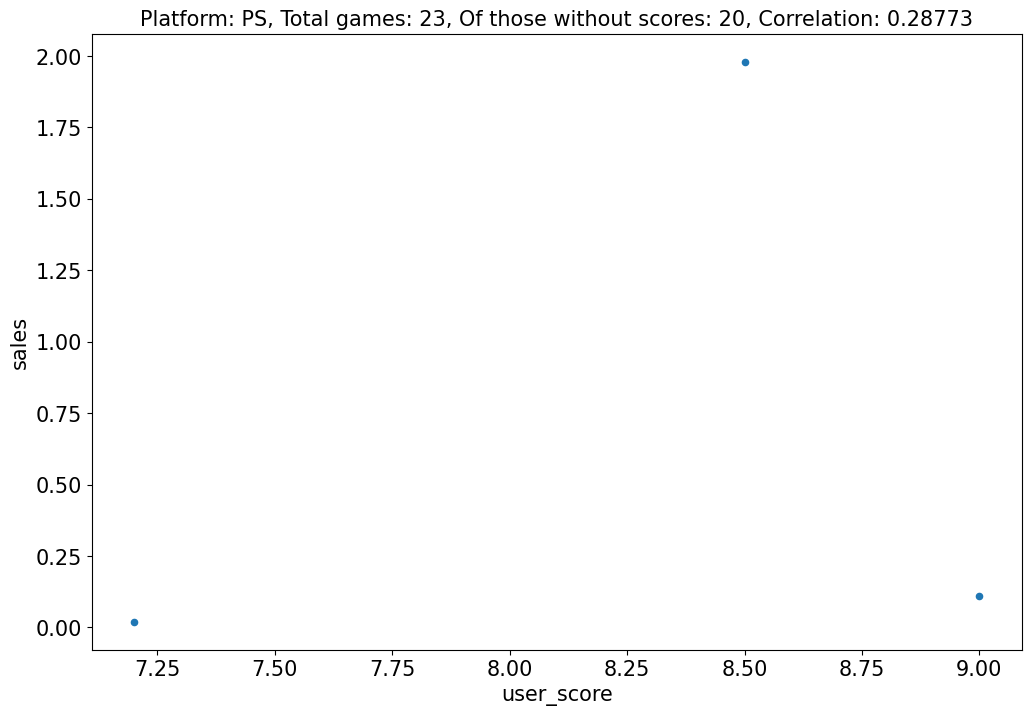

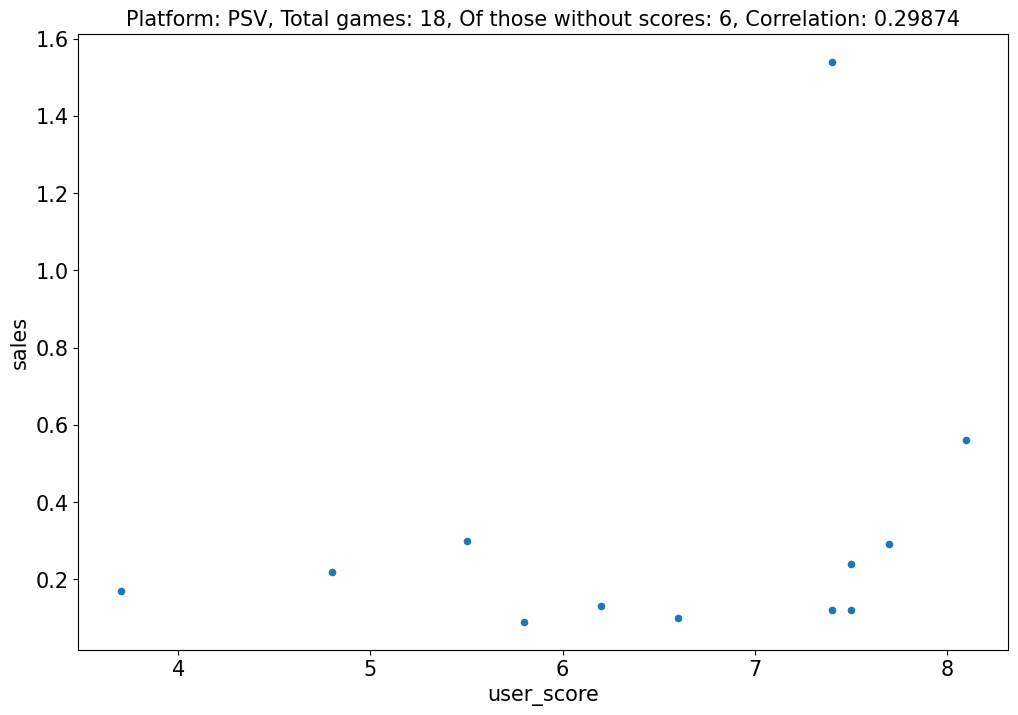

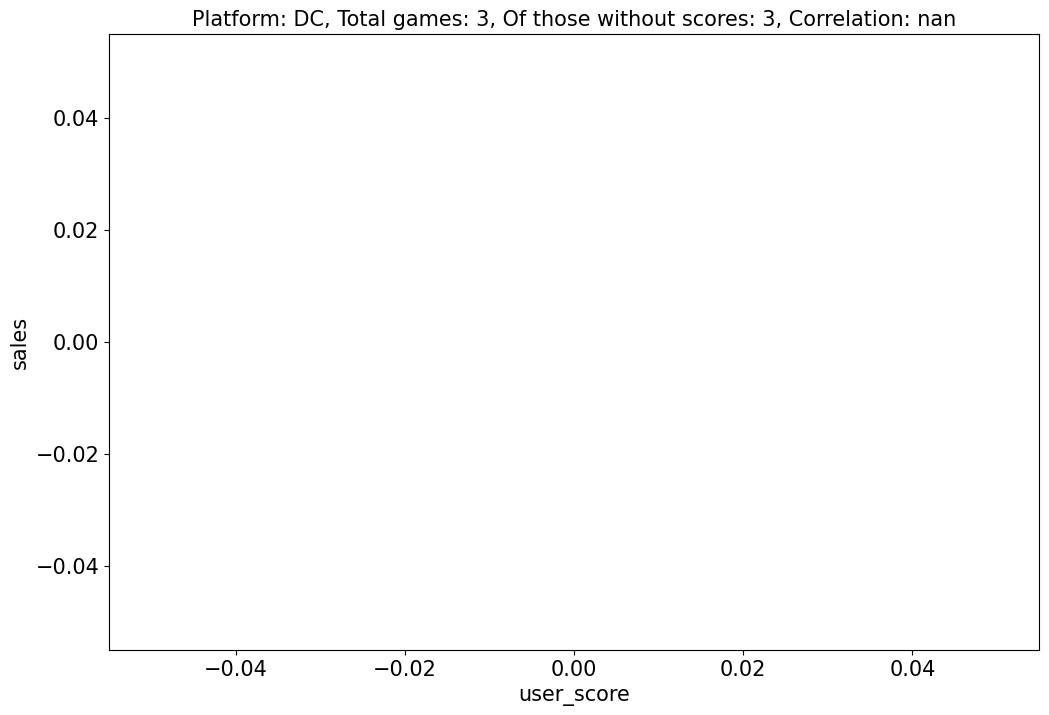

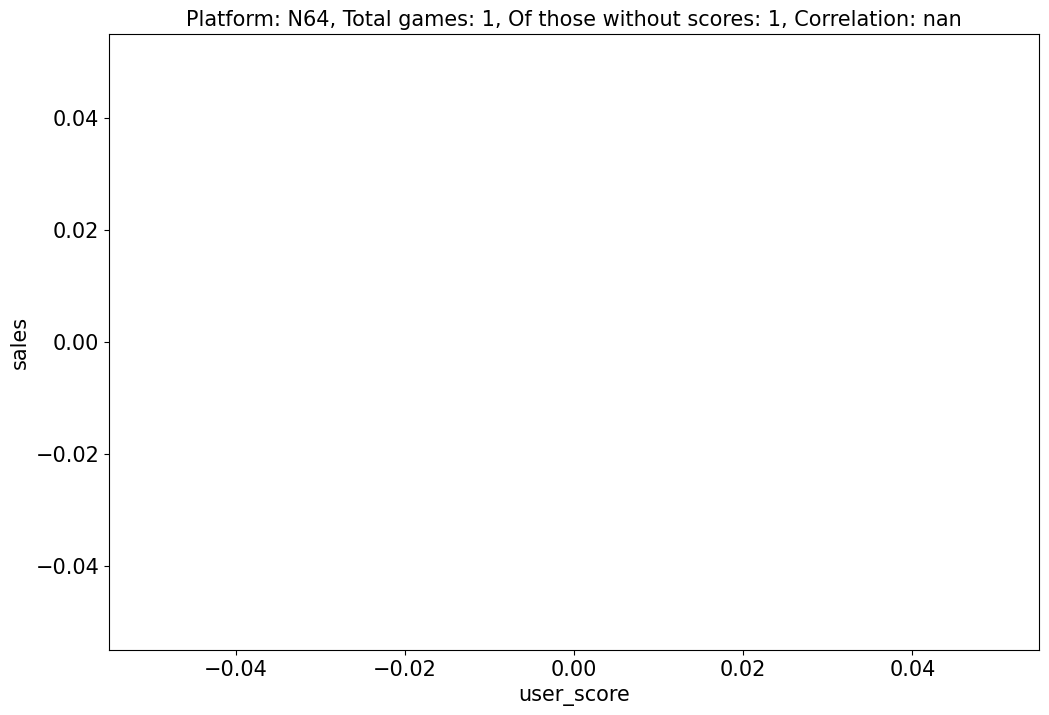

In [65]:
data_middle = data.query('2002 <= year <= 2011')
for platform in (data_middle
                 .groupby('platform')['sales']
                 .sum()
                 .sort_values(ascending=False)
                 .index):
    current_data = data_middle.query('platform == @platform')
    fig = (current_data
           .plot(kind='scatter', 
                 x='user_score', 
                 y='sales', 
                 figsize=(12, 8), 
                 fontsize=15))
    plt.title('Platform: {}, Total games: {}, Of those without scores: {}, Correlation: {}'.format(
        platform, 
        len(current_data), 
        current_data['user_score'].isna().sum(), 
        round(current_data['user_score'].corr(current_data['sales']), 5)), 
        fontsize=15)
    plt.xlabel('user_score', fontsize=15)
    plt.ylabel('sales', fontsize=15)
    plt.show()

No, it's the same thing. The games that sell good are usually rated above average, but there are many more of highly rated games that are sold poorly.

### Sales by genre

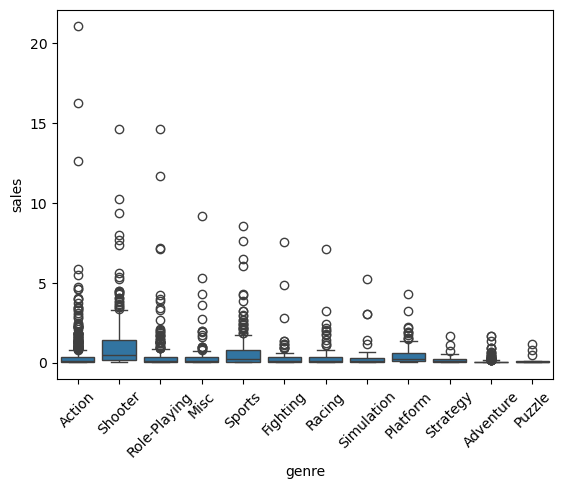

In [66]:
sb.boxplot(data=data_new, x='genre', y='sales')
plt.xticks(rotation=45)
plt.show()

<a id='genres'></a>

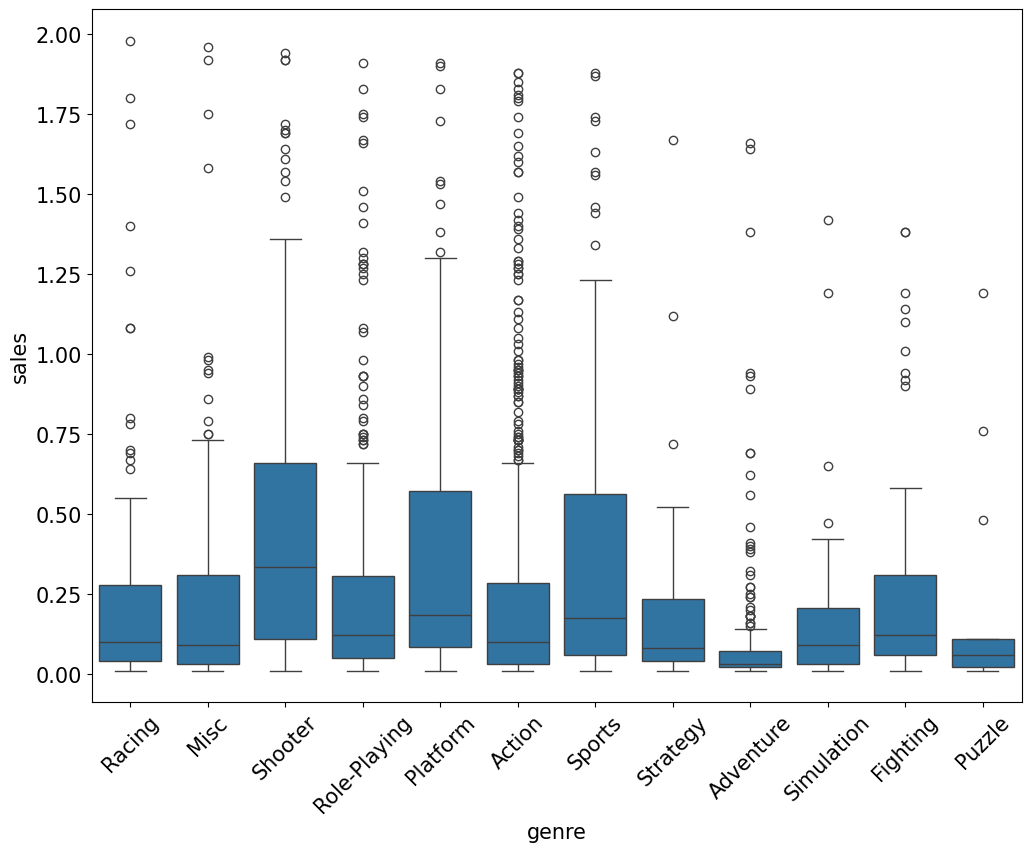

In [67]:
plt.figure(figsize=(12, 9))
plt.rcParams.update({'font.size': 15})
sb.boxplot(data=data_new.query('sales <= 2'), x='genre', y='sales')
plt.xticks(rotation=45)
plt.show()

In [68]:
(data_new
 .groupby('genre')['sales']
 .agg(['count', 'mean', 'median', 'sum'])
 .sort_values(by='median', ascending=False))

count      mean  median     sum
genre                                        
Shooter         187  1.245882   0.450  232.98
Sports          214  0.703972   0.240  150.65
Platform         74  0.576081   0.225   42.63
Role-Playing    292  0.499623   0.125  145.89
Fighting         80  0.441375   0.125   35.31
Racing           85  0.469294   0.120   39.89
Action          766  0.420196   0.110  321.87
Simulation       62  0.350968   0.100   21.76
Misc            155  0.405290   0.100   62.82
Strategy         56  0.180000   0.080   10.08
Puzzle           17  0.186471   0.060    3.17
Adventure       245  0.096490   0.030   23.64

There's definitely a difference here. The average shooter sells more often than the average action game (which make up the majority of the market).

### Sales by rating

Let's find out the games with which rating are sold the best.

In [69]:
new_stat_by_rating = data_new\
.groupby(['rating', 'year'])\
.agg({'name': 'count', 'sales': 'sum'})
for index, row in new_stat_by_rating.iterrows():
    new_stat_by_rating.loc[index, 'part'] = (row['sales'] / 
    sum(new_stat_by_rating.loc[pd.IndexSlice[:, index[1]], :]['sales']))

In [70]:
(new_stat_by_rating
 .loc[pd.IndexSlice[:, 2015], :]
 .sort_values(by='sales').index.levels[0])

Index(['E', 'E10+', 'M', 'T', 'unknown'], dtype='object', name='rating')

In [71]:
new_stat_by_rating.loc[pd.IndexSlice[:, 2015], :]

name  sales      part
rating  year                       
E       2015    87  49.50  0.184715
E10+    2015    51  27.55  0.102806
M       2015    71  72.75  0.271475
T       2015   106  33.61  0.125420
unknown 2015   291  84.57  0.315583

- E – for all ages
- EC – for persons over 3 years of age
- E10+ – for persons over 10 years old
- T – for persons over 13 years old
- M – for persons over 17 years of age
- AO – for adults (over 18 years old)
- RP – the game is not rated

<a id='unknown_rating'></a>

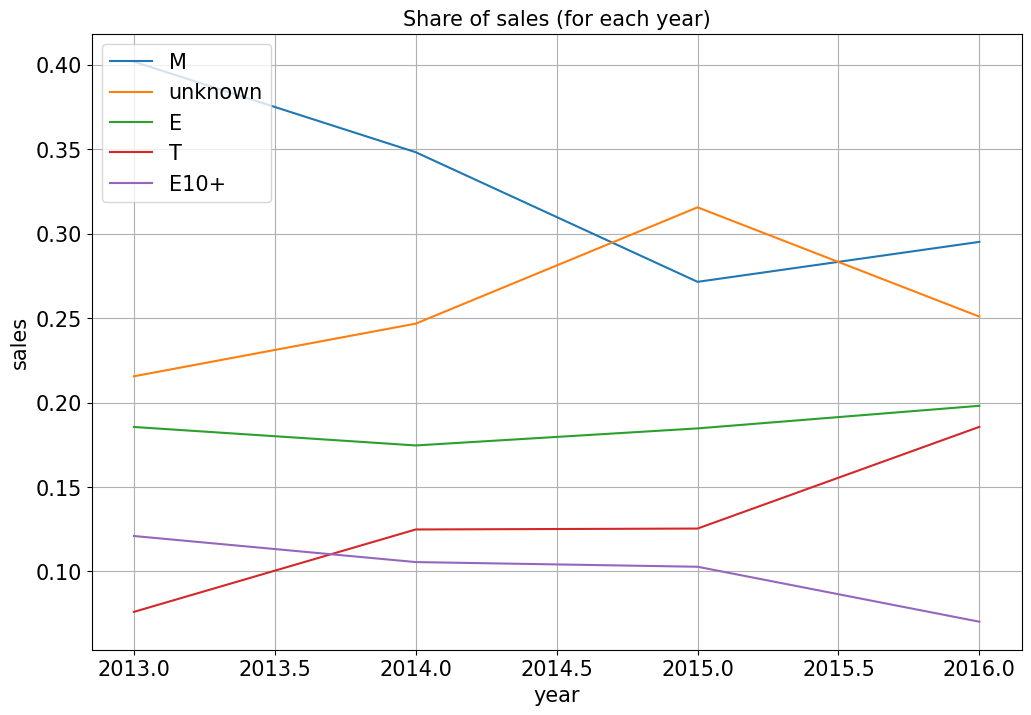

In [72]:
for rating in (data_new
                 .groupby('rating')['sales']
                 .sum()
                 .sort_values(ascending=False)
                 .index):
    (new_stat_by_rating
     .loc[rating]['part']
     .plot(kind='line', 
           figsize=(12, 8), 
           fontsize=15, 
           rot=0, 
           grid=True, 
           label=rating))
plt.title('Share of sales (for each year)', fontsize=15)
plt.xlabel('year', fontsize=15)
plt.ylabel('sales', fontsize=15)
plt.legend(loc='upper left', fontsize=15)
plt.show()

There was a noticeable peak in the number of sales of games with uncertain ratings in 2015.

Let's see how many such sales took place in 2015.

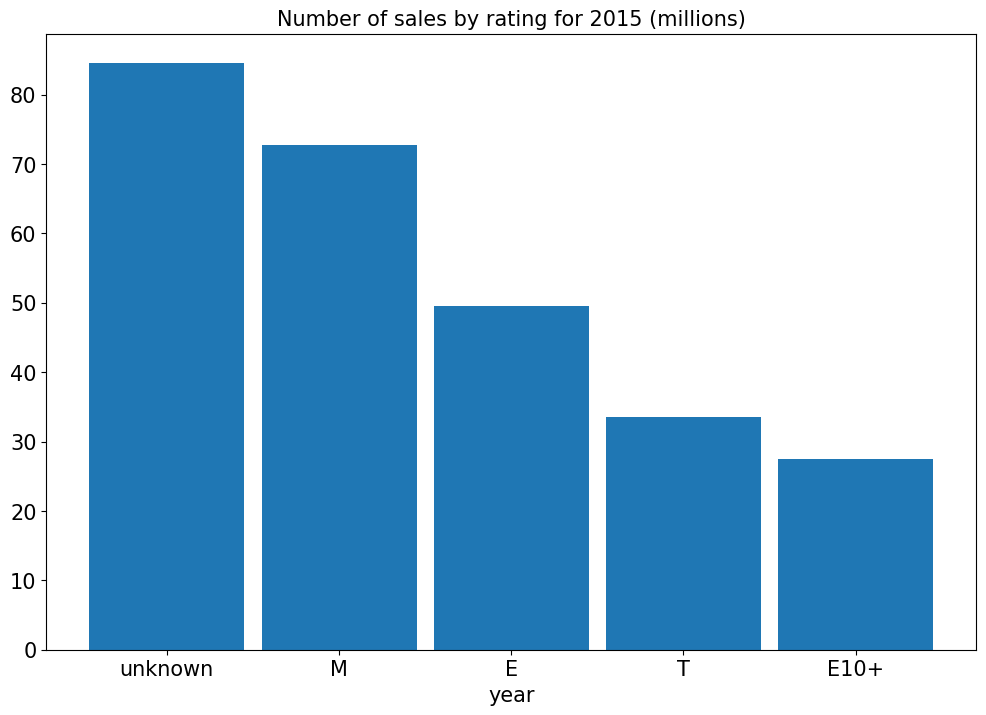

In [73]:
fig = (new_stat_by_rating
       .loc[pd.IndexSlice[:, 2015], :]
       .sort_values(by='sales', ascending=False)
       ['sales']
       .droplevel(1, axis=0)
       .plot(kind='bar', figsize=(12, 8), width=0.9, fontsize=15, rot=0))
plt.title('Number of sales by rating for 2015 (millions)', fontsize=15)
plt.xlabel('year', fontsize=15)
plt.show()

## User profiles

Let's consider sales by region.

### North America

In [74]:
(data_new
 .groupby('platform')['NA_sales']
 .agg(['count', 'mean', 'median', 'sum'])
 .sort_values(by='sum', ascending=False))

count      mean  median     sum
platform                                 
PS4         392  0.277398   0.060  108.74
XOne        247  0.377004   0.120   93.12
X360        186  0.439032   0.150   81.66
PS3         345  0.184058   0.030   63.50
3DS         303  0.126073   0.000   38.20
WiiU        115  0.254000   0.090   29.21
PC          189  0.058783   0.000   11.11
Wii          23  0.285217   0.040    6.56
PSV         358  0.014078   0.000    5.04
DS            8  0.071250   0.015    0.57
PSP          67  0.000000   0.000    0.00

As far as the popularity of the platforms is concerned, the total number of sales should be compared.

In [75]:
NA_stat_by_platform = (data_new
                       .groupby(['platform', 'year'])
                       .agg({'name': 'count', 'NA_sales': 'sum'}))
for index, row in NA_stat_by_platform.iterrows():
    NA_stat_by_platform.loc[index, 'part'] = (row['NA_sales'] / 
    sum(NA_stat_by_platform.loc[pd.IndexSlice[:, index[1]], :]['NA_sales']))

<a id='NA_platforms'></a>

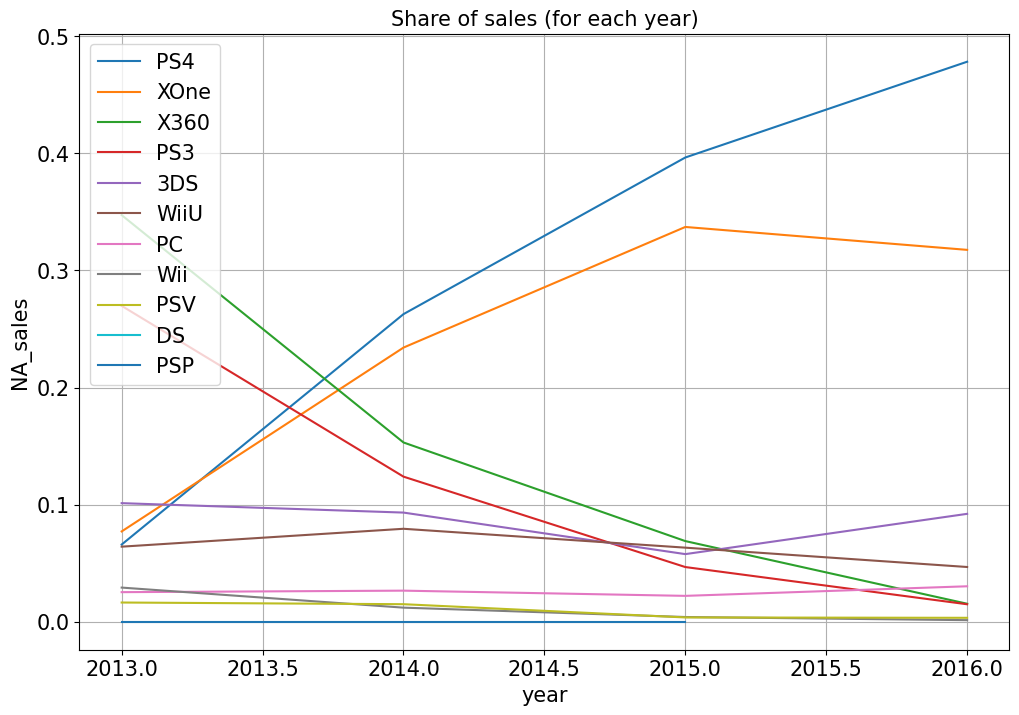

In [76]:
for platform in (data_new
                 .groupby('platform')['NA_sales']
                 .sum()
                 .sort_values(ascending=False)
                 .index):
    (NA_stat_by_platform
     .loc[platform]['part']
     .plot(kind='line', 
           figsize=(12, 8), 
           fontsize=15, 
           rot=0, 
           grid=True, 
           label=platform))
plt.title('Share of sales (for each year)', fontsize=15)
plt.xlabel('year', fontsize=15)
plt.ylabel('NA_sales', fontsize=15)
plt.legend(loc='upper left', fontsize=15)
plt.show()

After all, the PS4 and XOne are displacing the PS3 and X360, while the 3DS remains on the same level. Apparently, players prefer to replace the console if a new version comes out. Or the producers stop selling the games for the old ones.

In [77]:
NA_stat_by_genre = (data_new
                       .groupby(['genre', 'year'])
                       .agg({'name': 'count', 'NA_sales': 'sum'}))
for index, row in NA_stat_by_genre.iterrows():
    NA_stat_by_genre.loc[index, 'part'] = (row['NA_sales'] / 
    sum(NA_stat_by_genre.loc[pd.IndexSlice[:, index[1]], :]['NA_sales']))

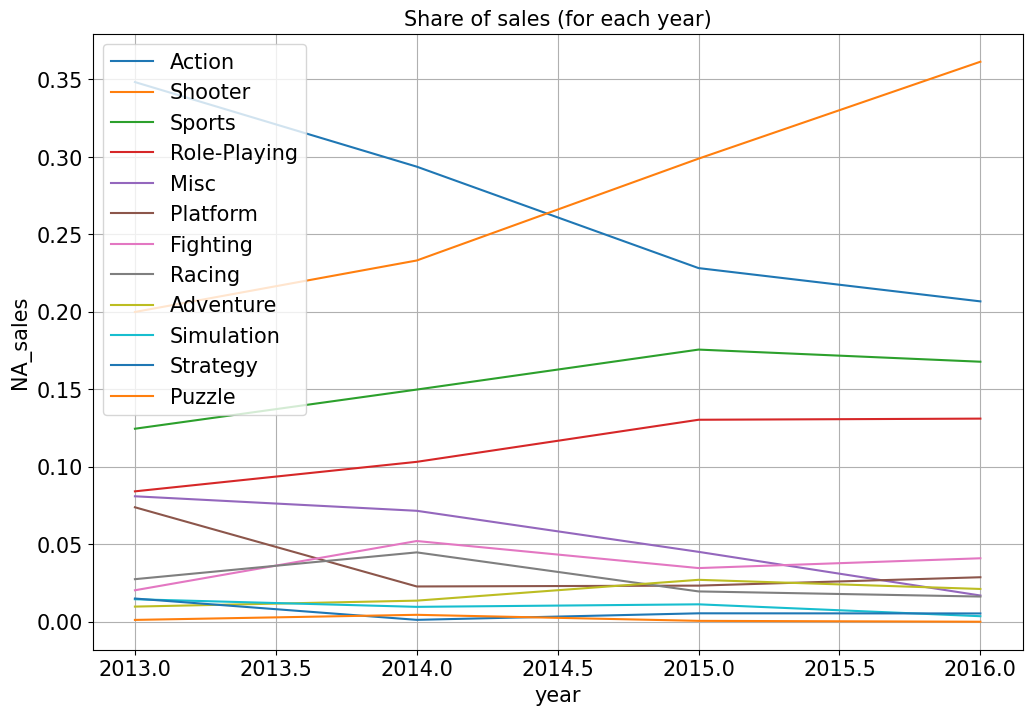

In [78]:
for genre in (data_new
                 .groupby('genre')['NA_sales']
                 .sum()
                 .sort_values(ascending=False)
                 .index):
    (NA_stat_by_genre
     .loc[genre]['part']
     .plot(kind='line', 
           figsize=(12, 8), 
           fontsize=15, 
           rot=0, 
           grid=True, 
           label=genre))
plt.title('Share of sales (for each year)', fontsize=15)
plt.xlabel('year', fontsize=15)
plt.ylabel('NA_sales', fontsize=15)
plt.legend(loc='upper left', fontsize=15)
plt.show()

<a id='NA_genres'></a>

In [79]:
(data_new
 .groupby('genre')['NA_sales']
 .agg(['count', 'mean', 'median', 'sum'])
 .sort_values(by='median', ascending=False))

count      mean  median     sum
genre                                        
Shooter         187  0.586845   0.200  109.74
Platform         74  0.245135   0.090   18.14
Sports          214  0.305000   0.080   65.27
Fighting         80  0.194375   0.045   15.55
Racing           85  0.152471   0.030   12.96
Action          766  0.164556   0.020  126.05
Role-Playing    292  0.158904   0.020   46.40
Misc            155  0.177355   0.010   27.49
Adventure       245  0.029143   0.000    7.14
Puzzle           17  0.048824   0.000    0.83
Simulation       62  0.078387   0.000    4.86
Strategy         56  0.058571   0.000    3.28

In terms of genres, we should compare median sales because the site needs to understand how likely a new game is to pay off.

As leaders we get Shooter, Platform, Sports, Fighting and Racing.

In [80]:
(data_new
 .groupby('rating')['NA_sales']
 .agg(['count', 'mean', 'median', 'sum'])
 .sort_values(by='median', ascending=False))

count      mean  median     sum
rating                                  
M          369  0.447724    0.14  165.21
E10+       252  0.215238    0.12   54.24
E          302  0.261755    0.05   79.05
T          333  0.149520    0.04   49.79
unknown    977  0.091525    0.00   89.42

In [81]:
NA_stat_by_rating = (data_new
                       .groupby(['rating', 'year'])
                       .agg({'name': 'count', 'NA_sales': 'sum'}))
for index, row in NA_stat_by_rating.iterrows():
    NA_stat_by_rating.loc[index, 'part'] = (row['NA_sales'] / 
    sum(NA_stat_by_rating.loc[pd.IndexSlice[:, index[1]], :]['NA_sales']))

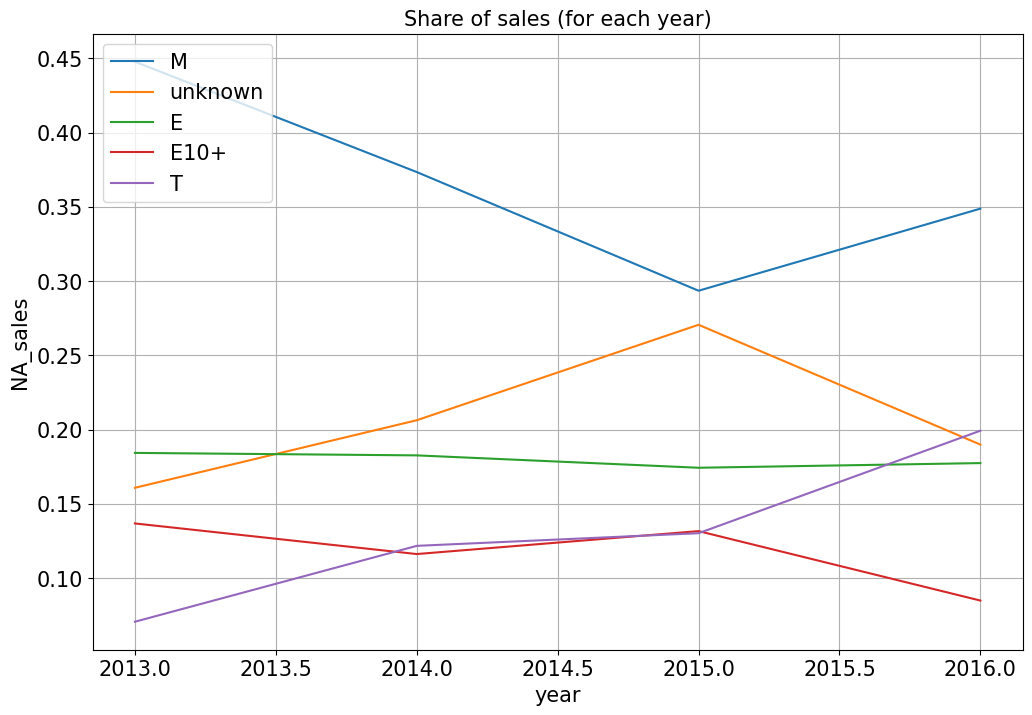

In [82]:
for rating in (data_new
                 .groupby('rating')['NA_sales']
                 .sum()
                 .sort_values(ascending=False)
                 .index):
    (NA_stat_by_rating
     .loc[rating]['part']
     .plot(kind='line', 
           figsize=(12, 8), 
           fontsize=15, 
           rot=0, 
           grid=True, 
           label=rating))
plt.title('Share of sales (for each year)', fontsize=15)
plt.xlabel('year', fontsize=15)
plt.ylabel('NA_sales', fontsize=15)
plt.legend(loc='upper left', fontsize=15)
plt.show()

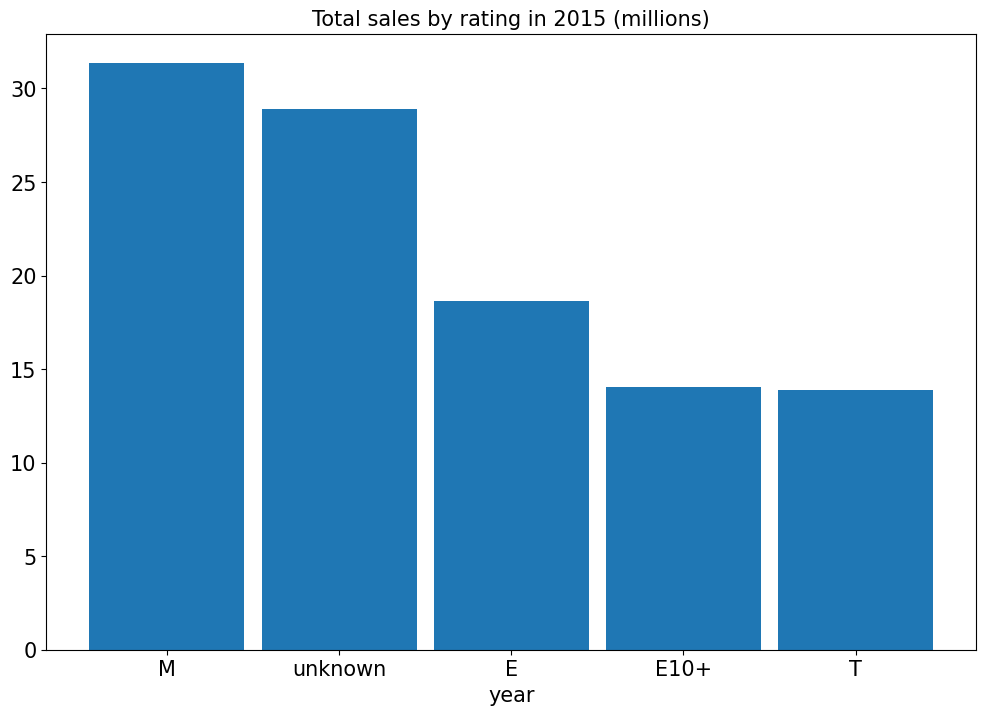

In [83]:
fig = (NA_stat_by_rating
       .loc[pd.IndexSlice[:, 2015], :]
       .sort_values(by='NA_sales', ascending=False)
       ['NA_sales']
       .droplevel(1, axis=0)
       .plot(kind='bar', figsize=(12, 8), width=0.9, fontsize=15, rot=0))
plt.title('Total sales by rating in 2015 (millions)', fontsize=15)
plt.xlabel('year', fontsize=15)
plt.show()

Significant, but 80 million hasn't been collected yet.

If we only consider games with known ratings:

In [84]:
NA_stat_by_known_rating = (data_new
                           .query('rating != "unknown"')
                           .groupby(['rating', 'year'])
                           .agg({'name': 'count', 'NA_sales': 'sum'}))
for index, row in NA_stat_by_known_rating.iterrows():
    NA_stat_by_known_rating.loc[index, 'part'] = (row['NA_sales'] / 
    sum(NA_stat_by_known_rating.loc[pd.IndexSlice[:, index[1]], :]['NA_sales']))

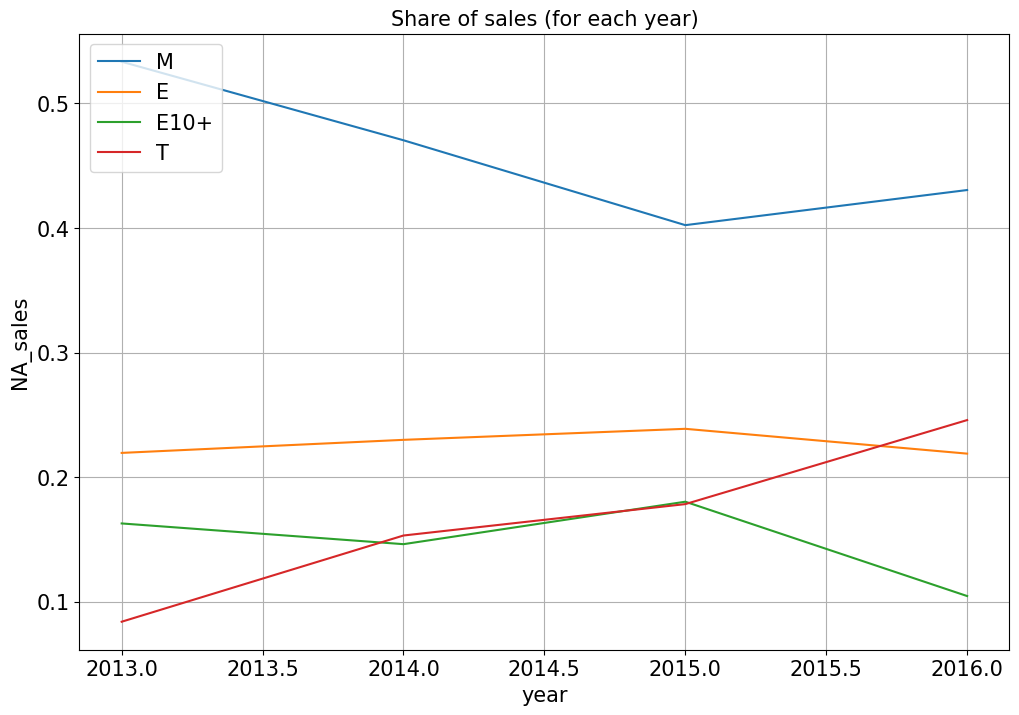

In [85]:
for rating in (data_new
               .query('rating != "unknown"')
               .groupby('rating')['NA_sales']
               .sum()
               .sort_values(ascending=False)
               .index):
    (NA_stat_by_known_rating
     .loc[rating]['part']
     .plot(kind='line', 
           figsize=(12, 8), 
           fontsize=15, 
           rot=0, 
           grid=True, 
           label=rating))
plt.title('Share of sales (for each year)', fontsize=15)
plt.xlabel('year', fontsize=15)
plt.ylabel('NA_sales', fontsize=15)
plt.legend(loc='upper left', fontsize=15)
plt.show()

Let's look at average sales

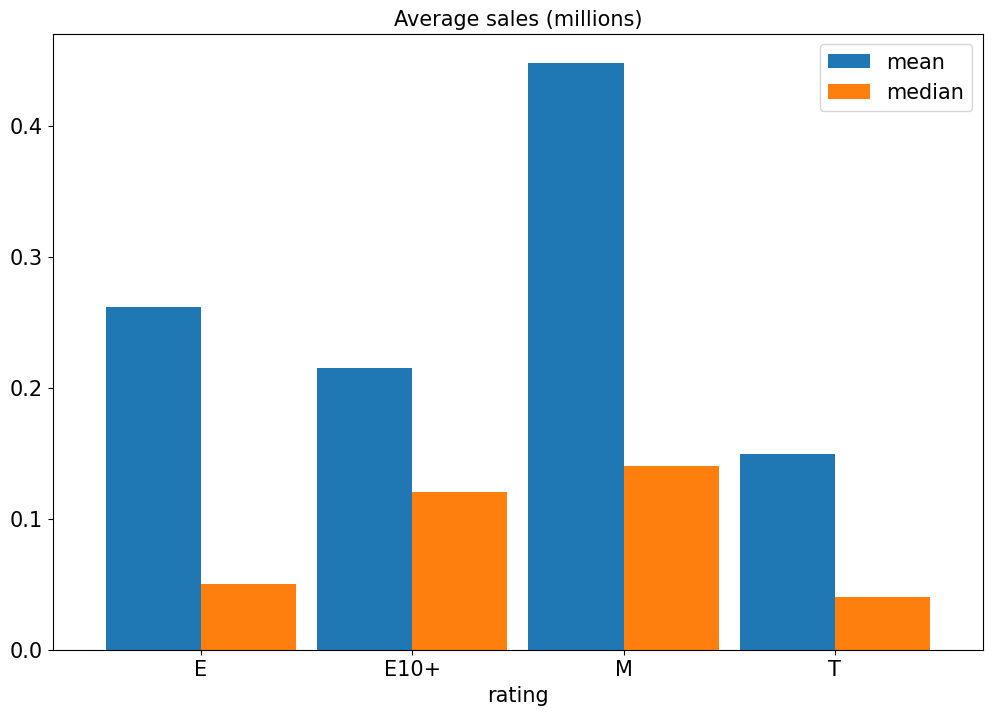

In [86]:
fig = (data_new
       .query('rating != "unknown"')
       .groupby('rating')['NA_sales']
       .agg(['mean', 'median'])
       .sort_index()
       .plot(kind='bar', figsize=(12, 8), width=0.9, fontsize=15, rot=0))
plt.title('Average sales (millions)', fontsize=15)
plt.show()

Let's compare medians instead of fractions of the sum:

In [87]:
NA_stat_by_median_rating = (data_new
                           .query('rating != "unknown"')
                           .groupby(['rating', 'year'])
                           .agg({'name': 'count', 'NA_sales': 'median'}))

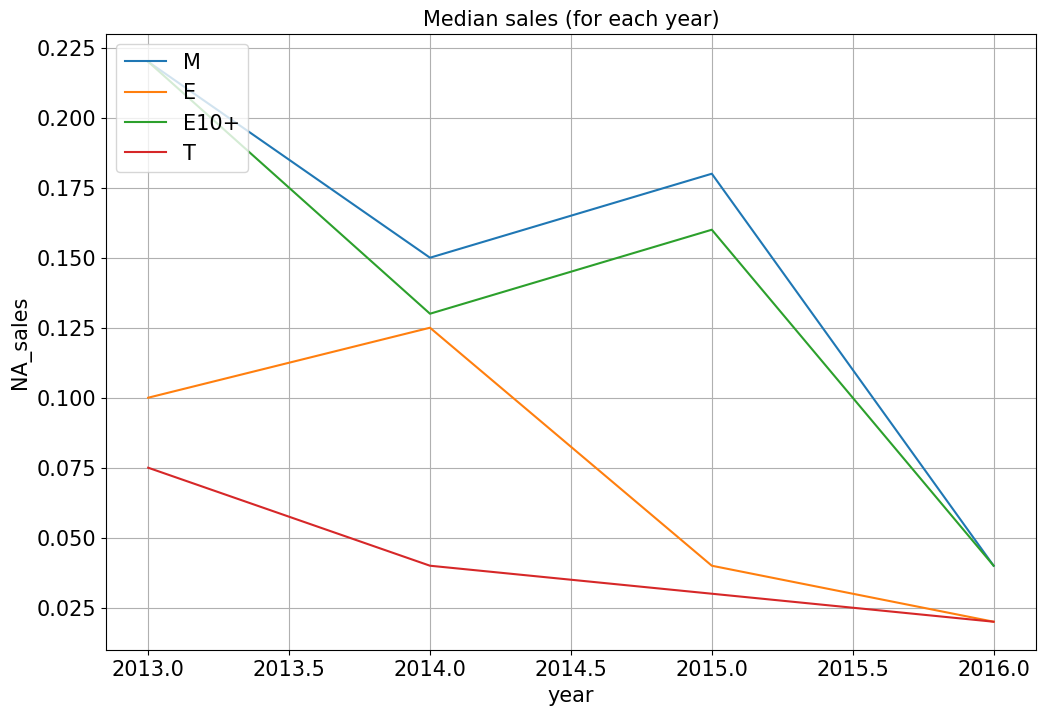

In [88]:
for rating in (data_new
               .query('rating != "unknown"')
               .groupby('rating')['NA_sales']
               .sum()
               .sort_values(ascending=False)
               .index):
    (NA_stat_by_median_rating
     .loc[rating]['NA_sales']
     .plot(kind='line', 
           figsize=(12, 8), 
           fontsize=15, 
           rot=0, 
           grid=True, 
           label=rating))
plt.title('Median sales (for each year)', fontsize=15)
plt.xlabel('year', fontsize=15)
plt.ylabel('NA_sales', fontsize=15)
plt.legend(loc='upper left', fontsize=15)
plt.show()

Median sales are decreasing, probably because games from previous years continue to be bought while the quantity remains a constant. Not the most illustrative graph.

Nevertheless, the E10+ and M ratings remain the top sellers.


In [89]:
data_new

name platform  year         genre  NA_sales  \
16                Grand Theft Auto V      PS3  2013        Action      7.02   
23                Grand Theft Auto V     X360  2013        Action      9.66   
31         Call of Duty: Black Ops 3      PS4  2015       Shooter      6.03   
33               Pokemon X/Pokemon Y      3DS  2013  Role-Playing      5.28   
42                Grand Theft Auto V      PS4  2014        Action      3.96   
...                              ...      ...   ...           ...       ...   
16432               Strawberry Nauts      PSV  2016     Adventure      0.00   
16436               Aiyoku no Eustia      PSV  2014          Misc      0.00   
16439  Samurai Warriors: Sanada Maru      PS3  2016        Action      0.00   
16441        Haitaka no Psychedelica      PSV  2016     Adventure      0.00   
16443            Winning Post 8 2016      PSV  2016    Simulation      0.00   

       EU_sales  JP_sales  other_sales  critic_score  user_score   rating  \
16         9.09      0.98         3.96          97.0         8.2        M   
23         5.14      0.06         1.41          97.0         8.1        M   
31         5.86      0.36         2.38           NaN         NaN  unknown   
33         4.19      4.35         0.78           NaN         NaN  unknown   
42         6.31      0.38         1.97          97.0         8.3        M   
...         ...       ...          ...           ...         ...      ...   
16432      0.00      0.01         0.00           NaN         NaN  unknown   
16436      0.00      0.01         0.00           NaN         NaN  unknown   
16439      0.00      0.01         0.00           NaN         NaN  unknown   
16441      0.00      0.01         0.00           NaN         NaN  unknown   
16443      0.00      0.01         0.00           NaN         NaN  unknown   

       sales  
16     21.05  
23     16.27  
31     14.63  
33     14.60  
42     12.62  
...      ...  
16432   0.01  
16436   0.01  
16439   0.01  
16441   0.01  
16443   0.01  

[2233 rows x 12 columns]

In [90]:
data_new_plat = (data_new
                 .pivot_table(index='platform', 
                              values=['NA_sales', 'EU_sales', 'JP_sales'], 
                              aggfunc=['count', 'mean', 'median', 'sum']))
data_new_plat

count                        mean                       median  \
         EU_sales JP_sales NA_sales  EU_sales  JP_sales  NA_sales EU_sales   
platform                                                                     
3DS           303      303      303  0.102178  0.223795  0.126073    0.000   
DS              8        8        8  0.106250  0.000000  0.071250    0.095   
PC            189      189      189  0.134180  0.000000  0.058783    0.060   
PS3           345      345      345  0.196551  0.067681  0.184058    0.020   
PS4           392      392      392  0.359923  0.040714  0.277398    0.080   
PSP            67       67       67  0.002537  0.049104  0.000000    0.000   
PSV           358      358      358  0.017039  0.051927  0.014078    0.000   
Wii            23       23       23  0.257826  0.002174  0.285217    0.100   
WiiU          115      115      115  0.172609  0.094609  0.254000    0.070   
X360          186      186      186  0.228602  0.002742  0.439032    0.080   
XOne          247      247      247  0.208866  0.001377  0.377004    0.070   

                                sum                    
         JP_sales NA_sales EU_sales JP_sales NA_sales  
platform                                               
3DS          0.06    0.000    30.96    67.81    38.20  
DS           0.00    0.015     0.85     0.00     0.57  
PC           0.00    0.000    25.36     0.00    11.11  
PS3          0.03    0.030    67.81    23.35    63.50  
PS4          0.01    0.060   141.09    15.96   108.74  
PSP          0.02    0.000     0.17     3.29     0.00  
PSV          0.03    0.000     6.10    18.59     5.04  
Wii          0.00    0.040     5.93     0.05     6.56  
WiiU         0.00    0.090    19.85    10.88    29.21  
X360         0.00    0.150    42.52     0.51    81.66  
XOne         0.00    0.120    51.59     0.34    93.12

In [91]:
data_new_genre = (data_new
                 .pivot_table(index='genre', 
                              values=['NA_sales', 'EU_sales', 'JP_sales'], 
                              aggfunc=['count', 'mean', 'median', 'sum']))
data_new_genre

count                        mean                      \
             EU_sales JP_sales NA_sales  EU_sales  JP_sales  NA_sales   
genre                                                                   
Action            766      766      766  0.154217  0.052859  0.164556   
Adventure         245      245      245  0.033673  0.023755  0.029143   
Fighting           80       80       80  0.106875  0.095625  0.194375   
Misc              155      155      155  0.129290  0.059355  0.177355   
Platform           74       74       74  0.210541  0.064730  0.245135   
Puzzle             17       17       17  0.058824  0.069412  0.048824   
Racing             85       85       85  0.237529  0.027059  0.152471   
Role-Playing      292      292      292  0.126610  0.174795  0.158904   
Shooter           187      187      187  0.469840  0.035348  0.586845   
Simulation         62       62       62  0.176129  0.072903  0.078387   
Sports            214      214      214  0.282804  0.025280  0.305000   
Strategy           56       56       56  0.075357  0.031607  0.058571   

               median                        sum                    
             EU_sales JP_sales NA_sales EU_sales JP_sales NA_sales  
genre                                                               
Action          0.020     0.01    0.020   118.13    40.49   126.05  
Adventure       0.000     0.01    0.000     8.25     5.82     7.14  
Fighting        0.020     0.03    0.045     8.55     7.65    15.55  
Misc            0.010     0.02    0.010    20.04     9.20    27.49  
Platform        0.080     0.00    0.090    15.58     4.79    18.14  
Puzzle          0.000     0.02    0.000     1.00     1.18     0.83  
Racing          0.060     0.00    0.030    20.19     2.30    12.96  
Role-Playing    0.010     0.05    0.020    36.97    51.04    46.40  
Shooter         0.190     0.00    0.200    87.86     6.61   109.74  
Simulation      0.035     0.00    0.000    10.92     4.52     4.86  
Sports          0.050     0.00    0.080    60.52     5.41    65.27  
Strategy        0.025     0.00    0.000     4.22     1.77     3.28

In [92]:
data_new_rating = (data_new
                 .pivot_table(index='rating', 
                              values=['NA_sales', 'EU_sales', 'JP_sales'], 
                              aggfunc=['count', 'mean', 'median', 'sum']))
data_new_rating

count                        mean                       median  \
        EU_sales JP_sales NA_sales  EU_sales  JP_sales  NA_sales EU_sales   
rating                                                                      
E            302      302      302  0.276026  0.050132  0.261755    0.055   
E10+         252      252      252  0.169405  0.023373  0.215238    0.100   
M            369      369      369  0.393821  0.038238  0.447724    0.130   
T            333      333      333  0.125976  0.061832  0.149520    0.040   
unknown      977      977      977  0.080768  0.087052  0.091525    0.000   

                               sum                    
        JP_sales NA_sales EU_sales JP_sales NA_sales  
rating                                                
E           0.00     0.05    83.36    15.14    79.05  
E10+        0.00     0.12    42.69     5.89    54.24  
M           0.00     0.14   145.32    14.11   165.21  
T           0.01     0.04    41.95    20.59    49.79  
unknown     0.02     0.00    78.91    85.05    89.42

### Europe

This time we're grouping with pivot tables:

In [93]:
eu_stat = (data_new.pivot_table(index=['platform', 'genre', 'year'], 
                                values='EU_sales',
                                aggfunc=['count', 'mean', 'median', 'sum']))
eu_stat = eu_stat.droplevel(1, axis=1)
eu_stat

count      mean  median   sum
platform genre     year                               
3DS      Action    2013     29  0.111724    0.00  3.24
                   2014     26  0.046538    0.01  1.21
                   2015     39  0.046667    0.00  1.82
                   2016     22  0.031818    0.00  0.70
         Adventure 2013      6  0.053333    0.01  0.32
...                        ...       ...     ...   ...
XOne     Sports    2015     13  0.217692    0.05  2.83
                   2016     11  0.237273    0.03  2.61
         Strategy  2013      1  0.040000    0.04  0.04
                   2015      1  0.050000    0.05  0.05
                   2016      1  0.020000    0.02  0.02

[335 rows x 4 columns]

In [94]:
eu_stat.loc[pd.IndexSlice[:, 'Sports', :], :].head(10)

count      mean  median   sum
platform genre  year                               
3DS      Sports 2013      3  0.076667   0.010  0.23
                2014      4  0.117500   0.065  0.47
                2015      1  0.000000   0.000  0.00
DS       Sports 2013      1  0.030000   0.030  0.03
PC       Sports 2013      2  0.480000   0.480  0.96
                2014      2  0.165000   0.165  0.33
                2015      4  0.060000   0.050  0.24
                2016      5  0.042000   0.030  0.21
PS3      Sports 2013     14  0.382857   0.005  5.36
                2014     13  0.330769   0.090  4.30

In [95]:
eu_stat.groupby(level=[0, 2]).sum().tail(10)

count      mean  median    sum
platform year                                
WiiU     2015     28  2.036786   1.750   5.01
         2016     14  0.778333   0.755   1.48
X360     2013     75  2.930619   1.520  27.03
         2014     63  1.255408   0.760  11.28
         2015     35  0.734573   0.420   3.50
         2016     13  0.243333   0.190   0.71
XOne     2013     19  2.165000   2.005   5.34
         2014     61  2.143619   1.650  18.15
         2015     80  2.042618   0.940  18.47
         2016     87  0.887591   0.440   9.63

Let's count all sales for each platform for the period of 2012-2016.

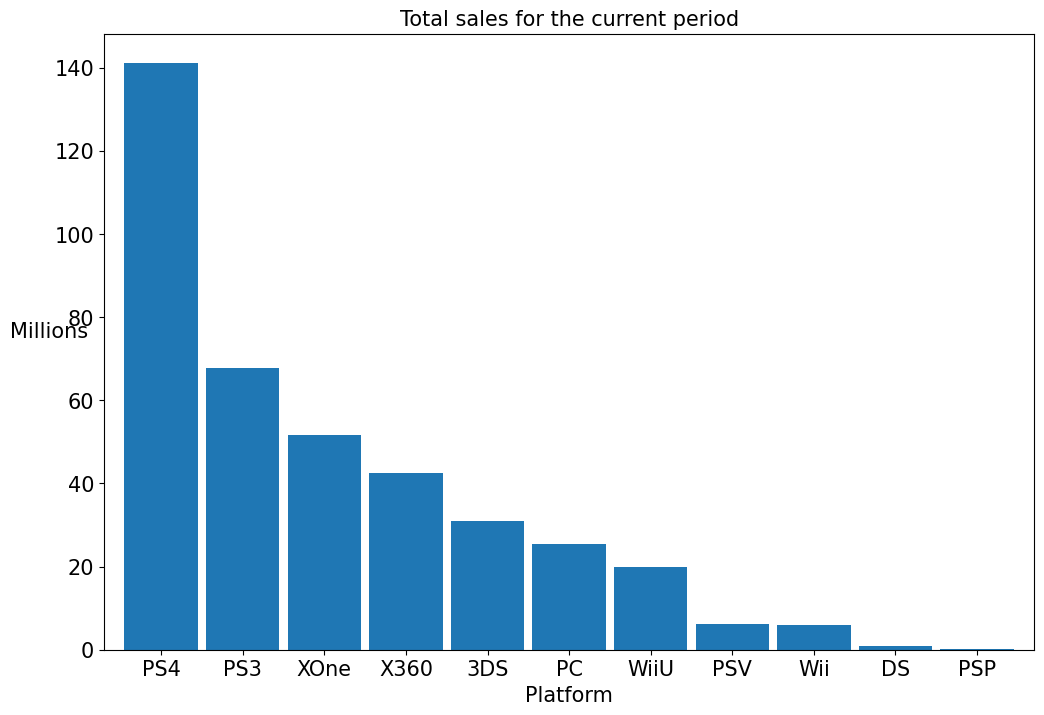

In [96]:
fig = (eu_stat
       .groupby(level=[0]).sum()
       ['sum']
       .sort_values(ascending=False)
       .plot(kind='bar', figsize=(12, 8), width=0.9, fontsize=15, rot=0))
plt.title('Total sales for the current period', fontsize=15)
plt.ylabel('Millions', fontsize=15, rotation=0)
plt.xlabel('Platform', fontsize=15)
plt.show()

The leaders are the same. Let's see how their popularity changed over time. <a id='EU_platforms'></a>

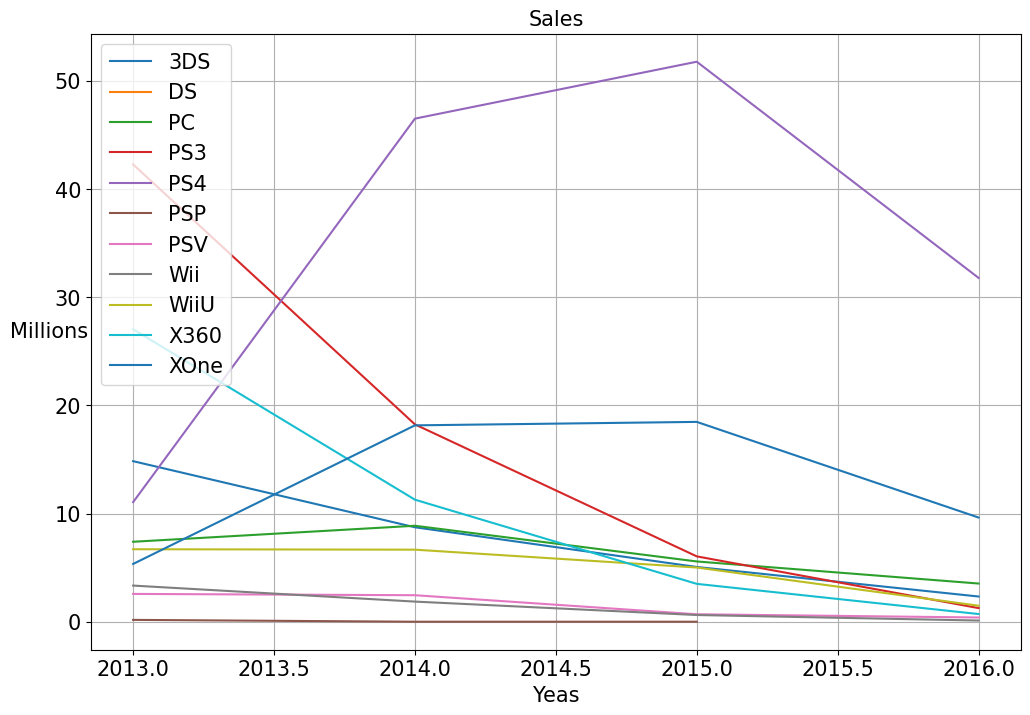

In [97]:
for platform in eu_stat.index.levels[0]:
    (eu_stat
     .loc[pd.IndexSlice[platform, :, :], :]
     .groupby('year').sum()
     ['sum']
     .plot(kind='line', 
           figsize=(12, 8), 
           fontsize=15, 
           rot=0, 
           grid=True, 
           label=platform))
plt.title('Sales', fontsize=15)
plt.xlabel('Yeas', fontsize=15)
plt.ylabel('Millions', fontsize=15, rotation=0)
plt.legend(loc='upper left', fontsize=15)
plt.show()

Apparently, the PS4 is popular in Europe. The XOne is a weak competitor, which distinguishes this market from North America.

Let's now examine the breakdown by genre.

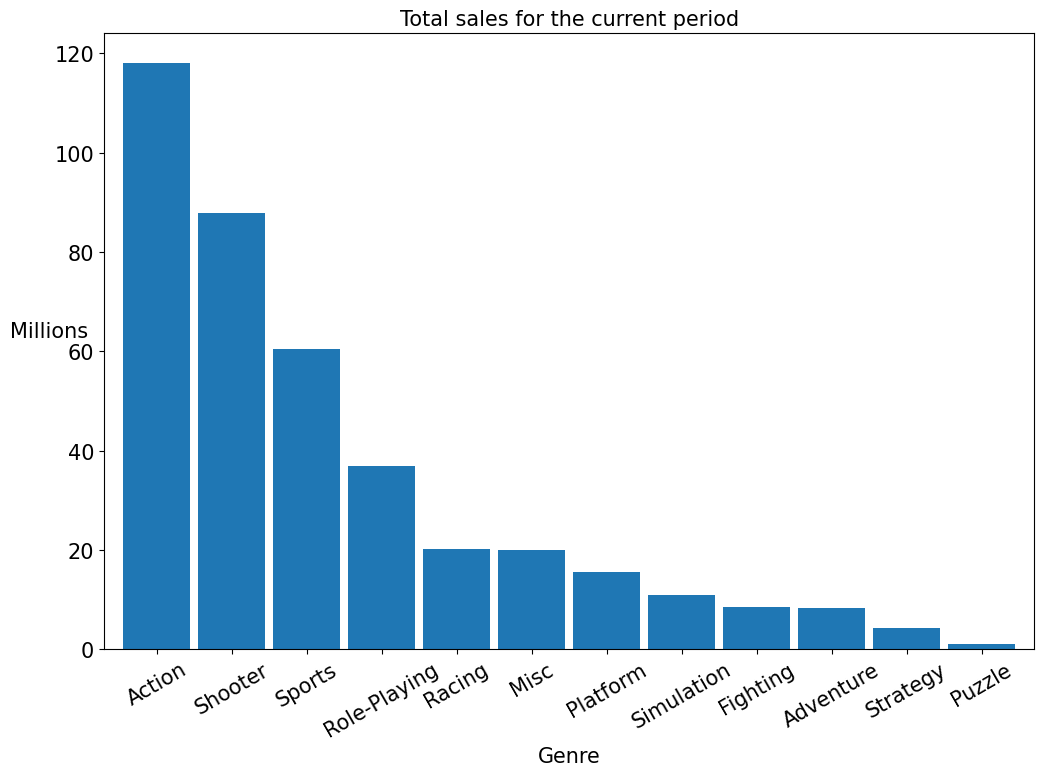

In [98]:
fig = (eu_stat
       .groupby(level=[1]).sum()
       ['sum']
       .sort_values(ascending=False)
       .plot(kind='bar', figsize=(12, 8), width=0.9, fontsize=15, rot=30))
plt.title('Total sales for the current period', fontsize=15)
plt.ylabel('Millions', fontsize=15, rotation=0)
plt.xlabel('Genre', fontsize=15)
plt.show()

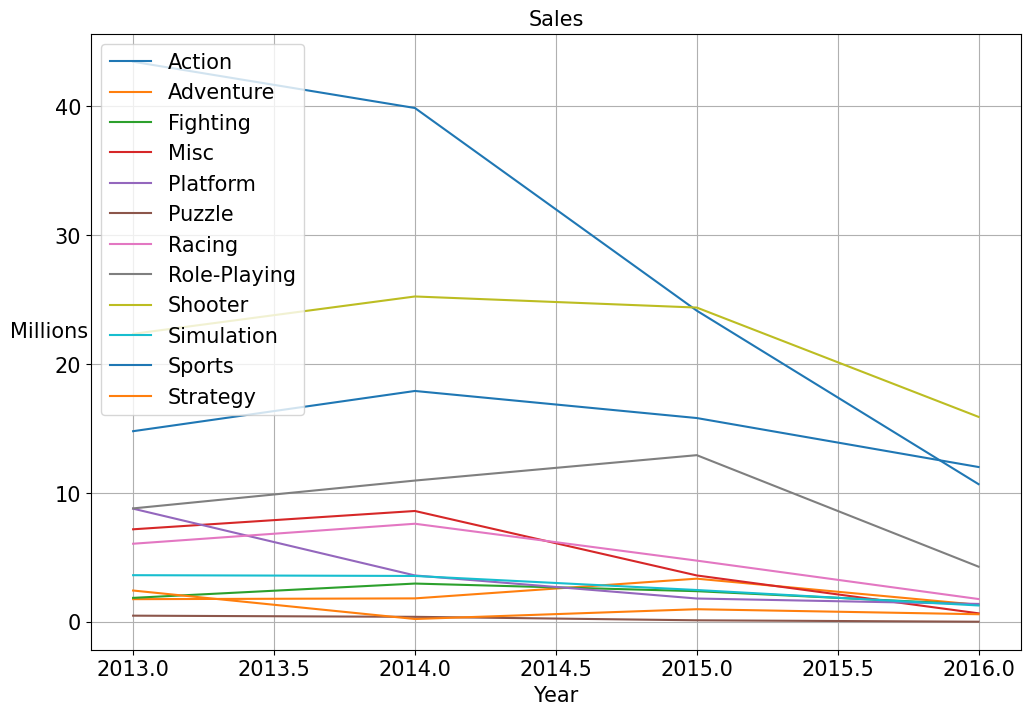

In [99]:
for genre in eu_stat.index.levels[1]:
    (eu_stat
     .loc[pd.IndexSlice[:, genre, :], :]
     .groupby('year').sum()
     ['sum']
     .plot(kind='line', 
           figsize=(12, 8), 
           fontsize=15, 
           rot=0, 
           grid=True, 
           label=genre))
plt.title('Sales', fontsize=15)
plt.xlabel('Year', fontsize=15)
plt.ylabel('Millions', fontsize=15, rotation=0)
plt.legend(loc='upper left', fontsize=15)
plt.show()

Instead of total sales, let's try looking at the shares of genres in each year.

In [100]:
for index, row in eu_stat.iterrows():
    eu_stat.loc[index, 'part'] = (row['sum'] / eu_stat['sum'].groupby('year').sum()[index[2]])

In [101]:
eu_stat['part'].sum()

4.0

<a id='EU_genres'></a>

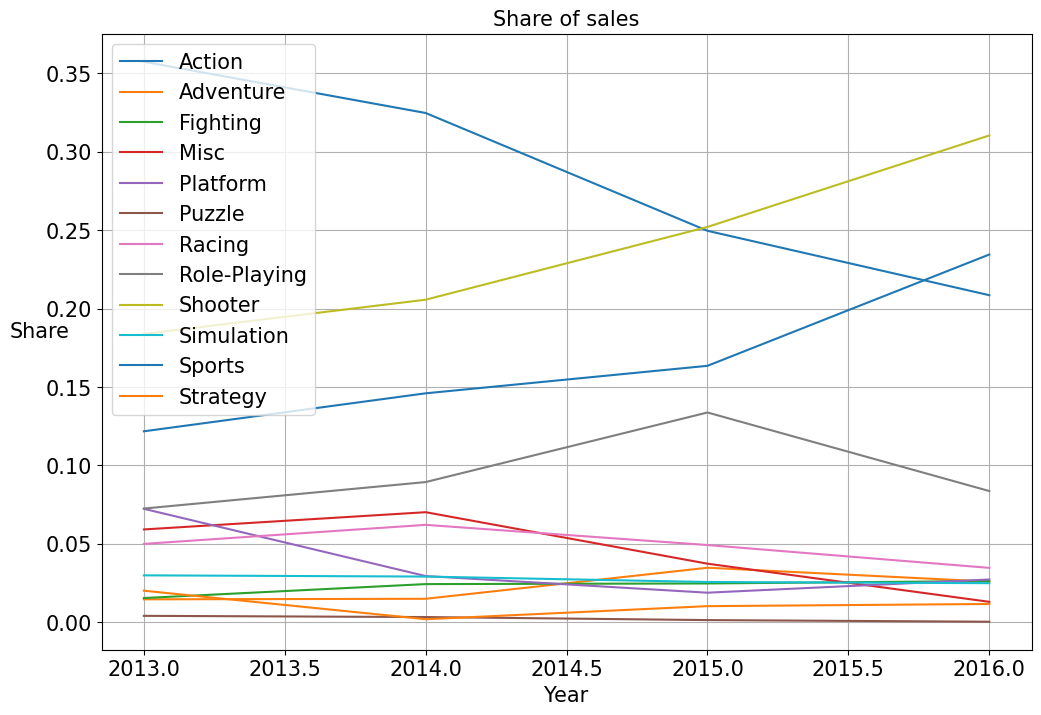

In [102]:
for genre in eu_stat.index.levels[1]:
    (eu_stat
     .loc[pd.IndexSlice[:, genre, :], :]
     .groupby('year').sum()
     ['part']
     .plot(kind='line', 
           figsize=(12, 8), 
           fontsize=15, 
           rot=0, 
           grid=True, 
           label=genre))
plt.title('Share of sales', fontsize=15)
plt.xlabel('Year', fontsize=15)
plt.ylabel('Share', fontsize=15, rotation=0)
plt.legend(loc='upper left', fontsize=15)
plt.show()

Taking into account that the data for 2016 is incomplete, the most popular genres are Action, Shooter, Sports and Role-Playing, with shooters and RPGs rising and action games falling.

Now for the age ranking stats.

In [103]:
eu_rating = (data_new
             .pivot_table(index=['rating', 'year'], 
                          values='EU_sales',
                          aggfunc=['count', 'mean', 'median', 'sum'])
             .droplevel(1, axis=1))
for index, row in eu_rating.iterrows():
    eu_rating.loc[index, 'part'] = (row['sum'] / 
                                    eu_rating['sum'].groupby('year').sum()[index[1]])
eu_rating.tail(10)             

count      mean  median    sum      part
rating  year                                          
M       2015     71  0.408451   0.130  29.00  0.299835
        2016     78  0.212051   0.050  16.54  0.322921
T       2013     62  0.127097   0.045   7.88  0.064829
        2014     79  0.174051   0.040  13.75  0.112025
        2015    106  0.099340   0.035  10.53  0.108871
        2016     86  0.113837   0.035   9.79  0.191136
unknown 2013    228  0.087544   0.000  19.96  0.164212
        2014    236  0.098475   0.000  23.24  0.189343
        2015    291  0.097045   0.000  28.24  0.291977
        2016    222  0.033649   0.000   7.47  0.145841

In [104]:
eu_known_rating = (data_new
                   .query('rating != "unknown"')
                   .pivot_table(index=['rating', 'year'], 
                                values='EU_sales', 
                                aggfunc=['count', 'mean', 'median', 'sum'])
                   .droplevel(1, axis=1))
for index, row in eu_known_rating.iterrows():
    eu_known_rating.loc[index, 'part'] = (row['sum'] / 
                                    eu_known_rating['sum'].groupby('year').sum()[index[1]])
eu_known_rating.tail(10)       

count      mean  median    sum      part
rating year                                          
E10+   2015     51  0.151569   0.060   7.73  0.112880
       2016     50  0.076200   0.060   3.81  0.087086
M      2013    104  0.498846   0.140  51.88  0.510680
       2014    116  0.412931   0.160  47.90  0.481407
       2015     71  0.408451   0.130  29.00  0.423481
       2016     78  0.212051   0.050  16.54  0.378057
T      2013     62  0.127097   0.045   7.88  0.077567
       2014     79  0.174051   0.040  13.75  0.138191
       2015    106  0.099340   0.035  10.53  0.153768
       2016     86  0.113837   0.035   9.79  0.223771

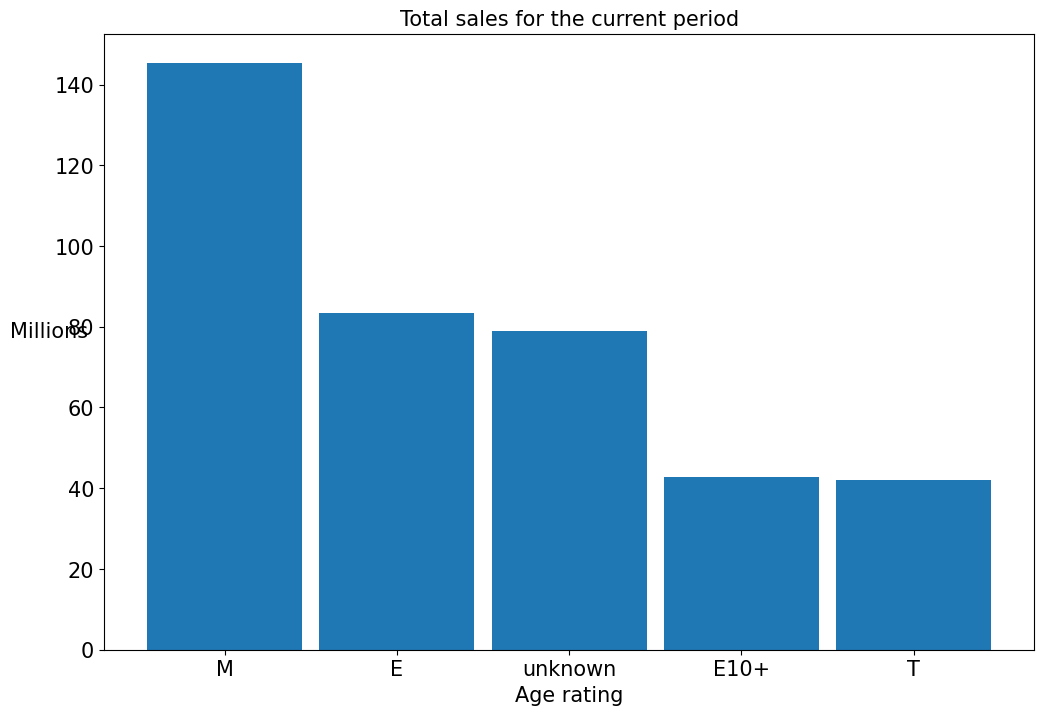

In [105]:
(eu_rating['sum']
 .groupby('rating').sum()
 .sort_values(ascending=False)
 .plot(kind='bar', figsize=(12, 8), width=0.9, fontsize=15, rot=0))
plt.title('Total sales for the current period', fontsize=15)
plt.ylabel('Millions', fontsize=15, rotation=0)
plt.xlabel('Age rating', fontsize=15)
plt.show()

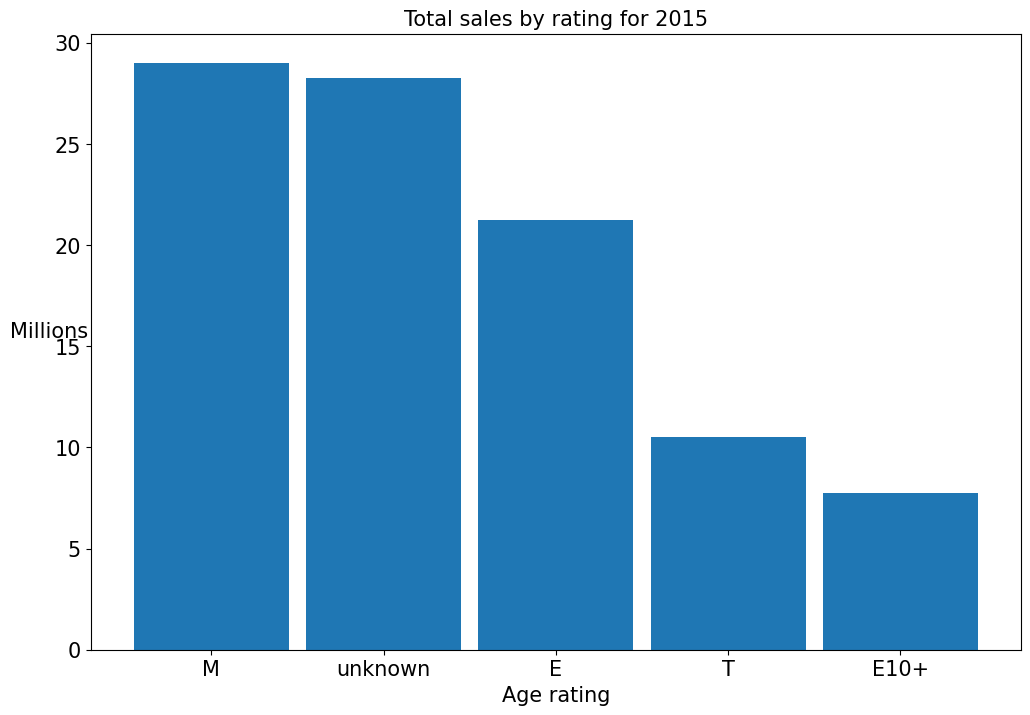

In [106]:
(eu_rating
 .loc[pd.IndexSlice[:, 2015], :]
 .groupby('rating').sum()
 ['sum']
 .sort_values(ascending=False)
 .plot(kind='bar', figsize=(12, 8), width=0.9, fontsize=15, rot=0))
plt.title('Total sales by rating for 2015', fontsize=15)
plt.ylabel('Millions', fontsize=15, rotation=0)
plt.xlabel('Age rating', fontsize=15)
plt.show()

Same trend. Apparently, the surge in 2015 is not tied to the region.

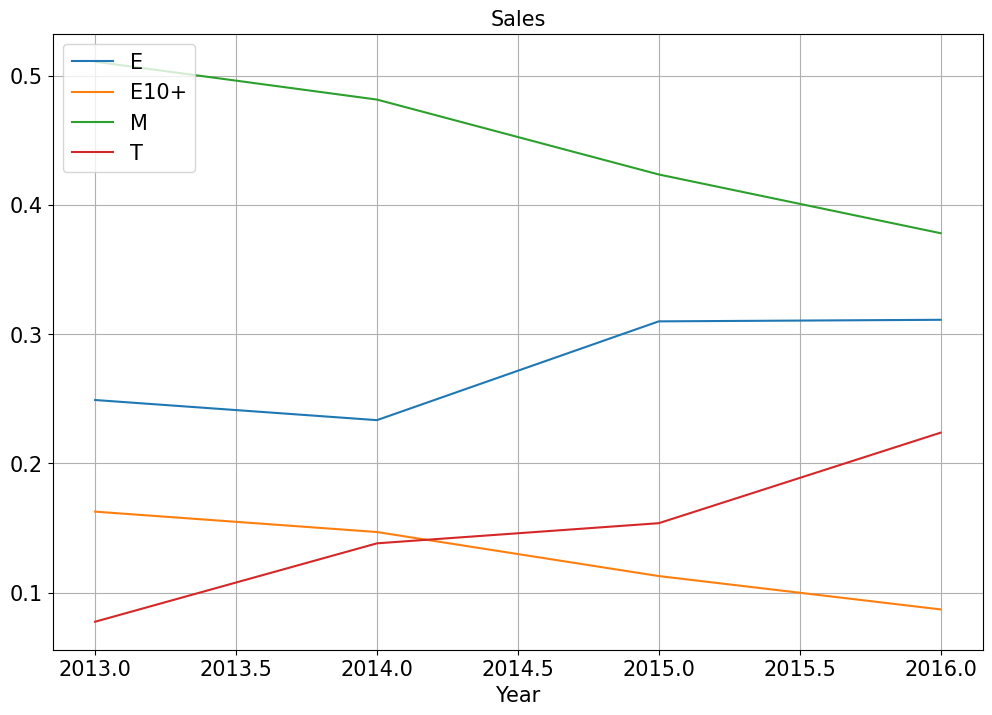

In [107]:
for rating in eu_known_rating.index.levels[0]:
    (eu_known_rating
     .loc[pd.IndexSlice[rating, :]]
     ['part']
     .plot(kind='line', 
           figsize=(12, 8), 
           fontsize=15, 
           rot=0, 
           grid=True, 
           label=rating))
plt.title('Sales', fontsize=15)
plt.xlabel('Year', fontsize=15)
# plt.ylabel('Share', fontsize=15, rotation=0)
plt.legend(loc='upper left', fontsize=15)
plt.show()

Even though the 17+ rating is still the best-selling category, the all-ages rating is catching up to it.

### Japan

Let's apply the same functions.

In [108]:
jp_stat = (data_new.pivot_table(index=['platform', 'genre', 'year'], 
                                values='JP_sales',
                                aggfunc=['count', 'mean', 'median', 'sum']))
jp_stat = jp_stat.droplevel(1, axis=1)
for index, row in jp_stat.iterrows():
    jp_stat.loc[index, 'part'] = (row['sum'] / 
                                  jp_stat['sum'].groupby('year').sum()[index[2]])
jp_stat

count      mean  median   sum      part
platform genre     year                                         
3DS      Action    2013     29  0.132414   0.040  3.84  0.080520
                   2014     26  0.038077   0.005  0.99  0.024943
                   2015     39  0.220256   0.050  8.59  0.251980
                   2016     22  0.166818   0.045  3.67  0.190057
         Adventure 2013      6  0.171667   0.060  1.03  0.021598
...                        ...       ...     ...   ...       ...
XOne     Sports    2015     13  0.000000   0.000  0.00  0.000000
                   2016     11  0.000000   0.000  0.00  0.000000
         Strategy  2013      1  0.000000   0.000  0.00  0.000000
                   2015      1  0.000000   0.000  0.00  0.000000
                   2016      1  0.000000   0.000  0.00  0.000000

[335 rows x 5 columns]

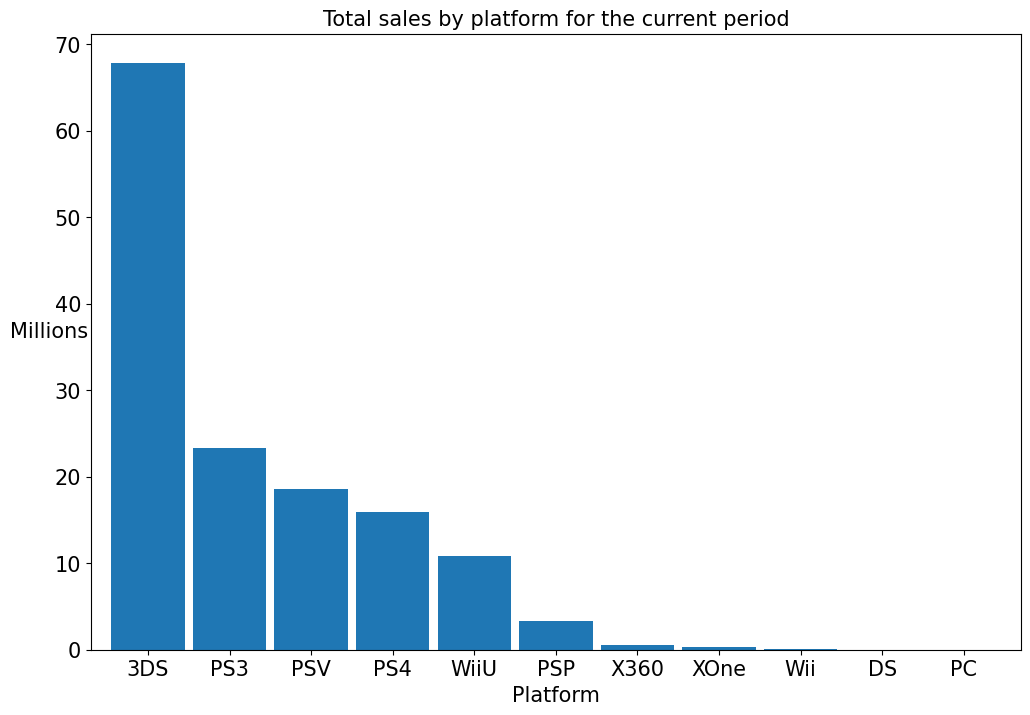

In [109]:
fig = (jp_stat
       .groupby(level=[0]).sum()
       ['sum']
       .sort_values(ascending=False)
       .plot(kind='bar', figsize=(12, 8), width=0.9, fontsize=15, rot=0))
plt.title('Total sales by platform for the current period', fontsize=15)
plt.ylabel('Millions', fontsize=15, rotation=0)
plt.xlabel('Platform', fontsize=15)
plt.show()

In Japan, the Play Station line is already in second place.

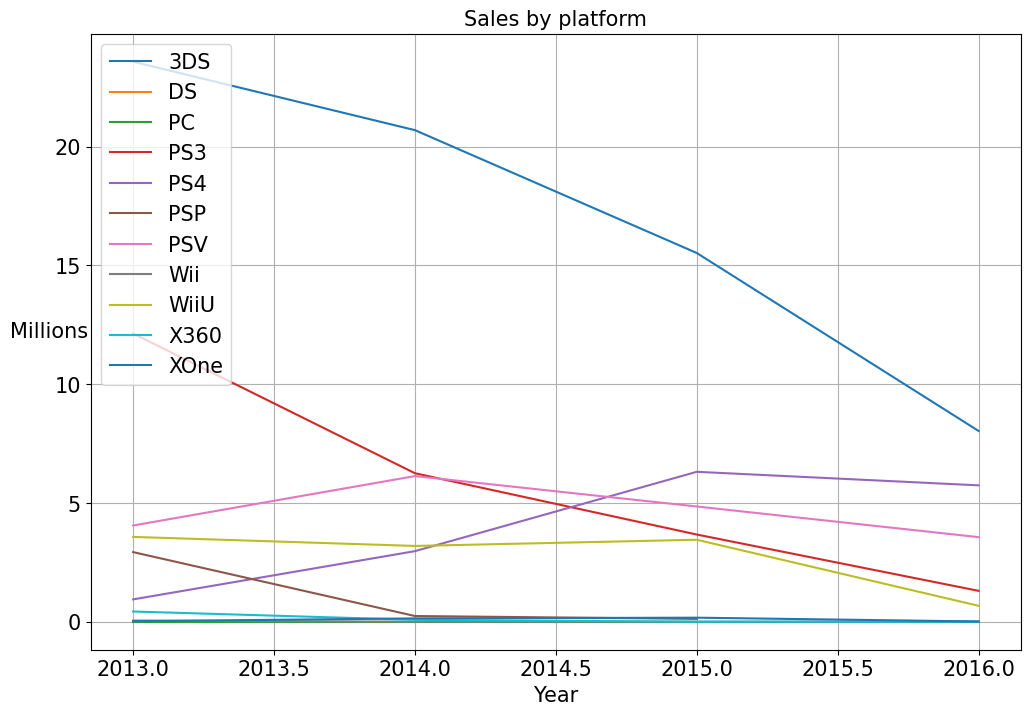

In [110]:
for platform in jp_stat.index.levels[0]:
    (jp_stat
     .loc[pd.IndexSlice[platform, :, :], :]
     .groupby('year').sum()
     ['sum']
     .plot(kind='line', 
           figsize=(12, 8), 
           fontsize=15, 
           rot=0, 
           grid=True, 
           label=platform))
plt.title('Sales by platform', fontsize=15)
plt.xlabel('Year', fontsize=15)
plt.ylabel('Millions', fontsize=15, rotation=0)
plt.legend(loc='upper left', fontsize=15)
plt.show()

<a id='JP_platforms'></a>

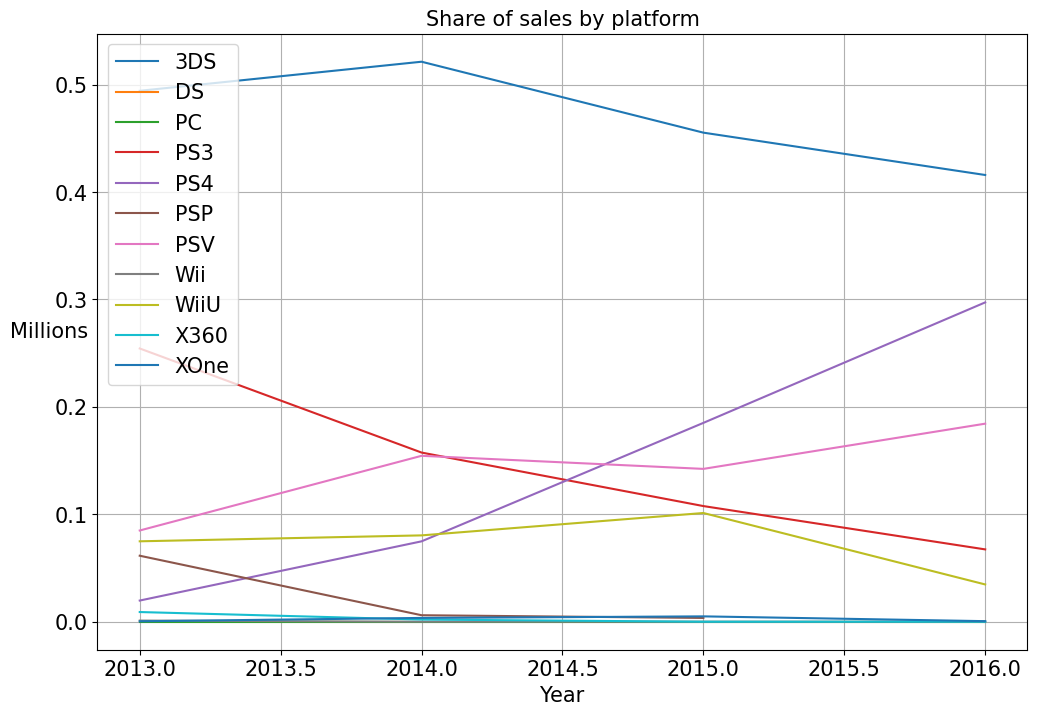

In [111]:
for platform in jp_stat.index.levels[0]:
    (jp_stat
     .loc[pd.IndexSlice[platform, :, :], :]
     .groupby('year').sum()
     ['part']
     .plot(kind='line', 
           figsize=(12, 8), 
           fontsize=15, 
           rot=0, 
           grid=True, 
           label=platform))
plt.title('Share of sales by platform', fontsize=15)
plt.xlabel('Year', fontsize=15)
plt.ylabel('Millions', fontsize=15, rotation=0)
plt.legend(loc='upper left', fontsize=15)
plt.show()

The 3DS is unlikely to sag much, but the PS4 and PSV are pushing out other models.

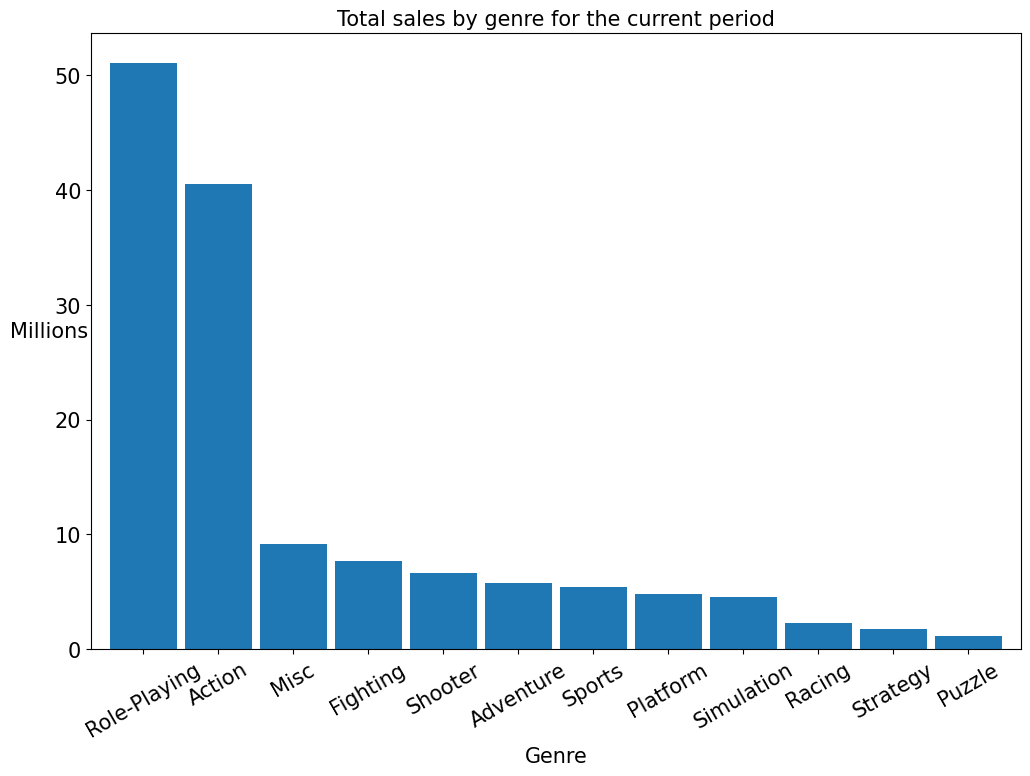

In [112]:
fig = (jp_stat
       .groupby(level=[1]).sum()
       ['sum']
       .sort_values(ascending=False)
       .plot(kind='bar', figsize=(12, 8), width=0.9, fontsize=15, rot=30))
plt.title('Total sales by genre for the current period', fontsize=15)
plt.ylabel('Millions', fontsize=15, rotation=0)
plt.xlabel('Genre', fontsize=15)
plt.show()

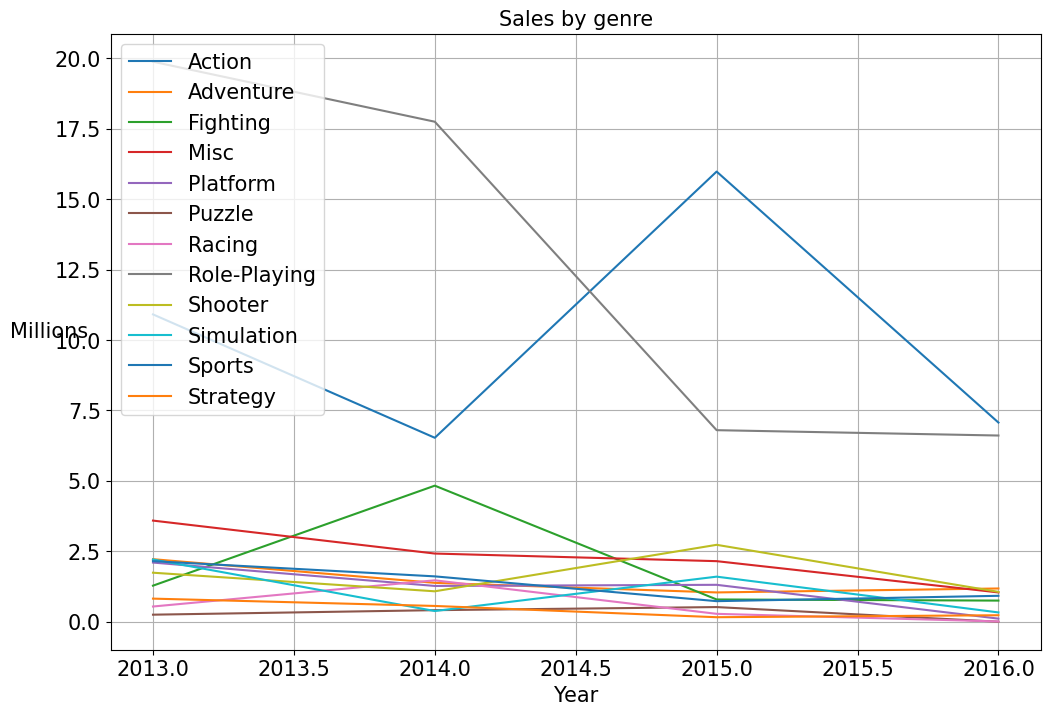

In [113]:
for genre in jp_stat.index.levels[1]:
    (jp_stat
     .loc[pd.IndexSlice[:, genre, :], :]
     .groupby('year').sum()
     ['sum']
     .plot(kind='line', 
           figsize=(12, 8), 
           fontsize=15, 
           rot=0, 
           grid=True, 
           label=genre))
plt.title('Sales by genre', fontsize=15)
plt.xlabel('Year', fontsize=15)
plt.ylabel('Millions', fontsize=15, rotation=0)
plt.legend(loc='upper left', fontsize=15)
plt.show()

<a id='JP_genres'></a>

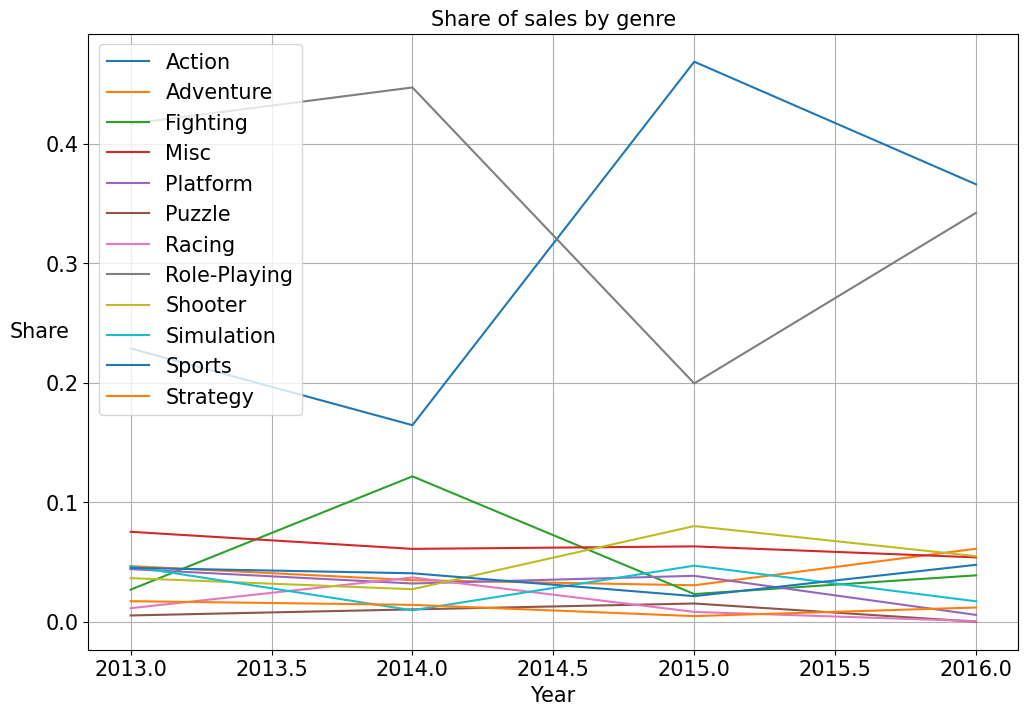

In [114]:
for genre in jp_stat.index.levels[1]:
    (jp_stat
     .loc[pd.IndexSlice[:, genre, :], :]
     .groupby('year').sum()
     ['part']
     .plot(kind='line', 
           figsize=(12, 8), 
           fontsize=15, 
           rot=0, 
           grid=True, 
           label=genre))
plt.title('Share of sales by genre', fontsize=15)
plt.xlabel('Year', fontsize=15)
plt.ylabel('Share', fontsize=15, rotation=0)
plt.legend(loc='upper left', fontsize=15)
plt.show()

Something strange happened in 2015. Maybe some innovative game in the Action genre came out? However, in the future, role-playing games promise to come back to the forefront.

In [115]:
jp_rating = (data_new
             .pivot_table(index=['rating', 'year'], 
                          values='JP_sales',
                          aggfunc=['count', 'mean', 'median', 'sum'])
             .droplevel(1, axis=1))
for index, row in jp_rating.iterrows():
    jp_rating.loc[index, 'part'] = (row['sum'] / 
                                    jp_rating['sum'].groupby('year').sum()[index[1]])
jp_rating.tail(10)   

count      mean  median    sum      part
rating  year                                          
M       2015     71  0.043521    0.00   3.09  0.090642
        2016     78  0.015385    0.00   1.20  0.062144
T       2013     62  0.093710    0.05   5.81  0.121828
        2014     79  0.089620    0.02   7.08  0.178382
        2015    106  0.051226    0.02   5.43  0.159284
        2016     86  0.026395    0.00   2.27  0.117556
unknown 2013    228  0.123465    0.03  28.15  0.590270
        2014    236  0.101737    0.02  24.01  0.604938
        2015    291  0.063814    0.02  18.57  0.544735
        2016    222  0.064505    0.02  14.32  0.741585

In [116]:
jp_known_rating = (data_new
                   .query('rating != "unknown"')
                   .pivot_table(index=['rating', 'year'], 
                                values='JP_sales', 
                                aggfunc=['count', 'mean', 'median', 'sum'])
                   .droplevel(1, axis=1))
for index, row in jp_known_rating.iterrows():
    jp_known_rating.loc[index, 'part'] = (row['sum'] / 
                                    jp_known_rating['sum'].groupby('year').sum()[index[1]])
jp_known_rating.tail(10)   

count      mean  median   sum      part
rating year                                         
E10+   2015     51  0.055294    0.00  2.82  0.181701
       2016     50  0.009000    0.00  0.45  0.090180
M      2013    104  0.058654    0.01  6.10  0.312180
       2014    116  0.032069    0.00  3.72  0.237245
       2015     71  0.043521    0.00  3.09  0.199098
       2016     78  0.015385    0.00  1.20  0.240481
T      2013     62  0.093710    0.05  5.81  0.297339
       2014     79  0.089620    0.02  7.08  0.451531
       2015    106  0.051226    0.02  5.43  0.349871
       2016     86  0.026395    0.00  2.27  0.454910

Let's compare the age ratings.

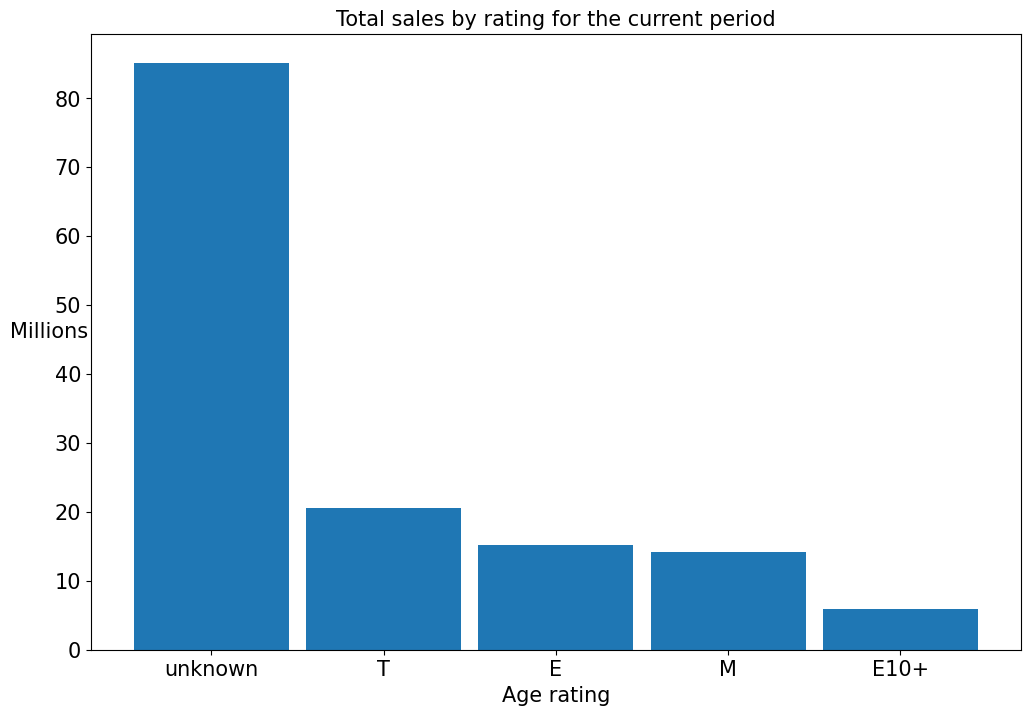

In [117]:
(jp_rating['sum']
 .groupby('rating').sum()
 .sort_values(ascending=False)
 .plot(kind='bar', figsize=(12, 8), width=0.9, fontsize=15, rot=0))
plt.title('Total sales by rating for the current period', fontsize=15)
plt.ylabel('Millions', fontsize=15, rotation=0)
plt.xlabel('Age rating', fontsize=15)
plt.show()

Perhaps it was Japan that was shifting the global share of games with uncertain ratings. I wonder if this has anything to do with the rise of this category in 2015.

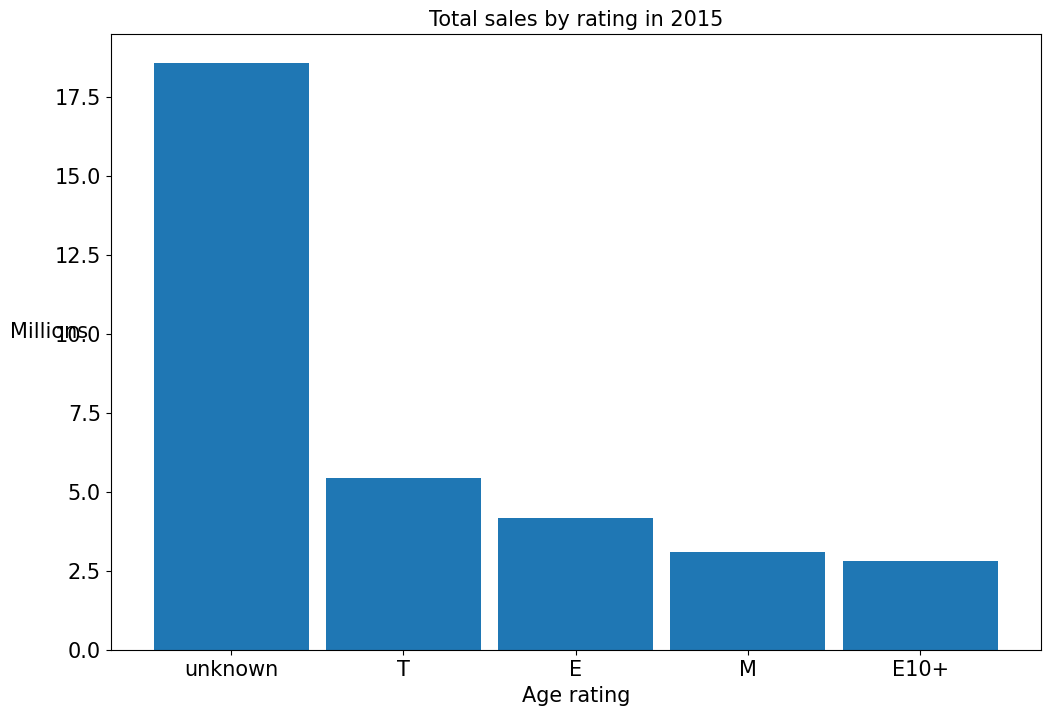

In [118]:
(jp_rating
 .loc[pd.IndexSlice[:, 2015], :]
 .groupby('rating').sum()
 ['sum']
 .sort_values(ascending=False)
 .plot(kind='bar', figsize=(12, 8), width=0.9, fontsize=15, rot=0))
plt.title('Total sales by rating in 2015', fontsize=15)
plt.ylabel('Millions', fontsize=15, rotation=0)
plt.xlabel('Age rating', fontsize=15)
plt.show()

Apparently not. On the contrary, less than 1/5th of the total number of games with undetermined ratings were released in 2015. In total, the numbers add up to 80 million, if we take into account the ones that could be included in other_sales. In other words, the rise of 2015 is diluted across all regions. 

This distribution may be due to the fact that ESRB is a US rating and games released in Japan for the local market do not pass it.

<a id='JP_rating'></a>

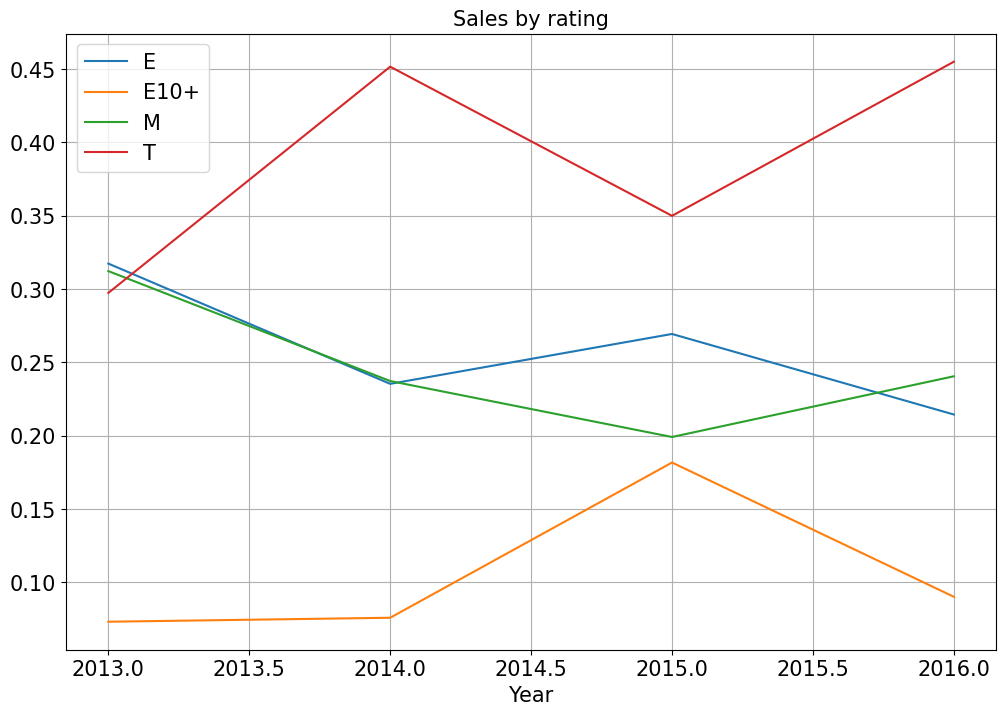

In [119]:
for rating in jp_known_rating.index.levels[0]:
    (jp_known_rating
     .loc[pd.IndexSlice[rating, :]]
     ['part']
     .plot(kind='line', 
           figsize=(12, 8), 
           fontsize=15, 
           rot=0, 
           grid=True, 
           label=rating))
plt.title('Sales by rating', fontsize=15)
plt.xlabel('Year', fontsize=15)
plt.legend(loc='upper left', fontsize=15)
plt.show()

Otherwise, the priorities are different. In addition to the classic E and M, the T rating, i.e. 13+, shows high sales.

## Hypothesis testing

In [120]:
data_new

name platform  year         genre  NA_sales  \
16                Grand Theft Auto V      PS3  2013        Action      7.02   
23                Grand Theft Auto V     X360  2013        Action      9.66   
31         Call of Duty: Black Ops 3      PS4  2015       Shooter      6.03   
33               Pokemon X/Pokemon Y      3DS  2013  Role-Playing      5.28   
42                Grand Theft Auto V      PS4  2014        Action      3.96   
...                              ...      ...   ...           ...       ...   
16432               Strawberry Nauts      PSV  2016     Adventure      0.00   
16436               Aiyoku no Eustia      PSV  2014          Misc      0.00   
16439  Samurai Warriors: Sanada Maru      PS3  2016        Action      0.00   
16441        Haitaka no Psychedelica      PSV  2016     Adventure      0.00   
16443            Winning Post 8 2016      PSV  2016    Simulation      0.00   

       EU_sales  JP_sales  other_sales  critic_score  user_score   rating  \
16         9.09      0.98         3.96          97.0         8.2        M   
23         5.14      0.06         1.41          97.0         8.1        M   
31         5.86      0.36         2.38           NaN         NaN  unknown   
33         4.19      4.35         0.78           NaN         NaN  unknown   
42         6.31      0.38         1.97          97.0         8.3        M   
...         ...       ...          ...           ...         ...      ...   
16432      0.00      0.01         0.00           NaN         NaN  unknown   
16436      0.00      0.01         0.00           NaN         NaN  unknown   
16439      0.00      0.01         0.00           NaN         NaN  unknown   
16441      0.00      0.01         0.00           NaN         NaN  unknown   
16443      0.00      0.01         0.00           NaN         NaN  unknown   

       sales  
16     21.05  
23     16.27  
31     14.63  
33     14.60  
42     12.62  
...      ...  
16432   0.01  
16436   0.01  
16439   0.01  
16441   0.01  
16443   0.01  

[2233 rows x 12 columns]

We test two proposed hypotheses.

### The XOne and PC scores are the same.

The hypothesis that the average user scores of Xbox One and PC platforms are the same is tested.

In [121]:
xone_data_new = data_new.query('platform == "XOne"')
xone_data_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 247 entries, 99 to 16401
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          247 non-null    object 
 1   platform      247 non-null    object 
 2   year          247 non-null    int64  
 3   genre         247 non-null    object 
 4   NA_sales      247 non-null    float64
 5   EU_sales      247 non-null    float64
 6   JP_sales      247 non-null    float64
 7   other_sales   247 non-null    float64
 8   critic_score  169 non-null    float64
 9   user_score    182 non-null    float64
 10  rating        247 non-null    object 
 11  sales         247 non-null    float64
dtypes: float64(7), int64(1), object(4)
memory usage: 25.1+ KB


About 50 gaps.

In [122]:
pc_data_new = data_new.query('platform == "PC"')
pc_data_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 189 entries, 455 to 16421
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          189 non-null    object 
 1   platform      189 non-null    object 
 2   year          189 non-null    int64  
 3   genre         189 non-null    object 
 4   NA_sales      189 non-null    float64
 5   EU_sales      189 non-null    float64
 6   JP_sales      189 non-null    float64
 7   other_sales   189 non-null    float64
 8   critic_score  149 non-null    float64
 9   user_score    155 non-null    float64
 10  rating        189 non-null    object 
 11  sales         189 non-null    float64
dtypes: float64(7), int64(1), object(4)
memory usage: 19.2+ KB


Here's about 40.

It is logical to assume that the samples are independent. If critics can still play the same games on different platforms, players are unlikely.

${H_0}$ – there is no difference between the averages of statistical populations from which these samples have been taken

${H_1}$ – there's a difference between the averages

In [123]:
test_result = (st.ttest_ind(xone_data_new['user_score'], 
                            pc_data_new['user_score'], 
                            equal_var=False, 
                            nan_policy='omit'))
alpha = 0.05
print('p-value: ', test_result.pvalue)

if test_result.pvalue < alpha:
    print('Rejecting the null hypothesis')
else:
    print('Failed to reject the null hypothesis') 

p-value:  0.1475959401343032
Failed to reject the null hypothesis


Well, no means no. I didn't really feel like it.

Let's check the distributions just in case.

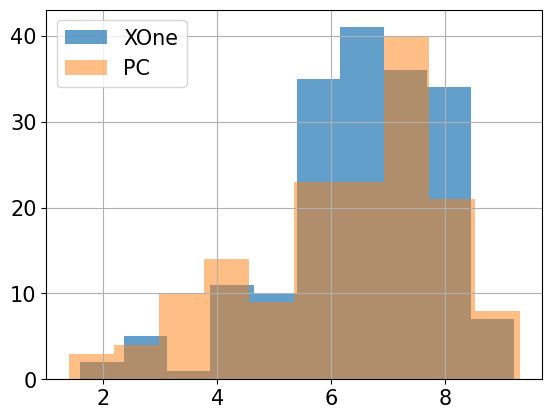

In [124]:
xone_data_new['user_score'].hist(alpha=0.7, label='XOne')
pc_data_new['user_score'].hist(alpha=0.5, label='PC')
plt.legend()
plt.show()

Really similar ratings.

It turns out there's no difference.

### Action and Sports scores are different.

The hypothesis that the user scores of Action and Sports genres are different is tested.

In [125]:
action_data_new = data_new.query('genre == "Action"')
action_data_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 766 entries, 16 to 16439
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          766 non-null    object 
 1   platform      766 non-null    object 
 2   year          766 non-null    int64  
 3   genre         766 non-null    object 
 4   NA_sales      766 non-null    float64
 5   EU_sales      766 non-null    float64
 6   JP_sales      766 non-null    float64
 7   other_sales   766 non-null    float64
 8   critic_score  313 non-null    float64
 9   user_score    389 non-null    float64
 10  rating        766 non-null    object 
 11  sales         766 non-null    float64
dtypes: float64(7), int64(1), object(4)
memory usage: 77.8+ KB


It's not such a rosy picture with skips. Almost half.

In [126]:
sports_data_new = data_new.query('genre == "Sports"')
sports_data_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 214 entries, 77 to 16372
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          214 non-null    object 
 1   platform      214 non-null    object 
 2   year          214 non-null    int64  
 3   genre         214 non-null    object 
 4   NA_sales      214 non-null    float64
 5   EU_sales      214 non-null    float64
 6   JP_sales      214 non-null    float64
 7   other_sales   214 non-null    float64
 8   critic_score  112 non-null    float64
 9   user_score    160 non-null    float64
 10  rating        214 non-null    object 
 11  sales         214 non-null    float64
dtypes: float64(7), int64(1), object(4)
memory usage: 21.7+ KB


Here's about 20%.

The situation is the same. Samples are assumed to be independent, the more so a game can be either of one genre or another.

${H_0}$ – there is no difference between the averages of statistical populations from which these samples have been taken

${H_1}$ – there's a difference between the averages

In [127]:
test_result = (st.ttest_ind(action_data_new['user_score'], 
                            sports_data_new['user_score'], 
                            equal_var=False, 
                            nan_policy='omit'))
alpha = 0.05
print('p-value: ', test_result.pvalue)

if test_result.pvalue < alpha:
    print('Rejecting the null hypothesis')
else:
    print('Failed to reject the null hypothesis') 

p-value:  1.4460039700703482e-20
Rejecting the null hypothesis


Suddenly.

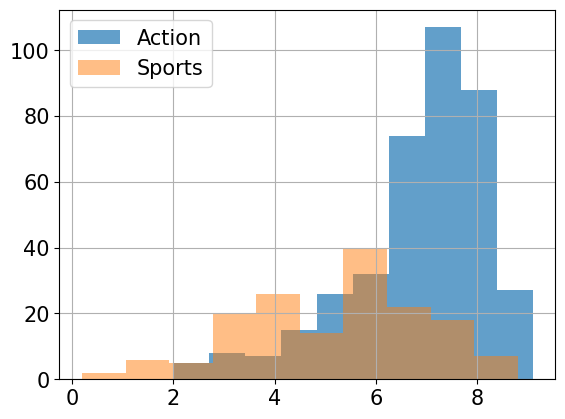

In [128]:
action_data_new['user_score'].hist(alpha=0.7, label='Action')
sports_data_new['user_score'].hist(alpha=0.5, label='Sports')
plt.legend()
plt.show()

The size of the samples shouldn't affect the result, right?

I don't think so.

So there really is a difference in the ratings.

## Conclusions

1. Data features
    - There are missing values in the data among user and critic scores and age rating values. There are about 40% of each type.
    - In addition to the gaps in user scores, there are special "to be determined" rows, which are distributed over time approximately [the same](#tbd) as the whole dataset, namely, they are almost absent before 2002 and after 2011.
    - The period from 2013 to 2016 was taken for analysis, and the data for 2016 is clearly incomplete.
2. Patterns in the data
    - Platforms are safely [changing](#platfroms) across their series. XOne replaces X360, and PS4 replaces PS3, and almost completely.
    - They also promise to maintain leadership in the [future](#future_platfroms).
    - The data is heavily skewed to the right, meaning most games sell [poorly](#new_platforms), but there are a number of best sellers in all [genres](#genres).
    - Well selling games tend to have above average ratings, however many games with high ratings sell [poorly](#success) and there is no direct correlation so a high score (by both players and experts) does not mean the game will sell well.
    - Games with an age rating of M (17+) or E (for all ages) sell the most often. However, it is hard to say what will be more popular in the future, because the data for 2016 is incomplete and the data for 2015 has a lot of undefined [ratings](#unknown_rating).
3. Player profiles
    - In North America, the most [popular](#NA_platforms) promise to be PS4 and Xbox One. The 3DS is in third place, but it doesn't pose much competition. The most stable revenue [show](#NA_genres) genres Shooter, Platform and Sports. Games with an age rating of 17+ sell the best.
    - In Europe, the situation is similar, but XOne is strongly [behind](#EU_platforms) PS4. The most popular genres [are](#EU_genres) Action, Shooter, Sports and Role-Playing, with Action games falling and Shooter and Role-Playing games rising.
    - In Japan, the situation is different. The 3DS is the most popular platform, while there is no XBox series at all. PS4 and PSV are present and even growing, but they are still behind [3DS](#JP_platforms). The most popular genres are [action and role-playing games](#JP_genres). Instead of M and E ages, [13+](#JP_rating) games hold the top spot.
4. Hypothesis testing
    - As an experiment, it was shown that the user scores for PC and XBox are the same.
    - At the same time, the score of action games is significantly higher than the one of sports games.